# Cars 4 You: Expediting Car Evaluations with Machine Learning

## Problem Statement

**Cars 4 You** is an online car resale company that buys vehicles from different brands through its platform.  
Users submit details about their cars, which are then sent for mechanic evaluation before resale.

Due to rapid growth, the company faces **delays in car inspections**, leading to loss of potential customers.  
To solve this, the company wants a **predictive model** capable of estimating the **price of a car based on user-provided inputs**, without needing a physical evaluation.

## Project Objectives

The overall project is structured into three main goals (for the final submission), but the **first deliverable** focuses on the **initial stages** of this workflow.

### 1. Regression Benchmarking
Develop a regression model that predicts car prices (`price`) using the 2020 Cars 4 You dataset.  
Implement a consistent **model assessment strategy** to compare models and select the most generalizable one.

### 2. Model Optimization
Later in the project, explore model optimization through:
- Hyperparameter tuning  
- Feature engineering and preprocessing adjustments  

Compare and discuss the performance improvements.

### 3. Additional Insights
Open-ended exploration for the final project phase (e.g., feature importance, ablation study, specialized models, deep learning).



## Dataset Description

You have access to two datasets:

- **Training Set:** Cars from the 2020 Cars 4 You database, including prices (`price`).
- **Test Set:** Same descriptive features but without prices — used for Kaggle submission.

### Variables

| Attribute | Description |
|------------|-------------|
| **carID** | Unique identifier for each car |
| **Brand** | Car brand (e.g., Ford, Toyota) |
| **model** | Car model |
| **year** | Year of registration |
| **mileage** | Distance travelled (in miles) |
| **tax** | Road tax applicable in 2020 (in £) |
| **fuelType** | Fuel type (Diesel, Petrol, Hybrid, Electric) |
| **mpg** | Miles per gallon |
| **engineSize** | Engine size in liters |
| **paintQuality%** | Mechanic’s paint and hull assessment |
| **previousOwners** | Number of previous owners |
| **hasDamage** | Boolean (True/False) — damaged or not |
| **price** | Target variable — purchase price (£) |



## FIRST DELIVERABLE — Task Overview

This initial assignment is a **preparatory milestone** for your final project.  
You will **explore, prepare, and model** the dataset to demonstrate an understanding of the full ML pipeline.

Your submission must include:

1. A **Jupyter Notebook** (or a ZIP of notebooks) with code and explanatory Markdown cells.
2. A **2-page PDF** describing your pipeline’s structure and rationale.

### Naming Convention
Homework_Group36 



## DELIVERABLE TASKS & POINT DISTRIBUTION

### 1. Data Import & Exploration — *3 points*
- Load and inspect the dataset contents.  
- Generate **descriptive statistics**.  
- Detect and describe **inconsistencies or anomalies**.  
- Perform **visual exploration** (univariate & multivariate).  
- Extract **insights** and explain your findings.


### 2. Data Cleaning & Preprocessing — *5 points*
- Identify and **handle missing values** appropriately.  
- Detect and manage **outliers**, justifying your choices.  
- Encode **categorical variables**.  
- Evaluate existing features and, if relevant, **create new ones** with explanations.  
- Apply **data scaling/normalization**, explaining why your approach fits the problem.


### 3. Feature Selection — *3 points*
- Define a **clear feature selection strategy**.  
- Use **course-approved methods** (e.g., correlation, recursive elimination, model-based).  
- Present and justify your **final feature set**.


### 4. Model Building & Performance Assessment — *4 points*
- Identify the **problem type** (regression).  
- Choose relevant **algorithms** (linear models, tree-based, etc.).  
- Define one **model assessment strategy** (e.g., holdout, k-fold cross-validation).  
- Justify the **evaluation metrics** (e.g., RMSE, MAE, R²).  
- Train **at least one model** and generate **predictions for the test set**.

💡 **Bonus:** +1 point if your team ranks in the **Top 5 on Kaggle**.



### 5. Pipeline Structure & Documentation (PDF) — *5 points*
- Provide a **schematic of your full pipeline**:
  - Data cleaning  
  - Feature preprocessing  
  - Feature selection  
  - Model training and evaluation  
- Include concise explanations of:
  - What is done  
  - To which variables  
  - Why each step is taken
- Maintain **clarity, structure, and readability** throughout.


### Total Scoring
| Component | Points |
|------------|---------|
| Data Exploration | 3 |
| Preprocessing | 5 |
| Feature Selection | 3 |
| Model Building | 4 |
| Pipeline Documentation | 5 |
| **Total** | **20 points** |
| **Bonus (Top 5 Kaggle)** | **+1** |
| **Final Grade = min(20, your points)** |  |


## Completion Checklist

| Task | Done? |
|------|-------|
| Dataset imported and explored | ☐ |
| Missing values handled | ☐ |
| Outliers addressed | ☐ |
| Categorical variables encoded | ☐ |
| Features scaled and/or engineered | ☐ |
| Feature selection strategy implemented | ☐ |
| Regression model trained | ☐ |
| Performance metrics explained | ☐ |
| Predictions generated for test set | ☐ |
| Pipeline described in PDF | ☐ |
| Kaggle submission tested | ☐ |
| Notebook clean, commented, and executable | ☐ |


# 1. Importing libraries & Data

In [845]:
# general imports that we will need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set()

# data partition
from sklearn.model_selection import train_test_split

# filter methods
# - spearman 
# - chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import PredefinedSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error, root_mean_squared_error, mean_absolute_percentage_error
# embedded methods
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
# Scaler
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler
)

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Custom functions and variables
from functions import histogram_boxplot, labeled_barplot, stacked_barplot, distribution_plot_wrt_target, comparative_boxplot, comparative_barplot, detect_outliers_iqr
from vocab_prep import BRAND_MODEL_VOCAB

#set random seed for reproducibility
RSEED = 42
np.random.seed(RSEED)
pd.set_option('display.max_rows', 500)


#### Data Loading

In [846]:
# this loads the train data 
train_raw = pd.read_csv('project_data/train.csv')

# this loads the test data
test_raw = pd.read_csv('project_data/test.csv')

#print first five rows of the training data
train_raw.head()

carID   Brand      model    year  price transmission  mileage fuelType  \
0  69512      VW       Golf  2016.0  22290    Semi-Auto  28421.0   Petrol   
1  53000  Toyota      Yaris  2019.0  13790       Manual   4589.0   Petrol   
2   6366    Audi         Q2  2019.0  24990    Semi-Auto   3624.0   Petrol   
3  29021    Ford     FIESTA  2018.0  12500        anual   9102.0   Petrol   
4  10062     BMW   2 Series  2019.0  22995       Manual   1000.0   Petrol   

     tax        mpg  engineSize  paintQuality%  previousOwners  hasDamage  
0    NaN  11.417268         2.0           63.0        4.000000        0.0  
1  145.0  47.900000         1.5           50.0        1.000000        0.0  
2  145.0  40.900000         1.5           56.0        4.000000        0.0  
3  145.0  65.700000         1.0           50.0       -2.340306        0.0  
4  145.0  42.800000         1.5           97.0        3.000000        0.0

#### Verify that carID can be used as index

In [847]:
train_raw['carID'].is_unique

True

In [848]:
train_raw['carID'].isna().any()

np.False_

#### Set carID as index

In [849]:
# setting carID as index
train_raw.set_index('carID', inplace = True)

# sorting by index
train_raw.sort_index(inplace =True)

# displaying the first three rows
train_raw.head(3)

Brand model    year  price transmission  mileage fuelType    tax   mpg  \
carID                                                                          
0       Aud    A3  2016.0  10990       Manual  57097.0   Diesel    0.0  83.1   
1      Audi    A7  2017.0  22999    Semi-Auto  24337.0   diesel  150.0  55.4   
2      Audi    A4  2016.0  14242       Manual  14900.0   Petrol  125.0  53.3   

       engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                        
0             1.6           75.0             4.0        0.0  
1             3.0           31.0             0.0        0.0  
2             1.4           65.0             4.0        0.0

# 2. Exploratory Data Analysis

In [850]:
train = train_raw.copy()

test = test_raw.copy()

In [851]:
test

carID     Brand         model         year transmission       mileage  \
0       89856   Hyundai           I30  2022.878006    Automatic  30700.000000   
1      106581        VW        Tiguan  2017.000000    Semi-Auto -48190.655673   
2       80886       BMW      2 Series  2016.000000    Automatic  36792.000000   
3      100174      Opel   Grandland X  2019.000000       Manual   5533.000000   
4       81376       BMW      1 Series  2019.000000    Semi-Auto   9058.000000   
...       ...       ...           ...          ...          ...           ...   
32562  105775        VW        Tiguan  2017.000000       Manual  27575.000000   
32563   81363       BMW            X2  2020.000000    Automatic   1980.000000   
32564   76833      Audi            Q5  2019.000000    Semi-Auto   8297.000000   
32565   91768  Mercedes       A Class  2019.000000       Manual -50755.210230   
32566   99627    Toyota         Yaris  2017.000000    Automatic  11071.000000   

      fuelType    tax   mpg  engineSize  paintQuality%  previousOwners  \
0       petrol  205.0  41.5         1.6           61.0             3.0   
1       Petrol  150.0  38.2         2.0           60.0             2.0   
2       Petrol  125.0  51.4         1.5           94.0             2.0   
3       Petrol  145.0  44.1         1.2           77.0             1.0   
4       Diesel  150.0  51.4         2.0           45.0             4.0   
...        ...    ...   ...         ...            ...             ...   
32562   Petrol  145.0  46.3         1.4           94.0             1.0   
32563   Petrol  145.0  34.0         2.0           39.0             3.0   
32564   Diesel  145.0  38.2         2.0           88.0             4.0   
32565   Petrol  145.0  28.5         1.3           81.0             1.0   
32566   Petrol   30.0  58.0         1.3           98.0             4.0   

       hasDamage  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  
...          ...  
32562        0.0  
32563        0.0  
32564        0.0  
32565        0.0  
32566        0.0  

[32567 rows x 13 columns]

In [852]:
train.describe(include='all').T

count unique     top   freq          mean           std  \
Brand             74452     72    Ford  14808           NaN           NaN   
model             74456    735   Focus   6353           NaN           NaN   
year            74482.0    NaN     NaN    NaN   2017.096611      2.208704   
price           75973.0    NaN     NaN    NaN  16881.889553   9736.926322   
transmission      74451     40  Manual  38050           NaN           NaN   
mileage         74510.0    NaN     NaN    NaN  23004.184088  22129.788366   
fuelType          74462     34  Petrol  37995           NaN           NaN   
tax             68069.0    NaN     NaN    NaN    120.329078     65.521176   
mpg             68047.0    NaN     NaN    NaN     55.152666     16.497837   
engineSize      74457.0    NaN     NaN    NaN      1.660136      0.573462   
paintQuality%   74449.0    NaN     NaN    NaN     64.590667     21.021065   
previousOwners  74423.0    NaN     NaN    NaN       1.99458      1.472981   
hasDamage       74425.0    NaN     NaN    NaN           0.0           0.0   

                         min      25%      50%      75%          max  
Brand                    NaN      NaN      NaN      NaN          NaN  
model                    NaN      NaN      NaN      NaN          NaN  
year                  1970.0   2016.0   2017.0   2019.0  2024.121759  
price                  450.0  10200.0  14699.0  20950.0     159999.0  
transmission             NaN      NaN      NaN      NaN          NaN  
mileage        -58540.574478  7423.25  17300.0  32427.5     323000.0  
fuelType                 NaN      NaN      NaN      NaN          NaN  
tax                -91.12163    125.0    145.0    145.0        580.0  
mpg               -43.421768     46.3     54.3     62.8        470.8  
engineSize         -0.103493      1.2      1.6      2.0          6.6  
paintQuality%       1.638913     47.0     65.0     82.0   125.594308  
previousOwners      -2.34565      1.0      2.0      3.0     6.258371  
hasDamage                0.0      0.0      0.0      0.0          0.0

In [853]:
# let's check the data types
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75973 entries, 0 to 75972
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           74452 non-null  object 
 1   model           74456 non-null  object 
 2   year            74482 non-null  float64
 3   price           75973 non-null  int64  
 4   transmission    74451 non-null  object 
 5   mileage         74510 non-null  float64
 6   fuelType        74462 non-null  object 
 7   tax             68069 non-null  float64
 8   mpg             68047 non-null  float64
 9   engineSize      74457 non-null  float64
 10  paintQuality%   74449 non-null  float64
 11  previousOwners  74423 non-null  float64
 12  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 8.1+ MB


In [854]:
# let's check a sample of the data
train.sample(10)

Brand      model    year  price transmission        mileage fuelType  \
carID                                                                          
69512      VW       Golf  2016.0  22290    Semi-Auto   28421.000000   Petrol   
53000  Toyota      Yaris  2019.0  13790       Manual    4589.000000   Petrol   
6366     Audi         Q2  2019.0  24990    Semi-Auto    3624.000000   Petrol   
29021    Ford     FIESTA  2018.0  12500        anual    9102.000000   Petrol   
10062     BMW   2 Series  2019.0  22995       Manual    1000.000000   Petrol   
14704     BMW   3 Series  2014.0   8199        anual  101153.348285   Diesel   
6924     Audi         A3  2017.0  16089       Manual   21396.000000   Petrol   
50783   Skoda    Octavia  2017.0   7500       Manual  116750.000000   Diesel   
67071      VW     Passat  2017.0  15999    Semi-Auto   30339.000000   Diesel   
23348    Ford      Focus  2019.0  15300       Manual   10700.000000   Petrol   

         tax        mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                                          
69512    NaN  11.417268         2.0           63.0        4.000000        0.0  
53000  145.0  47.900000         1.5           50.0        1.000000        0.0  
6366   145.0  40.900000         1.5           56.0        4.000000        0.0  
29021  145.0  65.700000         1.0           50.0       -2.340306        0.0  
10062  145.0  42.800000         1.5           97.0        3.000000        0.0  
14704   30.0  65.700000         2.0           74.0        0.000000        0.0  
6924    20.0  60.100000         1.4           75.0        4.000000        0.0  
50783  145.0  68.900000         1.6           59.0        4.000000        0.0  
67071  150.0  62.800000         2.0           85.0        4.000000        0.0  
23348  150.0  60.100000         1.0           35.0        1.000000        0.0

## 2.1 Inconsistencies

**Brand**

Typing errors

In [855]:
# display all unique values 
train['Brand'].unique()

array(['Aud', 'Audi', nan, 'audi', 'udi', 'AUDI', 'UDI', 'ud', 'aud',
       'AUD', 'BMW', 'MW', 'bmw', 'BM', 'mw', 'Ford', 'ford', 'for',
       'FORD', 'For', 'ord', 'ORD', 'FOR', 'or', 'Hyundai', 'Hyunda',
       'yundai', 'hyundai', 'HYUNDAI', 'hyunda', 'HYUNDA', 'yunda',
       'Mercedes', 'mercedes', 'MERCEDES', 'ercedes', 'Mercede', 'ercede',
       'ERCEDES', 'MERCEDE', 'mercede', 'Skoda', 'koda', 'SKODA', 'Skod',
       'SKOD', 'skoda', 'kod', 'skod', 'KODA', 'Toyota', 'toyota',
       'TOYOTA', 'Toyot', 'oyota', 'TOYOT', 'OYOTA', 'toyot', 'Opel',
       'pel', 'opel', 'Ope', 'OPEL', 'OPE', 'PEL', 'ope', 'pe', 'VW', 'W',
       'v', 'V', 'vw', 'w'], dtype=object)

In [856]:
# change all values to lower case and strip starting and ending spaces
train['Brand'] = train['Brand'].str.lower().str.strip()

np.array(sorted(train['Brand'].dropna().unique()))

array(['aud', 'audi', 'bm', 'bmw', 'ercede', 'ercedes', 'for', 'ford',
       'hyunda', 'hyundai', 'kod', 'koda', 'mercede', 'mercedes', 'mw',
       'ope', 'opel', 'or', 'ord', 'oyota', 'pe', 'pel', 'skod', 'skoda',
       'toyot', 'toyota', 'ud', 'udi', 'v', 'vw', 'w', 'yunda', 'yundai'],
      dtype='<U8')

In [857]:
train['Brand'].isna().sum()

np.int64(1521)

**model**

Typing errors

In [858]:
print(f'The number of unique model values is {train['model'].unique().size}')

The number of unique model values is 736


In [859]:
# change all values to lower case and strip starting and ending spaces
train['model'] = train['model'].str.lower().str.strip()

print(f'After lowercase and strip the number of unique values is {train['model'].unique().size}')

After lowercase and strip the number of unique values is 297


In [860]:
train['model'].unique()

array(['a3', 'a7', 'a4', 'q3', 'a6', 'a5', 'tt', 'q7', 'a1', 'q2', 'rs5',
       'a8', 'q5', 'a', 's4', nan, 'q', 'q8', 'rs3', 'rs6', 'rs4', 'rs',
       's3', 'r8', 's8', 'sq5', 'a2', 'sq7', 's5', 't', '1 series',
       '3 series', '2 series', 'x1', 'x3', 'x5', '5 series', 'z4',
       '4 series', 'x6', 'x2', '2 serie', '5 serie', '6 series', 'x4',
       '7 series', '3 serie', 'm3', 'm4', 'i8', 'x', 'x7', 'm2', 'm',
       'm5', '4 serie', '1 serie', 'z3', 'i3', 'z', '8 series', 'm6',
       '7 serie', '8 serie', 'i', '6 serie', 'focus', 'focu', 'fiesta',
       'kuga', 'puma', 'ecosport', 'ka+', 'edge', 's-max', 'fusion',
       'fiest', 'c-max', 'ka', 'grand c-max', 'mondeo', 's-ma', 'monde',
       'tourneo connect', 'b-max', 'galaxy', 'mustang',
       'grand tourneo connect', 'tourneo custom', 'c-ma', 'kug', 'b-ma',
       'ecospor', 'grand c-ma', 'streetka', 'k', 'ranger', 'escort',
       'galax', 'edg', 'grand tourneo connec', 'tourneo custo', 'i30',
       'ix20', 'i10', 'i

In [861]:
train['model'].isna().sum()

np.int64(1517)

**transmission**

Typing errors

In [862]:
train['transmission'].unique()

array(['Manual', 'Semi-Auto', 'Automatic', 'anual', 'manual', 'AUTOMATIC',
       'Manua', 'emi-Auto', nan, 'unknown', 'SEMI-AUTO', 'Semi-Aut',
       'nknown', 'Manual ', 'MANUAL', 'automatic', ' Manual ',
       'semi-auto', 'emi-auto', 'Automati', 'utomatic', 'anua', 'ANUAL',
       'unknow', 'SEMI-AUT', 'UTOMATIC', 'emi-Aut', 'MANUA', 'semi-aut',
       'EMI-AUTO', 'utomati', 'UNKNOWN', ' Manual', ' MANUAL ', 'manua',
       'AUTOMATI', ' manual ', 'manual ', 'Other', 'automati', 'nknow'],
      dtype=object)

In [863]:
# change all values to lower case and strip starting and ending spaces
train['transmission'] = train['transmission'].str.lower().str.strip()

np.array(sorted(train['transmission'].dropna().unique()))

array(['anua', 'anual', 'automati', 'automatic', 'emi-aut', 'emi-auto',
       'manua', 'manual', 'nknow', 'nknown', 'other', 'semi-aut',
       'semi-auto', 'unknow', 'unknown', 'utomati', 'utomatic'],
      dtype='<U9')

**fuelType**

Typing errors

In [864]:
train['fuelType'].unique()

array(['Diesel', 'diesel', 'Petrol', 'Petro', 'etrol', 'petrol', 'iesel',
       'PETROL', nan, 'DIESEL', 'Diese', 'Hybrid', 'etro', 'ETROL',
       'iese', 'PETRO', 'petro', 'ybrid', 'diese', 'IESEL', 'Other',
       'HYBRID', 'hybrid', 'Hybri', 'DIESE', 'Othe', 'Electric', 'ETRO',
       'IESE', 'ybri', 'YBRID', 'OTHER', 'ther', 'HYBRI', 'other'],
      dtype=object)

In [865]:
# change all values to lower case and strip starting and ending spaces
train['fuelType'] = train['fuelType'].str.lower().str.strip()

np.array(sorted(train['fuelType'].dropna().unique()))

array(['diese', 'diesel', 'electric', 'etro', 'etrol', 'hybri', 'hybrid',
       'iese', 'iesel', 'othe', 'other', 'petro', 'petrol', 'ther',
       'ybri', 'ybrid'], dtype='<U8')

**year**

Non int values

In [866]:
print(train['year'].unique())
print("")
print(f'The number of rows with non-integer year values are: {train.loc[(train['year'] != round(train['year'])) & (train['year'].notna()), ['year']].size}')

[2016.         2017.         2019.         2015.         2020.
 2018.         2014.         2013.         2011.         2012.
 2023.60527574 2008.         2005.                   nan 2010.37154646
 2002.         2007.         2006.         2010.         2004.
 2003.         2009.         1998.         2024.12175905 2009.81675711
 2001.         1997.         1999.         2023.1169636  2010.67696784
 2000.         1996.         2022.87800554 2011.11118842 2023.97731126
 2011.21085349 1970.         2022.69668507 2012.69574039 2023.36707842
 2010.26863473 2010.56500919 2023.26798867 2023.38982198 2010.7464032 ]

The number of rows with non-integer year values are: 723


In [867]:
# lets see the rows where year is not integer and not nan
train[(train['year'] != round(train['year'])) & (train['year'].notna())].sample(5)

Brand     model         year  price transmission  mileage fuelType  \
carID                                                                          
34011   hyundai    tucson  2011.111188  13750       manual  22445.0    iesel   
30502      ford      kuga  2010.676968  19500       manual  24509.0   diesel   
10511       bmw  5 series  2009.816757  11450       manual  60529.0   diesel   
40542  mercedes   c class  2011.210853  26550    automatic   4001.0   diesel   
54299    toyota     hilux  2023.367078  24995    automatic      NaN    diese   

         tax   mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                                     
34011   30.0  61.7         1.7           75.0             4.0        0.0  
30502  150.0  54.3         2.0           55.0             2.0        0.0  
10511   30.0  65.7         2.0           81.0             3.0        0.0  
40542    NaN   NaN         2.0           61.0             2.0        0.0  
54299  260.0  36.2         2.4           88.0             0.0        0.0

**mileage**

Negative values

In [868]:
print(f'The number of rows with negative mileage values is: {train.loc[train['mileage'] < (0), ['mileage']].size}')

The number of rows with negative mileage values is: 369


In [869]:
# lets see the rows where mileage is negative
train.loc[train['mileage'] < 0].sample(5)

Brand    model    year  price transmission       mileage fuelType  \
carID                                                                         
25987      ford    focus  2017.0  17500       manual -42650.453719   petrol   
39727  mercedes  c class  2017.0  16911    semi-auto -50755.210230   diesel   
32108   hyundai   tucson  2016.0  12990       manual -36635.042697   diesel   
24959      ford   fiesta  2019.0  14100       manual -42650.453719   petrol   
46275  mercedes  c class  2019.0  25080    semi-auto -50755.210230   petrol   

         tax       mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                                         
25987  145.0  41.50000         2.0           57.0             1.0        0.0  
39727  150.0  65.70000         1.6           94.0             2.0        0.0  
32108   30.0  61.70000         1.7           61.0             4.0        0.0  
24959  145.0  27.70949         1.0           95.0             3.0        0.0  
46275  145.0  42.20000         1.5           32.0             1.0        0.0

**tax**

Negative values

In [870]:
print(train['tax'].unique())
print("")
print(f'The number of rows with negative tax values is: {train.loc[train['tax'] < (0), ['tax']].size}')

[  0.         150.         125.         145.                  nan
  30.          20.         235.         555.         200.
 -60.6840948  160.         205.         240.         260.
 265.         330.         327.91577835 300.         295.
 565.         325.         195.         135.         165.
 305.         535.         140.         570.         280.
 315.         540.         220.         580.         190.
 155.         230.         -43.24208237 316.48718937 270.
 120.         255.         250.         110.         185.
 245.         -45.78061049 299.47350391 290.         115.
 210.         294.84340933 -31.91494466 -56.19320154 326.02823317
 520.          10.         277.38425448 -18.33074314 -91.12163048
 316.29630636 290.48678508 -20.24107949 130.         -49.15354066
 303.14889146]

The number of rows with negative tax values is: 378


In [871]:
# lets see the rows where tax is negative
train.loc[train['tax'] < 0].sample(5)

Brand     model    year  price transmission      mileage fuelType  \
carID                                                                         
27962      ford  ecosport  2017.0   9199       manual  29778.00000    etrol   
31916   hyundai    tucson  2019.0  22500       manual   6155.00000   hybrid   
4781       audi        q2  2017.0  21000    automatic  23000.00000   petrol   
44395  mercedes   a class  2017.0  12900    automatic -50755.21023   diesel   
58917      opel     astra  2017.0   9260       manual  29663.00000   diesel   

             tax   mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                                         
27962 -45.780610  52.3         1.0           41.0             0.0        0.0  
31916 -31.914945  51.4         1.6           63.0             3.0        0.0  
4781  -60.684095  52.3         1.4           69.0             4.0        0.0  
44395 -56.193202  76.4         1.5           84.0             3.0        0.0  
58917 -20.241079  76.3         1.6           86.0             0.0        0.0

In [872]:
#lets see the rows where tax is not integer and not nan and greater than 0
train[(train['tax'] != round(train['tax'])) & (train['tax'].notna()) & (train['tax'] > 0)].sample(5)

Brand  model    year  price transmission  mileage fuelType  \
carID                                                                 
70050       vw   polo  2018.0  11412       manual   9529.0   petrol   
13035      bmw     x1  2012.0   9500    automatic  53524.0   diesel   
57765     opel  corsa  2013.0   4750       manual  64546.0   petrol   
67186      NaN   golf  2018.0  15999       manual   9427.0   petrol   
34649  hyundai    i10  2020.0  13949    semi-auto   6000.0   petrol   

              tax   mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                                          
70050  303.148891  60.1         1.0           46.0             2.0        0.0  
13035  316.487189  52.3         2.0           46.0             4.0        0.0  
57765  290.486785  51.4         1.2           98.0             0.0        0.0  
67186  303.148891  47.9         1.5           65.0             4.0        0.0  
34649  294.843409  52.3         1.2           97.0             2.0        0.0

**mpg**

Negative values

In [873]:
print(train['mpg'].unique())
print("")
print(f'The number of rows with negative mpg values is: {train.loc[train['mpg'] < (0), ['mpg']].size}')

[ 83.1         55.4         53.3         51.4         47.9
  57.6         58.9         46.3         49.6         33.2
  40.9         32.1         31.4         47.1         54.3
  80.7         64.2         39.8         68.9         74.3
  44.1         38.7         38.2         67.3         44.8
  26.4         39.2         42.8         42.2         48.7
  60.1         56.5         32.8         50.4         52.3
  41.5         43.5         32.5         61.4         40.4
  65.7                 nan  34.9         37.2         70.6
  45.6         35.8          9.82146197  34.          34.5
  22.4         76.3         62.8         33.6         30.7
  89.77369267  36.7         31.7         29.4         30.1
  36.2         37.7         29.7         29.1         72.4
  35.3        141.3        117.7         31.          34.4
  57.7        156.9         21.1         28.8        176.6
  42.1         33.3         20.3        188.3         76.4
  19.6         21.9         24.1         21.6         22

In [874]:
#lets see the rows where mpg is negative
train.loc[train['mpg'] < 0].sample(5)


Brand     model    year  price transmission  mileage fuelType    tax  \
carID                                                                        
13698   bmw  3 series  2016.0  13750       manual  59222.0   diesel  125.0   
13901   bmw  1 series  2019.0  22890      unknown  10927.0   petrol  150.0   
13713    mw  3 series  2020.0  34900    automatic    100.0   diesel  145.0   
13855   bmw  3 series     NaN  20000    automatic  27725.0   diesel  145.0   
14842   bmw        x1  2016.0  17225       manual  17531.0   diesel  125.0   

             mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                                   
13698 -43.421768         2.0           74.0             1.0        0.0  
13901 -43.421768         1.5           78.0             4.0        0.0  
13713 -43.421768         2.0           49.0             4.0        0.0  
13855 -43.421768         2.0           96.0             1.0        0.0  
14842 -43.421768         2.0           60.0             2.0        0.0

**engineSize**	

Negative values

In [875]:
print(train['engineSize'].unique())
print("")
print(f'The number of rows with negative engineSize values is: {train.loc[train['engineSize'] < (0), ['engineSize']].size}')
print(f'The number of rows with zero engineSize values is: {train.loc[train['engineSize'] == 0, ['engineSize']].size}')

[ 1.6         3.          1.4         2.          1.8         1.
  1.5                nan  4.2         1.2         0.15452932  0.
  2.5         4.          3.73923548  2.9         2.7         5.2
  1.9         4.1         3.2         0.31340658  3.82275785  2.2
  4.4         6.6         0.6         3.5         5.          1.1
 -0.1034928   2.3         2.63120047  1.3         1.7         2.6631132
  0.37112737  2.4         2.1         3.72371217  0.30707394  5.5
  5.4         6.2         3.6         4.7         2.6         6.
  4.3         0.19146242  2.61964142  0.16286595  2.8         2.78177621
  4.5         0.7395339   2.06411863  0.18642488  2.98579344]

The number of rows with negative engineSize values is: 84
The number of rows with zero engineSize values is: 180


In [876]:
#lets see the rows where engineSize is negative
train.loc[train['engineSize'] < 0].sample(5)

Brand     model    year  price transmission  mileage fuelType    tax  \
carID                                                                        
17489  ford  ecosport  2015.0   9000    automatic  33161.0   petrol  160.0   
23710  ford    fiesta  2015.0   8798    semi-auto      NaN   petrol  145.0   
25786  ford     focus  2019.0  22495    automatic   4294.0   diesel  145.0   
24009  ford      kuga  2017.0  17474       manual      NaN   diesel  145.0   
23079   for     focus     NaN  20000       manual   6156.0   diesel  145.0   

        mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                              
17489  44.8   -0.103493           90.0             4.0        0.0  
23710  47.9   -0.103493           85.0             3.0        0.0  
25786  64.2   -0.103493           64.0             0.0        0.0  
24009  54.3   -0.103493           33.0             1.0        0.0  
23079  57.7   -0.103493           45.0             1.0        0.0

**paintQuality%**

% above 100 & non int values 

In [877]:
print(train['paintQuality%'].unique())
print("")
print(f'The number of rows with paintQuality% values above 100% is: {train.loc[train['paintQuality%'] > (100), ['paintQuality%']].size}')
print(f'The number of rows with non-integer paintQuality% values are: {train.loc[train['paintQuality%'] != round(train['paintQuality%']), ['paintQuality%']].size}')

[ 75.          31.          65.          55.          62.
  97.          77.          49.          79.          96.
  36.         125.30194543  80.          57.          83.
  47.          66.          30.          74.          85.
  99.          73.          67.          44.          45.
  56.          52.          81.           3.1152953   54.
          nan  78.          72.          82.          39.
  76.          34.          59.          48.          88.
  53.          41.          35.          94.          95.
  87.          70.          37.          51.          58.
  61.          86.          98.          60.          32.
  92.          84.          71.          91.          38.
  90.          50.          40.          33.          89.
  69.          42.          68.          43.          93.
  63.          46.          64.         125.5694986    3.14037046
   3.22574362 125.10995148   3.25476013 125.18872876 125.20203342
   3.20741784   2.72515272 125.4535988    1.63891309 125

In [878]:
#lets see the rows where paintQuality% is above 100% or non-integer and not nan
train.loc[(train['paintQuality%'] > 100) | (train['paintQuality%'] != round(train['paintQuality%'])) & (train['paintQuality%'].notna())].sample(5)

Brand      model    year  price transmission  mileage fuelType  \
carID                                                                      
11096       bmw   2 series  2017.0  16498    semi-auto  27811.0   diesel   
38193  mercedes  glc class  2017.0  27950    automatic  22244.0    iesel   
34045   hyundai   santa fe  2020.0  35980    semi-auto   2196.0   diesel   
59911      opel      corsa  2014.0   4499       manual  46477.0   petrol   
7501        bmw         x2  2020.0  28993    semi-auto    101.0   diesel   

         tax   mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                                     
11096  145.0  64.2         2.0       3.140370             3.0        0.0  
38193  145.0   NaN         2.1     125.202033             3.0        0.0  
34045  145.0  39.2         2.2       3.254760             1.0        0.0  
59911  125.0  51.4         1.4       3.172683             1.0        0.0  
7501   145.0  61.4         2.0     125.569499             1.0        0.0

**previousOwners**	

Negative & non int values

In [879]:
print(train['previousOwners'].unique())
print("")
print(f'The number of rows with negative previousOwners values is: {train.loc[train['previousOwners'] < (0), ['previousOwners']].size}')
print(f'The number of rows with non-integer previousOwners values are: {train.loc[train['previousOwners'] != round(train['previousOwners']), ['previousOwners']].size}')

[ 4.          0.          1.          2.          3.                 nan
  6.2482512  -2.33512284 -2.31225953  6.23017958  6.25823052 -2.34030622
  6.22789796 -2.31733109  6.25837066 -2.33936045  6.24177863 -2.33744529
  6.21772443 -2.34010209 -2.29943868  6.23308217 -2.34565     6.24583495]

The number of rows with negative previousOwners values is: 371
The number of rows with non-integer previousOwners values are: 2284


In [880]:
#lets see the rows where previousOwners is negative or non-integer and not nan
train.loc[(train['previousOwners'] < 0) | (train['previousOwners'] != round(train['previousOwners'])) & (train['previousOwners'].notna())].sample(5)

Brand    model    year  price transmission       mileage fuelType  \
carID                                                                         
55788    toyota    yaris  2013.0   5698       manual  57140.000000   petrol   
37549  mercedes  c class  2017.0  20000       manual  28831.000000   diesel   
57138      opel    corsa  2019.0   9800       manual   1835.000000   petrol   
50665     skoda  octavia  2019.0  17795       manual   4442.000000   diesel   
67307        vw   arteon  2019.0  24990    semi-auto -48190.655673   diesel   

         tax   mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                                     
55788  125.0  51.4         1.3           85.0       -2.340102        0.0  
37549  145.0  65.7         2.1           80.0       -2.339360        0.0  
57138  145.0  44.8         1.4           77.0       -2.299439        0.0  
50665  145.0  67.3         1.6           81.0        6.241779        0.0  
67307  145.0  44.1         2.0           51.0        6.245835        0.0

**price**

In [881]:
train.loc[train['price'] != round(train['price']), 'price'].size

0

In [882]:
train.loc[train['price'] < 0, 'price'].size

0

**hasDamage**

Only zeros

In [883]:
print(train['hasDamage'].unique())

[ 0. nan]


## 2.1.1 Adress Inconsistencies

**Creation of metric and non-metric features**

In [884]:
metric_features = ['price','year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners']  
non_metric_features = ['Brand', 'model', 'transmission', 'fuelType','hasDamage']

**Vocabulary**

In [885]:
# Correct misspelled values in 'Brand' column
BRAND_CORRECTIONS = {
    'aud': 'audi',
    'udi': 'audi',
    'ud': 'audi',
    'mw': 'bmw',
    'bm': 'bmw',
    'for': 'ford',
    'ord': 'ford', 
    'or': 'ford',
    'hyunda': 'hyundai',
    'yundai': 'hyundai',
    'yunda': 'hyundai',
    'mercedes': 'mercedes-benz',
    'mercede': 'mercedes-benz',
    'ercedes': 'mercedes-benz',
    'ercede': 'mercedes-benz',
    'mercedes benz': 'mercedes-benz',
    'koda': 'skoda',
    'skod': 'skoda',
    'kod': 'skoda',
    'toyot': 'toyota',
    'oyota': 'toyota',
    'pel': 'opel',
    'pe': 'opel',
    'ope': 'opel',
    'vw': 'volkswagen',
    'v': 'volkswagen',
    'w': 'volkswagen'
}

Transmission_Corrections = {
    'anual': 'manual',
    'manua': 'manual',
    'anua': 'manual',
    'emi-auto': 'semi-auto',
    'semi-aut': 'semi-auto',
    'emi-aut': 'semi-auto',
    'automati': 'automatic',
    'utomatic': 'automatic',
    'utomati': 'automatic',
    'nknown': 'unknown',
    'unknow': 'unknown',
    'other': 'unknown',
    'nknow': 'unknown'
}

fuelType_Corrections = {
    'etro': 'petrol',
    'etrol': 'petrol',
    'petro': 'petrol',
    'hybri': 'hybrid',
    'ybri': 'hybrid',
    'ybrid': 'hybrid',
    'diese': 'diesel',
    'iese': 'diesel',
    'iesel': 'diesel',
    'othe': 'other',
    'ther': 'other'
}


**model vocabulary**

In [886]:
pure_brand_model_df = pd.DataFrame(BRAND_MODEL_VOCAB)
#pure_brand_model_df

In [887]:
# Explain why the count of unique models (both correct and typos) 
# differs between the 'vocabulary' (pure_brand_model_df) and the train dataset.
set1 = set(pure_brand_model_df['model_lower'].dropna().unique())
set2 = set(train['model'].dropna().unique())
print("len(set1)", len(set1))
print("len(set2)", len(set2))  
print("len(set2)-len(set1)", len(set2)-len(set1))
print("set(train['model']) - set(pure_brand_model_df['model_lower'])", set2 - set1)
print("set(pure_brand_model_df['model_lower']) - set(train['model'])", set1 - set2)

len(set1) 289
len(set2) 296
len(set2)-len(set1) 7
set(train['model']) - set(pure_brand_model_df['model_lower']) {'x', 'viv', 'q', 'a', 'z', 't', 'm', 'i', 'kadjar', 'rs'}
set(pure_brand_model_df['model_lower']) - set(train['model']) {'veloster', 'nan', 'suvra'}


In [888]:
# Fix model names only for rows with a known (non-NaN) Brand in the input DataFrame (train/val/test).
def model_fix_wo_nan(pure_brand_model_df, input_df):
    # (brand, model_lower) -> model_correct for rows that need correction
    fix_map = (pure_brand_model_df.query("correction == 1")
               .set_index(['brand','model_lower'])['model_correct'])
    
    # replace model only where a correction exists; otherwise keep original
    keys = list(zip(input_df['Brand'], input_df['model']))
    input_df['model'] = pd.Series(keys, index=input_df.index).map(fix_map).fillna(input_df['model'])
    return input_df['model']

In [889]:
deduped_model_df = pure_brand_model_df.copy()

In [890]:
# List all rows where the model name is "i3" across brands
# BMW "i3" is correct; Hyundai "i3" is a typo (should be "i30").
deduped_model_df[deduped_model_df['model_lower'].duplicated(keep=False)]

brand model_lower model_correct  correction
41      bmw          i3            i3           0
99  hyundai          i3           i30           1

In [891]:
# Drop Hyundai i3 rows by index from a query
deduped_model_df = deduped_model_df.drop(deduped_model_df.query("brand == 'hyundai' and model_lower == 'i3'").index)
deduped_model_df[deduped_model_df['model_lower'].duplicated(keep=False)]

Empty DataFrame
Columns: [brand, model_lower, model_correct, correction]
Index: []

In [892]:
# Fix model names only for rows with unknown (NaN) Brand in the input DataFrame (train/val/test).
def model_fix_with_nan(deduped_model_df, input_df):
    fix_map = deduped_model_df.loc[deduped_model_df['correction'] == 1].set_index('model_lower')['model_correct']
    
    mask = input_df['Brand'].isna()
    input_df.loc[mask, 'model'] = input_df.loc[mask, 'model'].map(fix_map).fillna(input_df.loc[mask, 'model'])
    return input_df['model']

In [893]:
# Fill missing Brand values
def brand_fix_with_nan(deduped_model_df, input_df):
    # Rows where Brand is NaN in input_df
    input_df.loc[input_df["Brand"].isna()][["Brand","model"]]
    
    # Map input_df['model'] to short_brand_model_df['model_lower']
    # to fill missing Brand values in input_df with the correct brand names from short_brand_model_df.
    input_df['Brand'] = input_df['Brand'].replace('', pd.NA)  # treat empty as missing
    input_df['Brand'] = input_df['Brand'].fillna(input_df['model'].map(deduped_model_df.set_index('model_lower')['brand']))
    return input_df['Brand']

**Fix Brand, model, transmission & fuelType**

In [894]:
def fix_brand_model_transmission_fuelType(input_df, pure_brand_model_df, deduped_model_df):
    
    input_df['Brand'] = input_df['Brand'].str.lower().str.strip()
    input_df['Brand'] = input_df['Brand'].replace(BRAND_CORRECTIONS)

    input_df['transmission'] = input_df['transmission'].str.lower().str.strip()
    input_df['transmission'] = input_df['transmission'].replace(Transmission_Corrections)

    input_df['fuelType'] = input_df['fuelType'].str.lower().str.strip()
    input_df['fuelType'] = input_df['fuelType'].replace(fuelType_Corrections)

    # change all values to lower case and strip starting and ending spaces
    input_df['model'] = input_df['model'].str.lower().str.strip()
    
    input_df['model'] = model_fix_wo_nan(pure_brand_model_df, input_df)
    input_df['model'] = model_fix_with_nan(deduped_model_df, input_df)
    input_df['Brand'] = brand_fix_with_nan(deduped_model_df, input_df)

    #

    input_df['Brand'] = (
        input_df['Brand'].astype('string').str.strip().replace('', pd.NA).fillna('unknown')
    )
    input_df['model'] = (
        input_df['model'].astype('string').str.strip().replace('', pd.NA).fillna('unknown')
    )
    return input_df   

In [895]:
#apply changes
train = fix_brand_model_transmission_fuelType(train, pure_brand_model_df, deduped_model_df)

test = fix_brand_model_transmission_fuelType(test, pure_brand_model_df, deduped_model_df)

**Fix Numerical features**

In [896]:
# need to inforce metric features to be indeed numeric
def enforce_metric_features(input_df, metric_features):
    for feature in metric_features:
        if feature != 'price':
            input_df[feature] = pd.to_numeric(input_df[feature], errors='coerce')
    return input_df

In [897]:
#All the changes in one function 
def fix_numerical_features(input_df):

    #round the non int year values
    input_df['year'] = input_df['year'].round()

    # set the negative tax values to NaN
    input_df.loc[input_df['tax'] < 0, 'tax'] = np.nan

    # sets the negative mileage values to NaN
    input_df.loc[input_df['mileage'] < 0, 'mileage'] = np.nan
        
    #sets the negative mpg values to NaN
    input_df.loc[input_df['mpg'] < 0, 'mpg'] = np.nan

    # sets the negative engineSize values to NaN
    input_df.loc[input_df['engineSize'] <= 0, 'engineSize'] = np.nan

    # sets the paintQuality% values above 100% & non int to NaN
    input_df.loc[(input_df['paintQuality%'] > 100) | (input_df['paintQuality%'] != round(input_df['paintQuality%'])), 'paintQuality%'] = np.nan

    #sets the negative previousOwners values & non int to NaN
    input_df.loc[(input_df['previousOwners'] < 0) | (input_df['previousOwners'] != round(input_df['previousOwners'])), 'previousOwners'] = np.nan
    
    return input_df

In [898]:
train = enforce_metric_features(train, metric_features)
train = fix_numerical_features(train)

test = enforce_metric_features(test, metric_features)
test = fix_numerical_features(test)

In [899]:
test

carID          Brand        model    year transmission  mileage  \
0       89856        hyundai          i30  2023.0    automatic  30700.0   
1      106581     volkswagen       tiguan  2017.0    semi-auto      NaN   
2       80886            bmw     2 series  2016.0    automatic  36792.0   
3      100174           opel  grandland x  2019.0       manual   5533.0   
4       81376            bmw     1 series  2019.0    semi-auto   9058.0   
...       ...            ...          ...     ...          ...      ...   
32562  105775     volkswagen       tiguan  2017.0       manual  27575.0   
32563   81363            bmw           x2  2020.0    automatic   1980.0   
32564   76833           audi           q5  2019.0    semi-auto   8297.0   
32565   91768  mercedes-benz      a class  2019.0       manual      NaN   
32566   99627         toyota        yaris  2017.0    automatic  11071.0   

      fuelType    tax   mpg  engineSize  paintQuality%  previousOwners  \
0       petrol  205.0  41.5         1.6           61.0             3.0   
1       petrol  150.0  38.2         2.0           60.0             2.0   
2       petrol  125.0  51.4         1.5           94.0             2.0   
3       petrol  145.0  44.1         1.2           77.0             1.0   
4       diesel  150.0  51.4         2.0           45.0             4.0   
...        ...    ...   ...         ...            ...             ...   
32562   petrol  145.0  46.3         1.4           94.0             1.0   
32563   petrol  145.0  34.0         2.0           39.0             3.0   
32564   diesel  145.0  38.2         2.0           88.0             4.0   
32565   petrol  145.0  28.5         1.3           81.0             1.0   
32566   petrol   30.0  58.0         1.3           98.0             4.0   

       hasDamage  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  
...          ...  
32562        0.0  
32563        0.0  
32564        0.0  
32565        0.0  
32566        0.0  

[32567 rows x 13 columns]

In [900]:
train.describe(include='all').T

count unique     top   freq          mean           std  \
Brand             75973     10    ford  16384           NaN           NaN   
model             75973    204   focus   6915           NaN           NaN   
year            74482.0    NaN     NaN    NaN   2017.096788      2.206001   
price           75973.0    NaN     NaN    NaN  16881.889553   9736.926322   
transmission      74451      4  manual  41627           NaN           NaN   
mileage         74141.0    NaN     NaN    NaN  23352.797092  21620.630248   
fuelType          74462      5  petrol  41181           NaN           NaN   
tax             67691.0    NaN     NaN    NaN    121.259276     64.493191   
mpg             68011.0    NaN     NaN    NaN     55.204844     16.345534   
engineSize      74193.0    NaN     NaN    NaN      1.666161      0.565495   
paintQuality%   73723.0    NaN     NaN    NaN     64.589151     20.232857   
previousOwners  73689.0    NaN     NaN    NaN      1.995427      1.417058   
hasDamage       74425.0    NaN     NaN    NaN           0.0           0.0   

                     min      25%      50%      75%       max  
Brand                NaN      NaN      NaN      NaN       NaN  
model                NaN      NaN      NaN      NaN       NaN  
year              1970.0   2016.0   2017.0   2019.0    2024.0  
price              450.0  10200.0  14699.0  20950.0  159999.0  
transmission         NaN      NaN      NaN      NaN       NaN  
mileage              1.0   7556.0  17416.0  32510.0  323000.0  
fuelType             NaN      NaN      NaN      NaN       NaN  
tax                  0.0    125.0    145.0    145.0     580.0  
mpg                  1.1     46.3     54.3     62.8     470.8  
engineSize      0.154529      1.2      1.6      2.0       6.6  
paintQuality%       30.0     47.0     65.0     82.0      99.0  
previousOwners       0.0      1.0      2.0      3.0       4.0  
hasDamage            0.0      0.0      0.0      0.0       0.0

## 2.2 Variable Exploration

### 2.2.1 Univariate Analysis

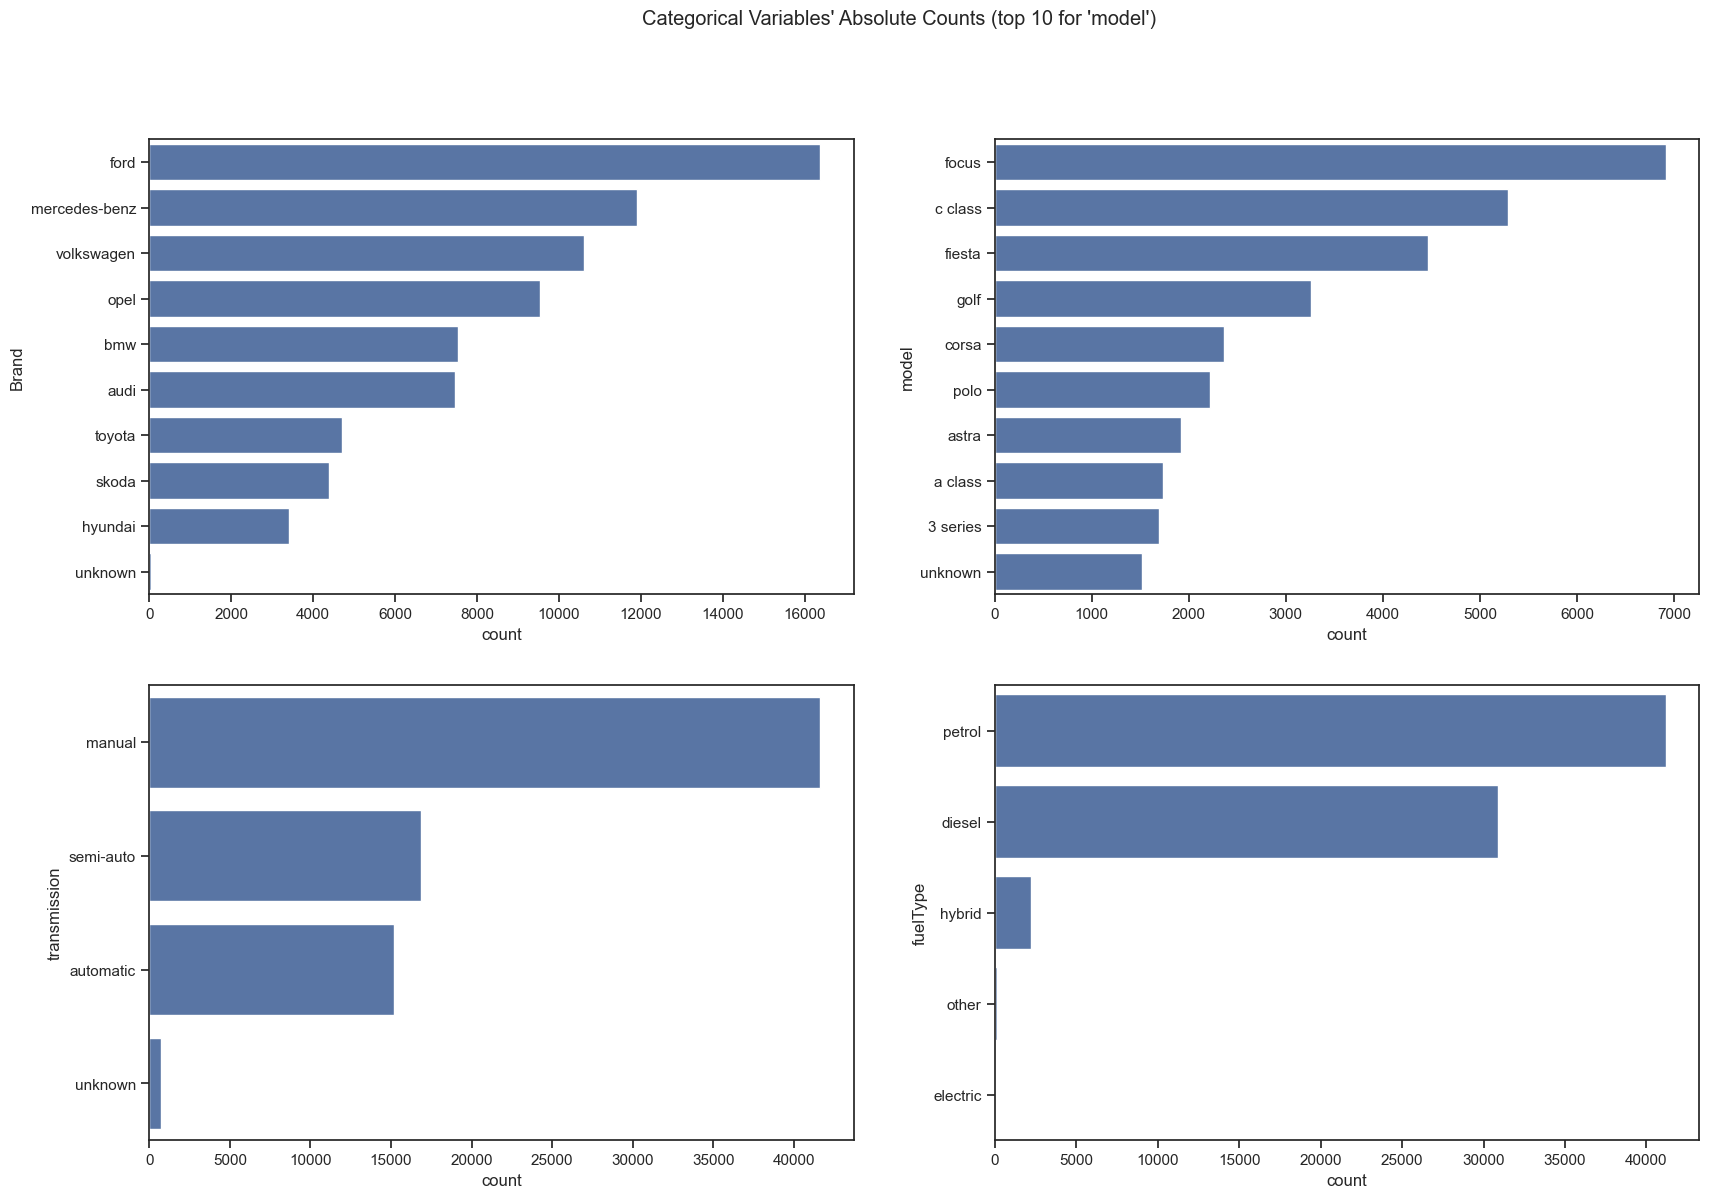

In [901]:
sns.set_style('ticks')

sp_rows = 2
sp_cols = 2

fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 13))

#only top 10 for model
for ax, feat in zip(axes.flatten(), non_metric_features):
    sns.countplot(y=feat, data=train, ax=ax, order=train[feat].value_counts().index[:10])

# Layout
# Add a centered title to the figure:
title = "Categorical Variables' Absolute Counts (top 10 for 'model')"

plt.suptitle(title)
plt.show()

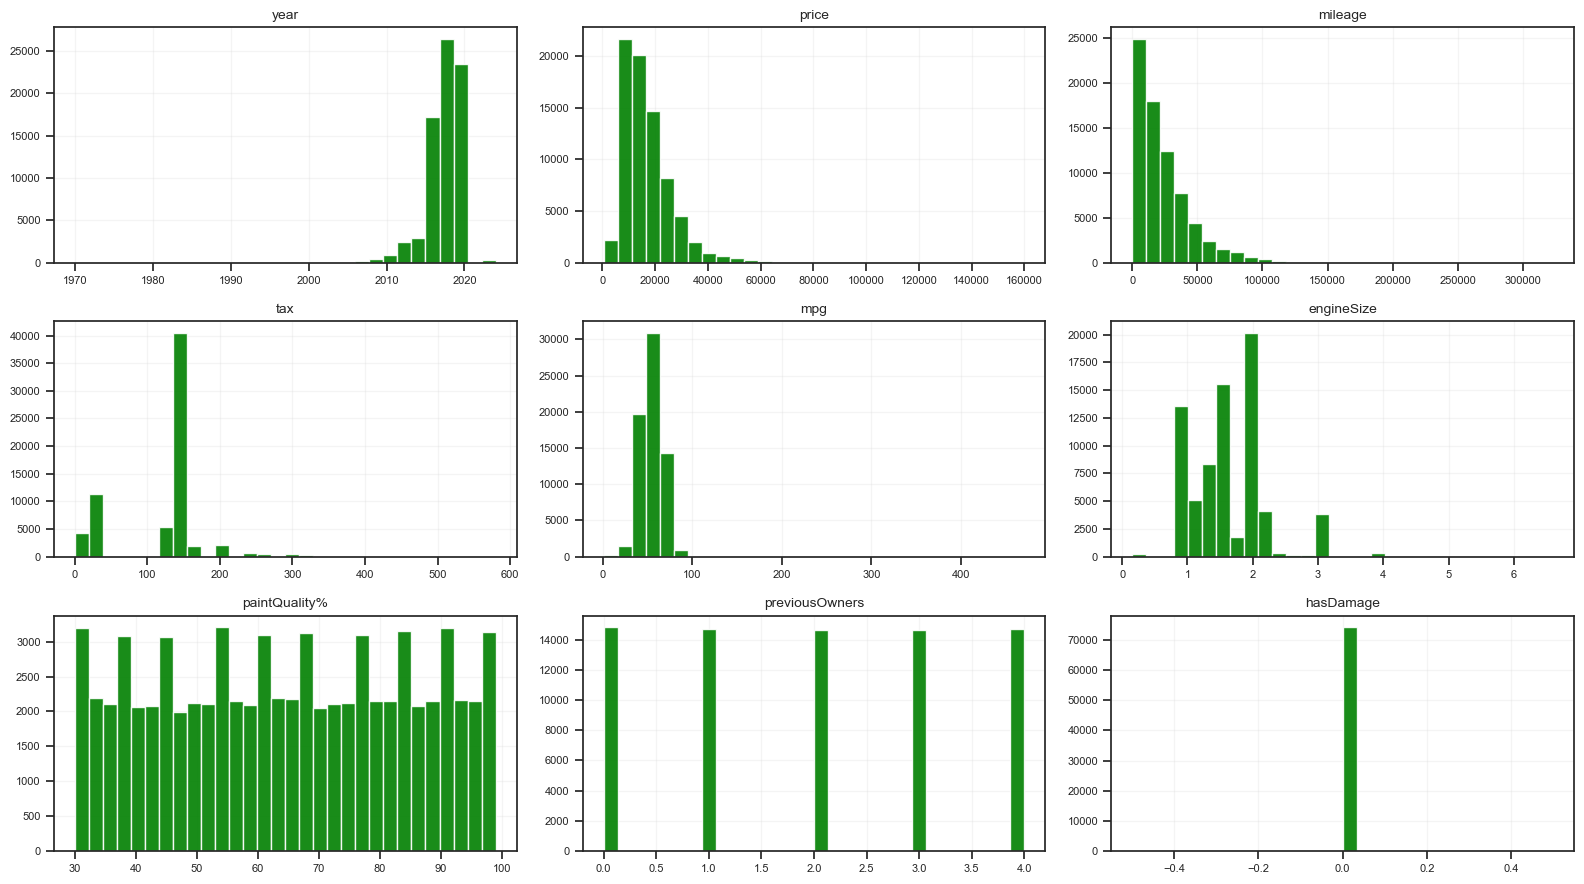

In [902]:
num = train.select_dtypes(include='number')
cols = num.columns.tolist()

n = len(cols)
ncols = 3
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(16, 3*nrows))
axes = axes.flatten() if n > 1 else [axes]

for ax, col in zip(axes, cols):
    ax.hist(num[col].dropna(), bins=30, color='green', edgecolor='white', alpha=0.9)
    ax.set_title(col, fontsize=10)
    ax.tick_params(labelsize=8)
    ax.grid(alpha=0.2)

for ax in axes[n:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

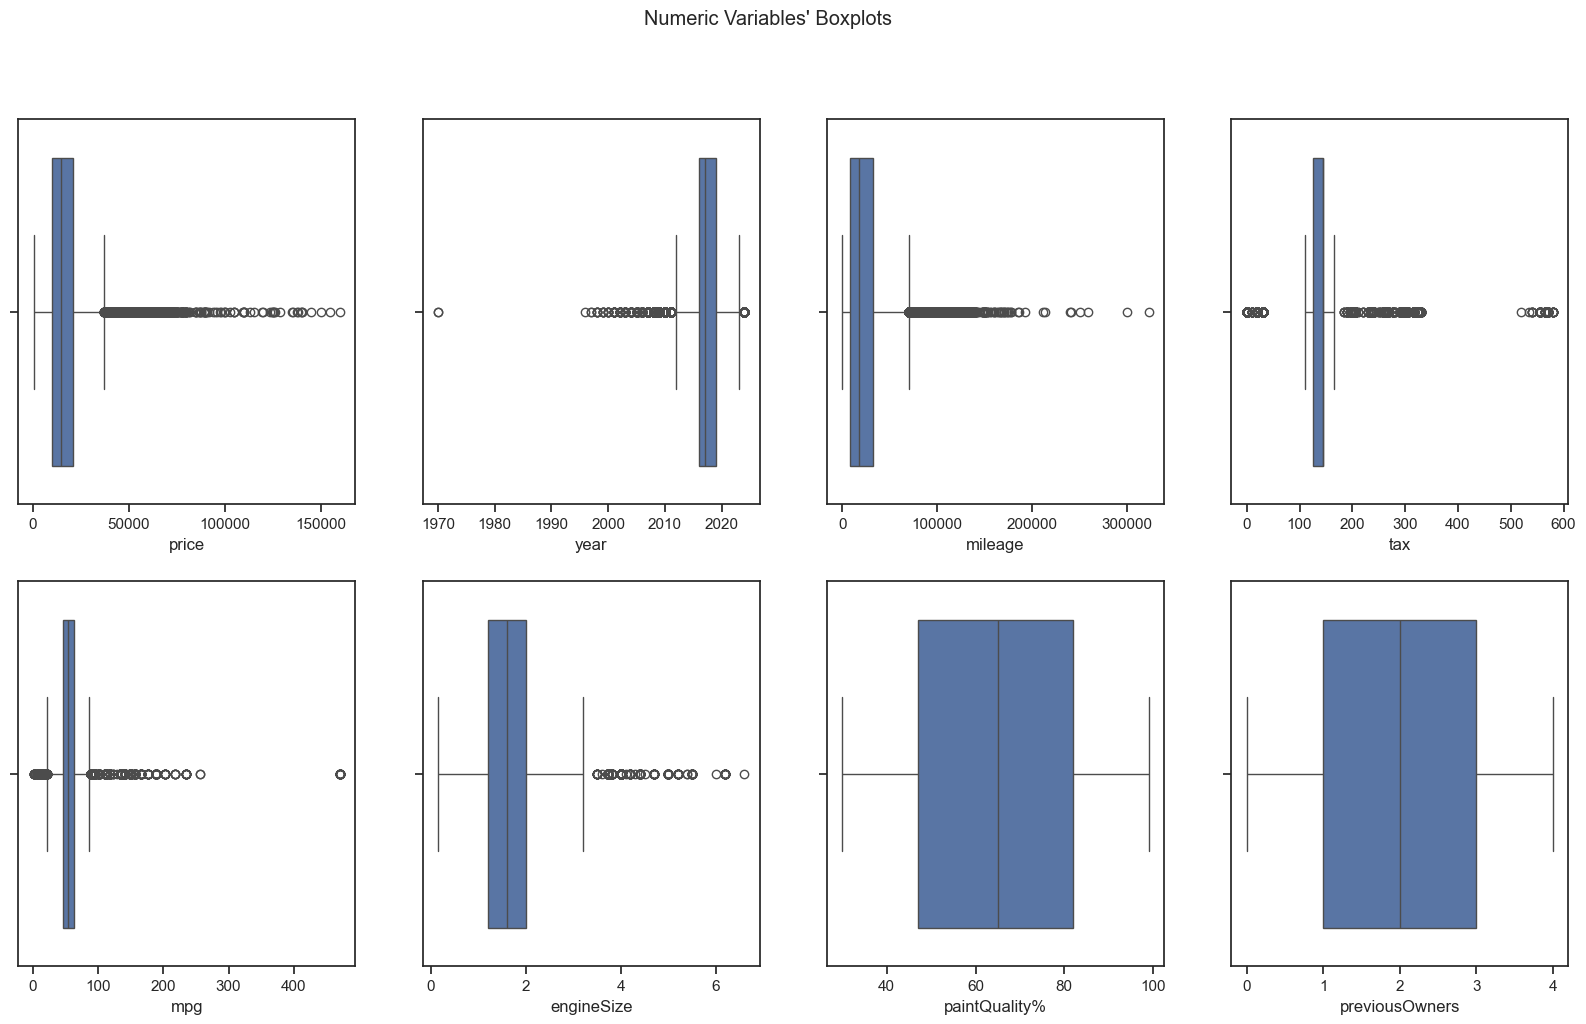

In [903]:
# Plot ALL Numeric Variables' Boxplots in one figure

sns.set_style('ticks')

sp_rows = 2
sp_cols = 4

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(x=train[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Boxplots"

plt.suptitle(title)
plt.show()

In [904]:
# One outlier from 1970 - we dont have enough examples from old cars
train.loc[train['year'] < 1980]

Brand    model    year  price transmission  mileage fuelType  \
carID                                                                         
35769  mercedes-benz  m class  1970.0  24999    automatic  14000.0   diesel   
62732           opel   zafira  1970.0  10495       manual  37357.0      NaN   

         tax   mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                                     
35769  305.0  39.2         NaN           44.0             3.0        0.0  
62732  200.0  42.2         NaN           60.0             2.0        0.0

In [905]:
# Only bmw - i3 - Whole group of cars
train.loc[train['mpg'] > 400]

Brand model    year  price transmission  mileage  fuelType    tax  \
carID                                                                     
8497    bmw    i3  2017.0  21495    automatic  24041.0    hybrid    0.0   
8993    bmw    i3  2016.0  18999    automatic   9990.0       NaN    0.0   
9196    bmw    i3  2016.0  19850    automatic  19995.0    hybrid    0.0   
9643    bmw    i3  2017.0  19948    automatic  20929.0    hybrid  135.0   
9737    bmw    i3  2014.0  14495    automatic  34539.0    hybrid    0.0   
9815    bmw    i3  2016.0  19875    automatic  20013.0       NaN    0.0   
10133   bmw    i3  2017.0  19300    automatic      NaN     other    0.0   
10327   bmw    i3  2014.0  15450    automatic  42479.0    hybrid    0.0   
10695   bmw    i3  2017.0  21494    automatic      NaN    hybrid  135.0   
10967   bmw    i3  2016.0  17000    automatic  41063.0     other    0.0   
11068   bmw    i3  2016.0  16482          NaN  43695.0    hybrid    0.0   
11532   bmw    i3  2016.0  16500    automatic  35446.0    hybrid    0.0   
11589   bmw    i3  2016.0  17100    automatic  25269.0     other    0.0   
11962   bmw    i3  2017.0  22495    automatic  21025.0    hybrid    0.0   
12090   bmw    i3  2016.0  19490    automatic   8421.0    hybrid    0.0   
12269   bmw    i3  2017.0  19980    automatic  26965.0    hybrid  140.0   
12332   bmw    i3  2015.0  14285    automatic  65800.0    hybrid    0.0   
12640   bmw    i3  2017.0  19500    automatic  23956.0     other  135.0   
12786   bmw    i3  2015.0  17400    automatic  29465.0  electric    0.0   
12853   bmw    i3  2017.0  21898    automatic  10839.0    hybrid    0.0   
13075   bmw    i3  2015.0  15498    automatic  33931.0    hybrid    0.0   
13378   bmw    i3  2015.0  17481    automatic   9886.0    hybrid    0.0   
13430   bmw    i3  2017.0  19998    automatic  41146.0    hybrid    0.0   
14512   bmw     i  2017.0  19000    automatic  23983.0    hybrid    0.0   
14531   bmw    i3  2017.0  18500    automatic  36429.0    hybrid    0.0   

         mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                               
8497   470.8         NaN           46.0             3.0        0.0  
8993   470.8         NaN           44.0             0.0        0.0  
9196   470.8         NaN           79.0             3.0        0.0  
9643   470.8         NaN           71.0             2.0        0.0  
9737   470.8         NaN           42.0             0.0        0.0  
9815   470.8         NaN           30.0             0.0        0.0  
10133  470.8    0.600000           95.0             4.0        0.0  
10327  470.8         NaN           79.0             2.0        0.0  
10695  470.8         NaN           54.0             1.0        0.0  
10967  470.8    0.600000           34.0             NaN        0.0  
11068  470.8         NaN           81.0             1.0        0.0  
11532  470.8         NaN           59.0             3.0        0.0  
11589  470.8    0.600000           97.0             0.0        0.0  
11962  470.8         NaN           66.0             0.0        0.0  
12090  470.8         NaN           31.0             4.0        0.0  
12269  470.8         NaN           81.0             3.0        0.0  
12332  470.8         NaN           50.0             3.0        0.0  
12640  470.8    0.600000           53.0             1.0        0.0  
12786  470.8    3.822758           67.0             2.0        0.0  
12853  470.8         NaN           31.0             4.0        0.0  
13075  470.8         NaN           31.0             4.0        0.0  
13378  470.8         NaN           44.0             0.0        0.0  
13430  470.8         NaN           69.0             1.0        0.0  
14512  470.8         NaN           95.0             4.0        0.0  
14531  470.8         NaN           30.0             2.0        0.0

In [906]:
#not weird
train.loc[train['mileage'] > 200000]

Brand      model    year  price transmission   mileage  \
carID                                                                   
4692            audi         a6  2008.0   2490       manual  323000.0   
9978             bmw         x5  2012.0   7250    automatic  214000.0   
39946  mercedes-benz    a class  2016.0  16249          NaN  240494.0   
45370  mercedes-benz    v class  2010.0   6949    automatic  259000.0   
48042          skoda    octavia  2010.0   1485       manual  250650.0   
48382          skoda    octavia  2010.0   1190       manual  300000.0   
48912          skoda    octavia     NaN   2750    automatic  241565.0   
74387     volkswagen  caravelle  2012.0  11995          NaN  212000.0   

      fuelType    tax   mpg  engineSize  paintQuality%  previousOwners  \
carID                                                                    
4692    diesel  200.0  44.1         2.0           74.0             1.0   
9978    diesel  300.0  37.7         3.0           68.0             1.0   
39946   diesel   20.0  68.9         2.1           81.0             4.0   
45370   diesel  540.0  30.7         3.0           54.0             1.0   
48042   diesel  125.0  57.6         1.9           62.0             1.0   
48382   diesel  125.0  57.6         1.9           79.0             2.0   
48912   diesel  185.0  47.9         1.9           33.0             4.0   
74387   diesel  325.0  34.4         2.0           42.0             2.0   

       hasDamage  
carID             
4692         0.0  
9978         0.0  
39946        0.0  
45370        0.0  
48042        0.0  
48382        0.0  
48912        0.0  
74387        0.0

In [907]:
# seems fine
train.loc[train['tax'] > 400].sample(9)

Brand     model    year  price transmission   mileage fuelType  \
carID                                                                           
34571        hyundai  santa fe  2006.0   3490       manual   71000.0   petrol   
5096            audi        q7  2012.0  17999    automatic   65675.0   diesel   
42643  mercedes-benz  sl class  2015.0  47124    automatic   11000.0   petrol   
45646  mercedes-benz   m class  2007.0   6750    automatic   67000.0   diesel   
10264            bmw        m3  2009.0  16950       manual   65000.0   petrol   
45321  mercedes-benz   c class  2014.0  28990    semi-auto   19562.0   petrol   
45503  mercedes-benz  gl class  2007.0   7340    automatic  104000.0   diesel   
3596            audi       rs6  2014.0  44491    automatic   43752.0   petrol   
4677            audi        r8  2013.0  54850    semi-auto   10800.0   petrol   

         tax   mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                                     
34571  555.0  28.8         2.4           31.0             2.0        0.0  
5096   555.0  28.5         4.1           96.0             3.0        0.0  
42643  555.0  28.5         5.5           76.0             NaN        0.0  
45646  555.0  28.8         3.0           71.0             0.0        0.0  
10264  580.0  21.9         4.0           31.0             3.0        0.0  
45321  570.0   NaN         6.2           57.0             4.0        0.0  
45503  570.0  28.8         3.0           92.0             2.0        0.0  
3596   555.0  28.8         4.0           71.0             3.0        0.0  
4677   570.0  22.4         4.2           98.0             1.0        0.0

In [908]:
#seems fine
train.loc[train['tax'] < 100].sample(9)

Brand     model    year  price transmission  mileage fuelType  \
carID                                                                          
57173           opel     corsa  2016.0   7200       manual  42483.0   petrol   
74822     volkswagen        up  2017.0   8495       manual  14000.0   petrol   
67974     volkswagen        up  2015.0   6766       manual  15846.0   petrol   
63684           opel  insignia  2014.0   5990       manual  69500.0   diesel   
15590           ford    fiesta  2016.0   9850       manual  10998.0   petrol   
25510           ford    fiesta  2013.0   7495       manual  36700.0   petrol   
45258  mercedes-benz   e class  2017.0  18795    semi-auto  40000.0   diesel   
56777           opel     corsa  2017.0   7198       manual  18805.0   petrol   
52259         toyota     auris  2017.0  14790    automatic  28350.0   hybrid   

        tax   mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                                    
57173  30.0  55.4         1.4           30.0             2.0        0.0  
74822  20.0  64.2         1.0           47.0             3.0        0.0  
67974  20.0  60.1         1.0           53.0             1.0        0.0  
63684  30.0  65.7         2.0           52.0             4.0        0.0  
15590   0.0  65.7         1.0           74.0             3.0        0.0  
25510   0.0  65.7         1.0           71.0             1.0        0.0  
45258  30.0  65.7         2.0           86.0             3.0        0.0  
56777  30.0  55.4         1.4           68.0             NaN        0.0  
52259   0.0  72.4         1.8           80.0             1.0        0.0

In [909]:
#seems fine
train.loc[train['engineSize'] > 4].sample(9)

Brand     model    year   price transmission       mileage  \
carID                                                                       
8419             bmw        m5  2016.0   30181    semi-auto  26000.000000   
41531  mercedes-benz  sl class  2016.0   49948    automatic   6200.000000   
36196  mercedes-benz   c class  2014.0   25885    semi-auto  86705.854885   
5324            audi        r8  2019.0  119450    automatic   3000.000000   
1681            audi        r8  2013.0   47995       manual  19834.000000   
12871            bmw        x5  2018.0   51999    semi-auto  15633.000000   
12393            bmw  5 series  2016.0   30990    automatic  32000.000000   
4677            audi        r8  2013.0   54850    semi-auto  10800.000000   
12387            bmw        x5  2018.0   51988    automatic   9691.000000   

      fuelType    tax   mpg  engineSize  paintQuality%  previousOwners  \
carID                                                                    
8419    petrol  565.0  28.5         4.4           34.0             2.0   
41531   petrol  555.0  28.0         5.5           79.0             4.0   
36196   petrol    NaN   NaN         6.2           31.0             0.0   
5324    petrol  145.0  21.4         5.2           47.0             2.0   
1681    petrol  570.0  19.6         4.2           80.0             3.0   
12871   petrol  145.0  25.4         4.4           54.0             1.0   
12393   petrol  555.0  28.5         4.4           30.0             1.0   
4677    petrol  570.0  22.4         4.2           98.0             1.0   
12387   petrol  150.0  25.4         4.4           40.0             3.0   

       hasDamage  
carID             
8419         0.0  
41531        NaN  
36196        0.0  
5324         0.0  
1681         0.0  
12871        0.0  
12393        0.0  
4677         0.0  
12387        0.0

### 2.2.2 Bivariate Analysis

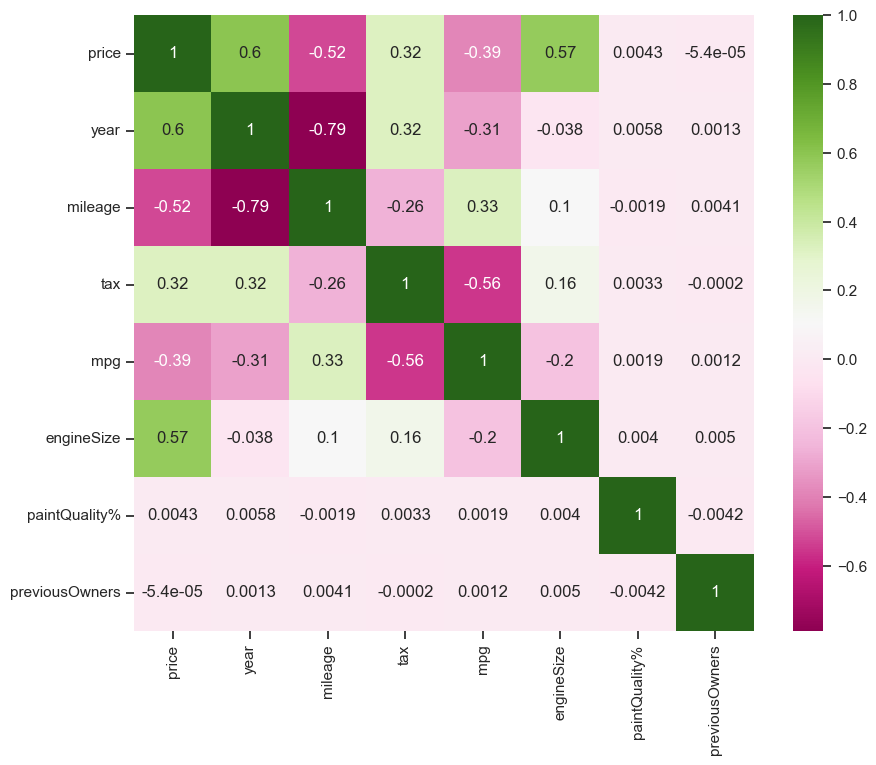

In [910]:
fig = plt.figure(figsize=(10, 8))
threshold = 0.3

corr = train[metric_features].corr(method="spearman")

annot = corr.round(2).astype(str)
annot_masked = annot.where(corr.abs() >= threshold, '') 

sns.heatmap(data=corr,annot= True, cmap = 'PiYG')

plt.show()

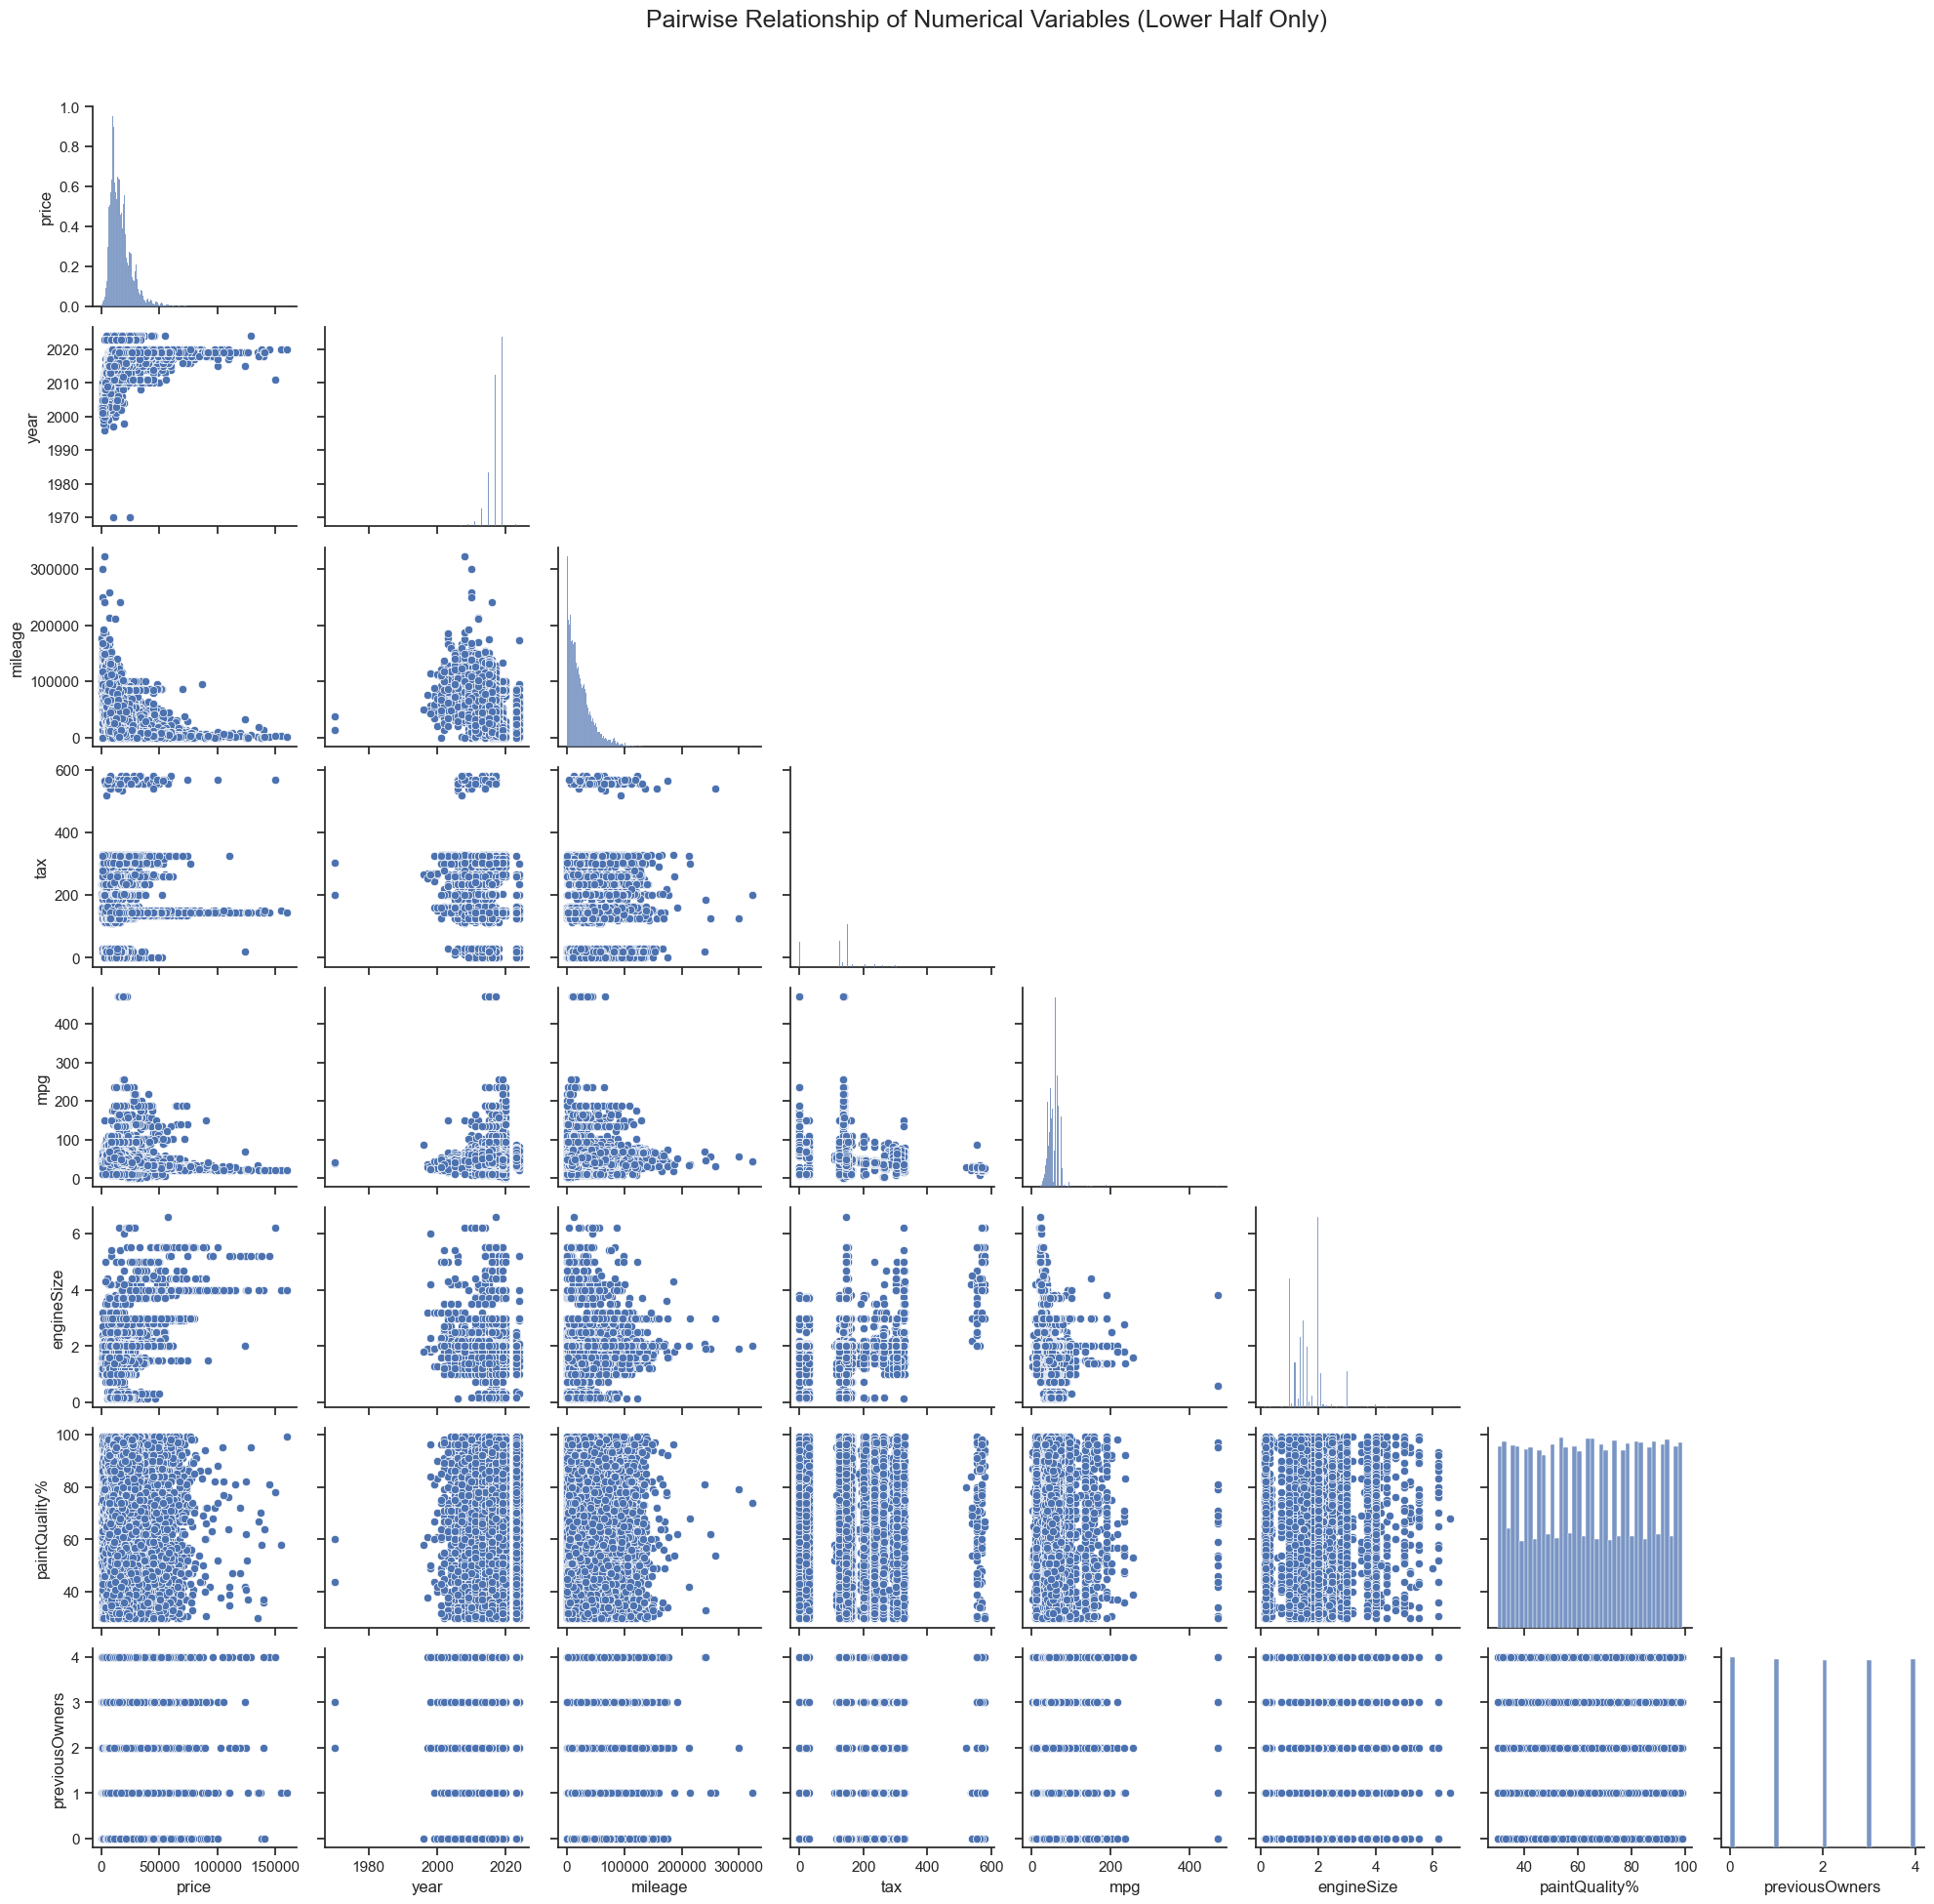

In [911]:
sns.set_style("ticks")

num_cols = len(metric_features)

g = sns.PairGrid(train[metric_features], diag_sharey=False)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot, kde=False)

for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

plt.subplots_adjust(top=0.93)
g.fig.suptitle("Pairwise Relationship of Numerical Variables (Lower Half Only)", fontsize=18)

plt.show()

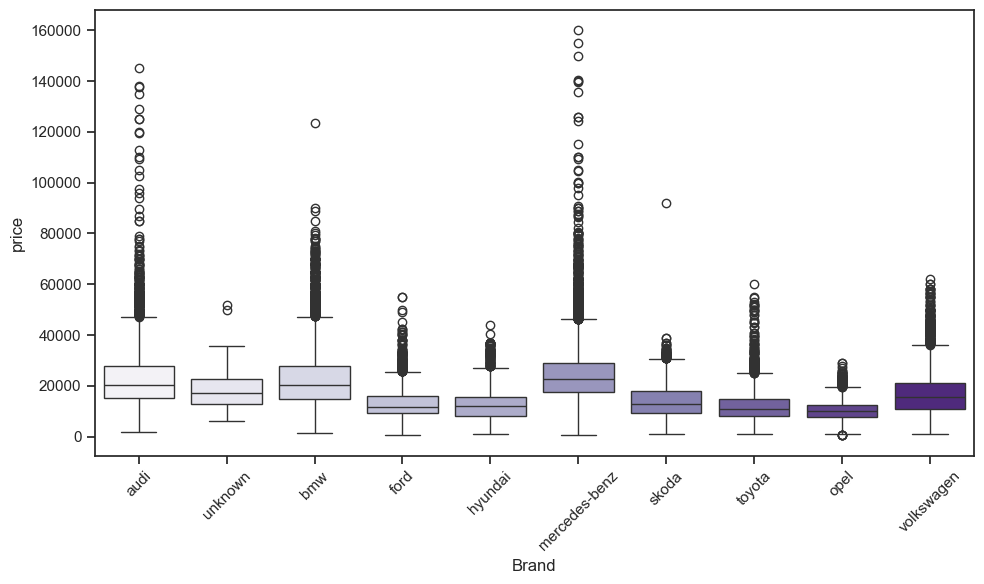

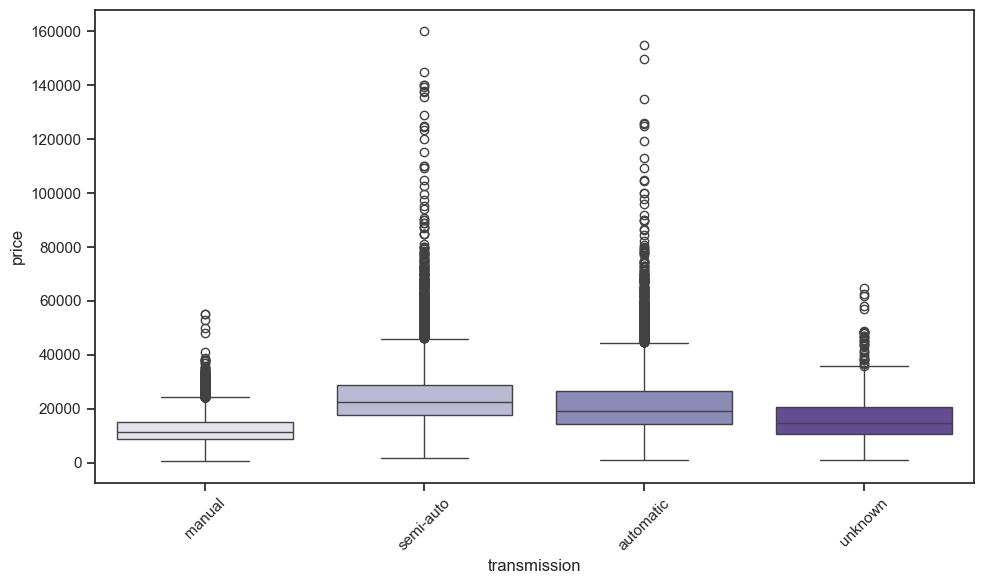

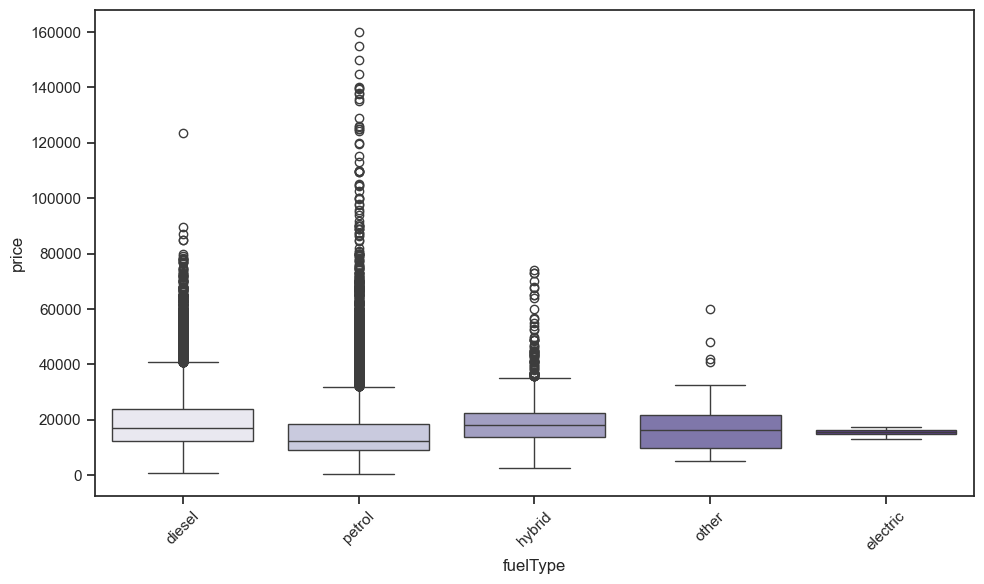

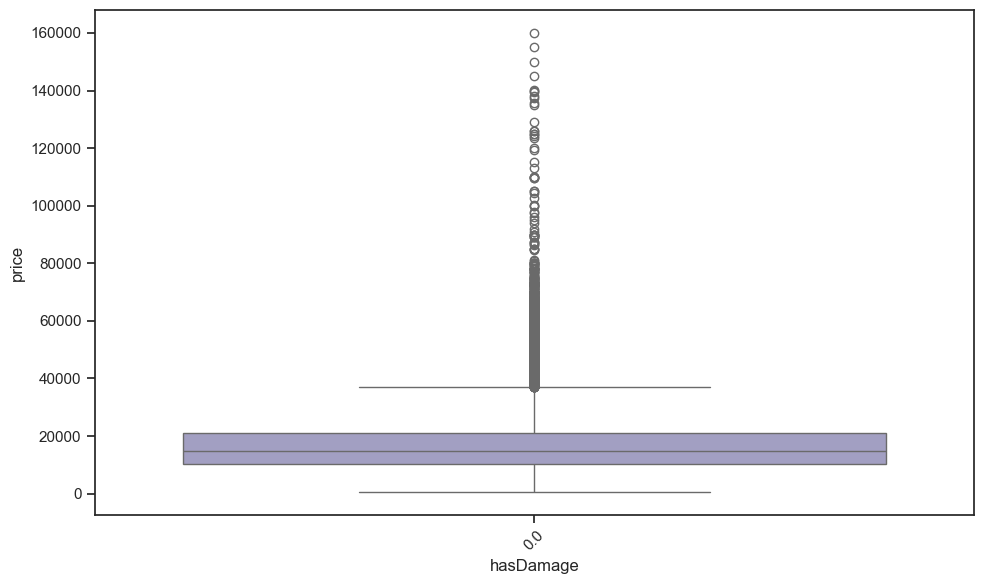

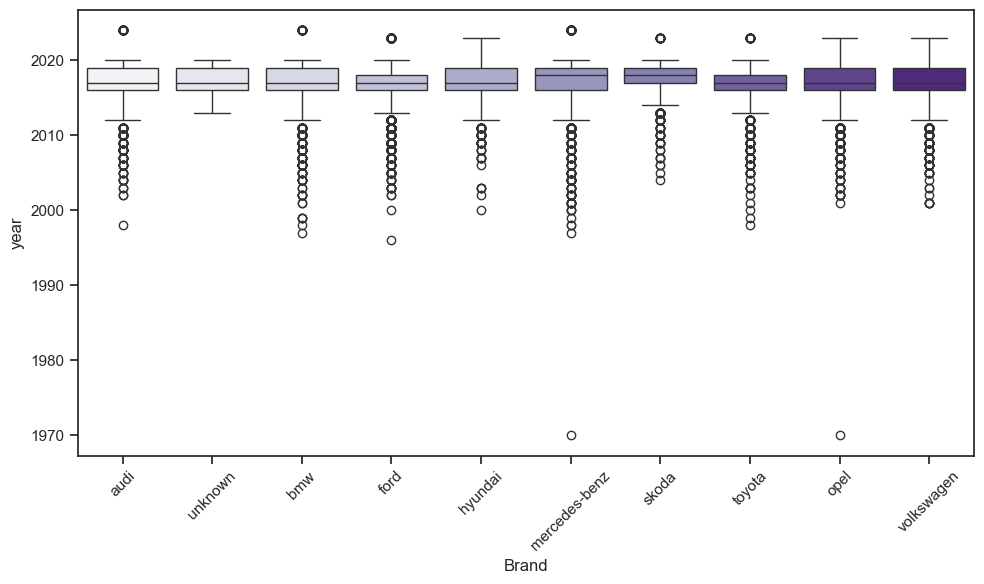

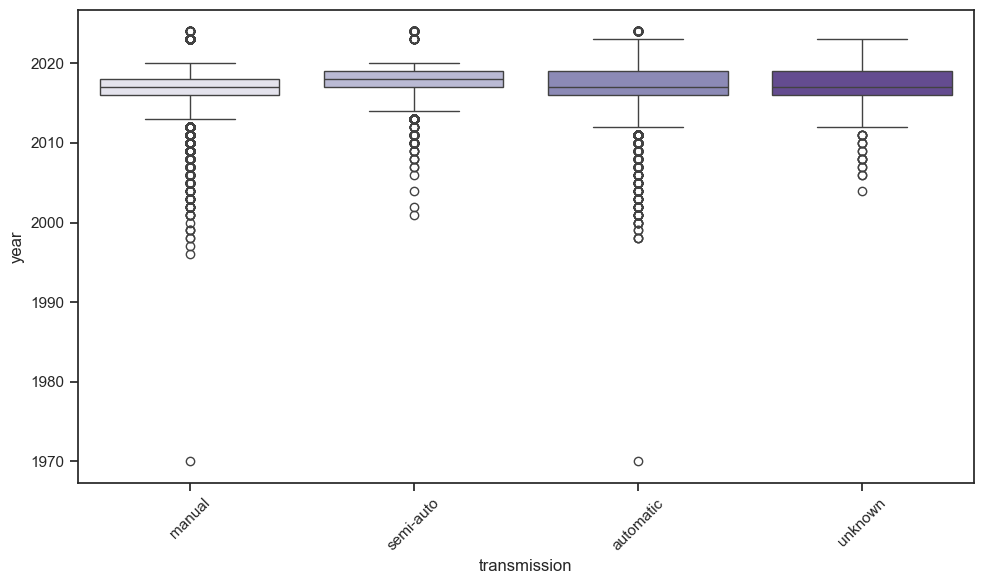

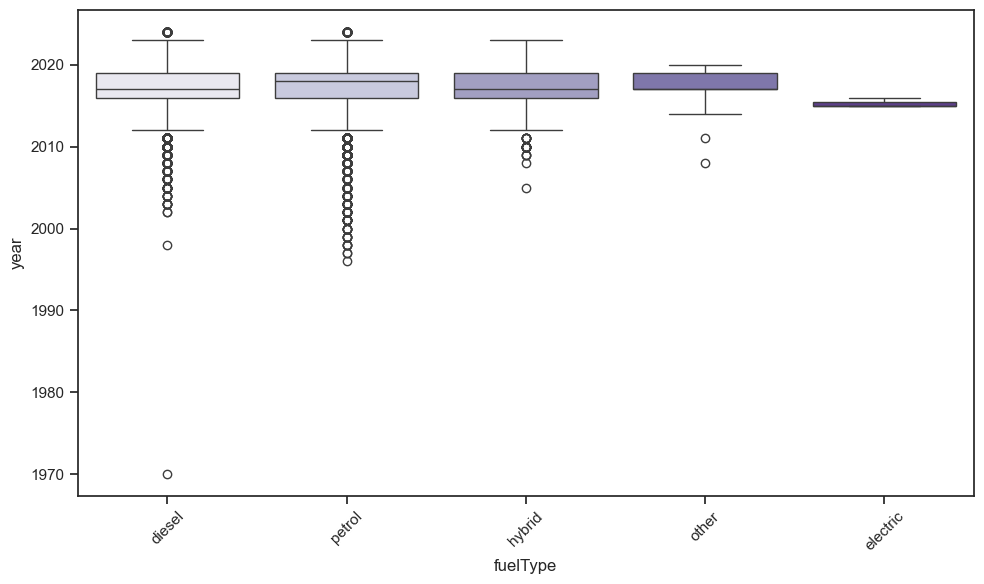

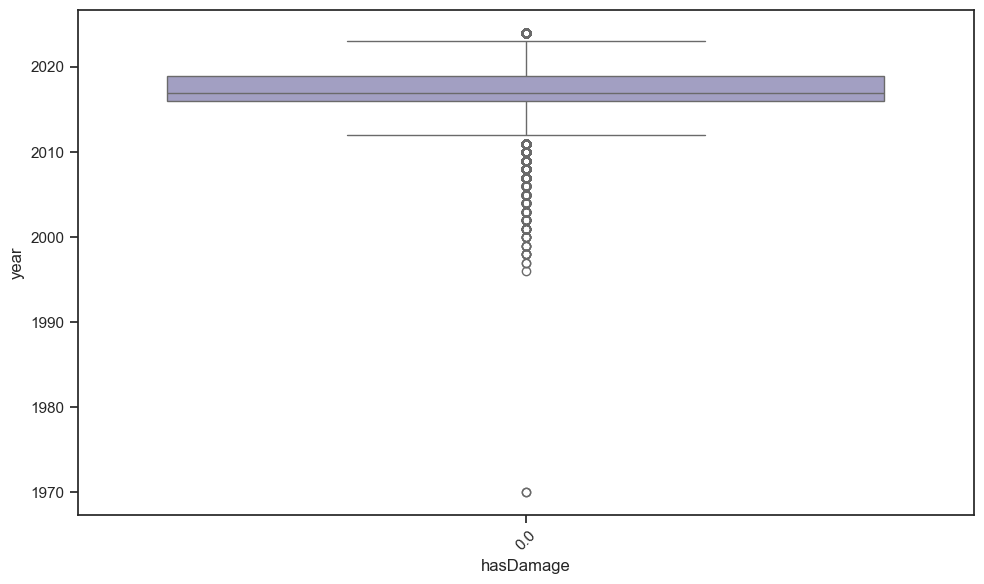

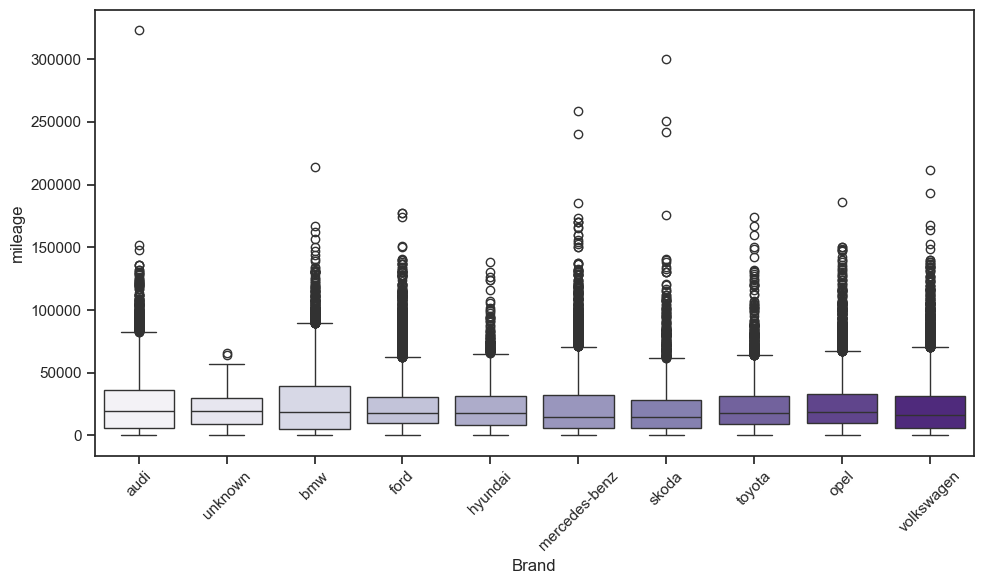

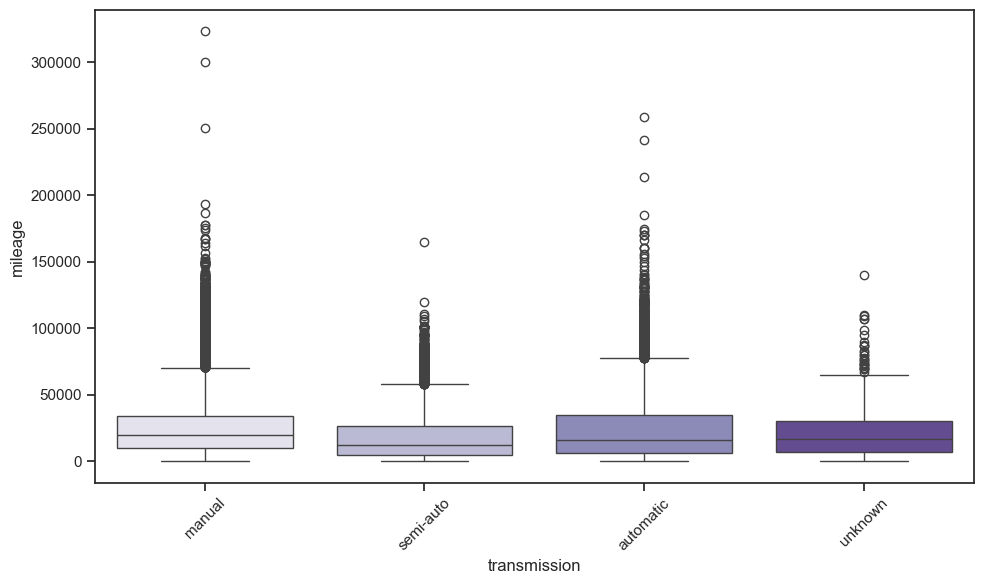

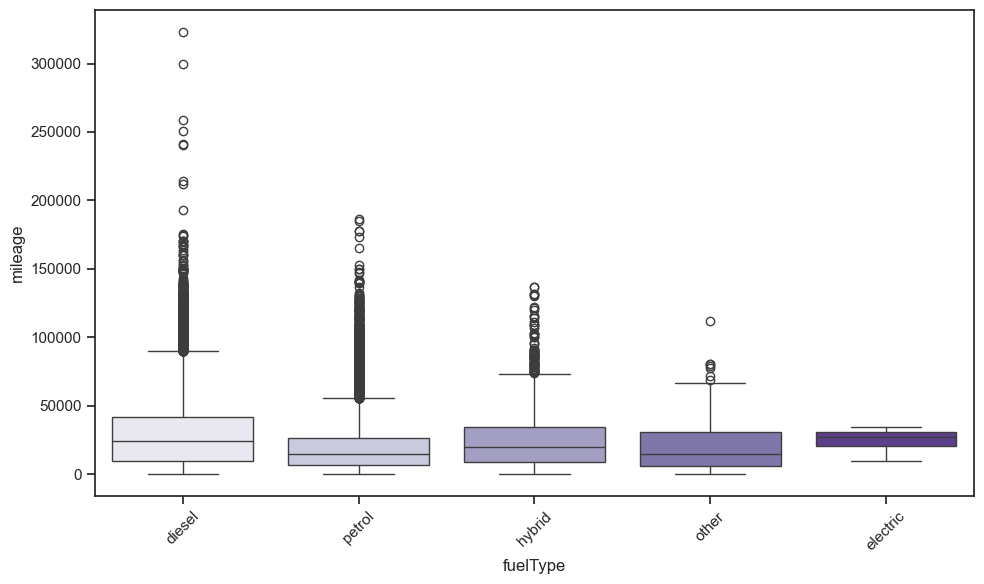

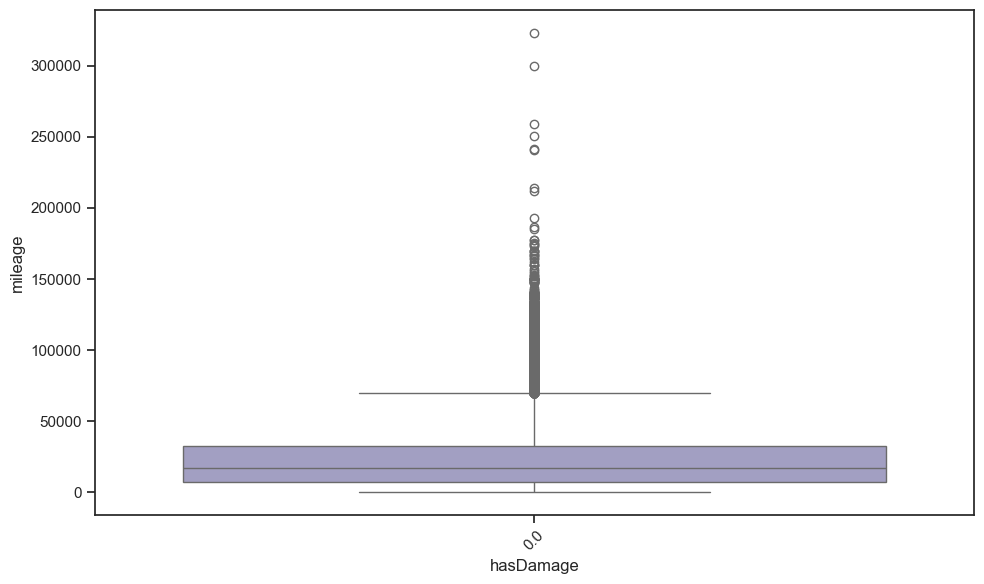

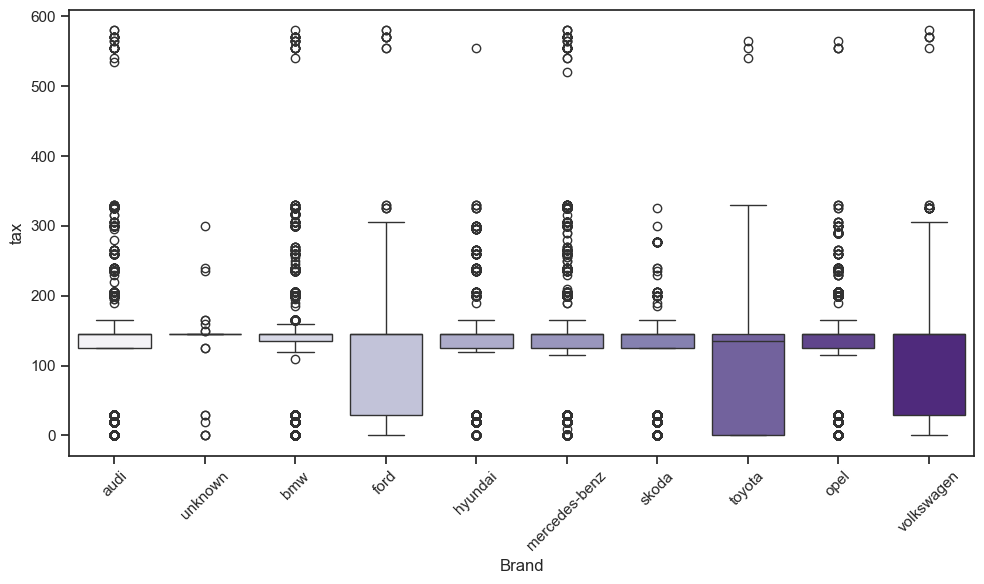

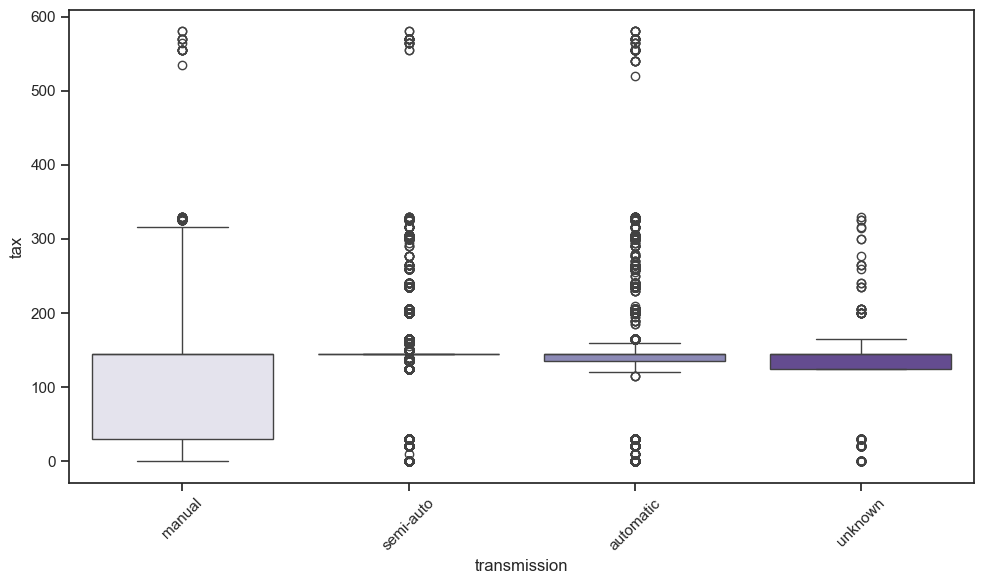

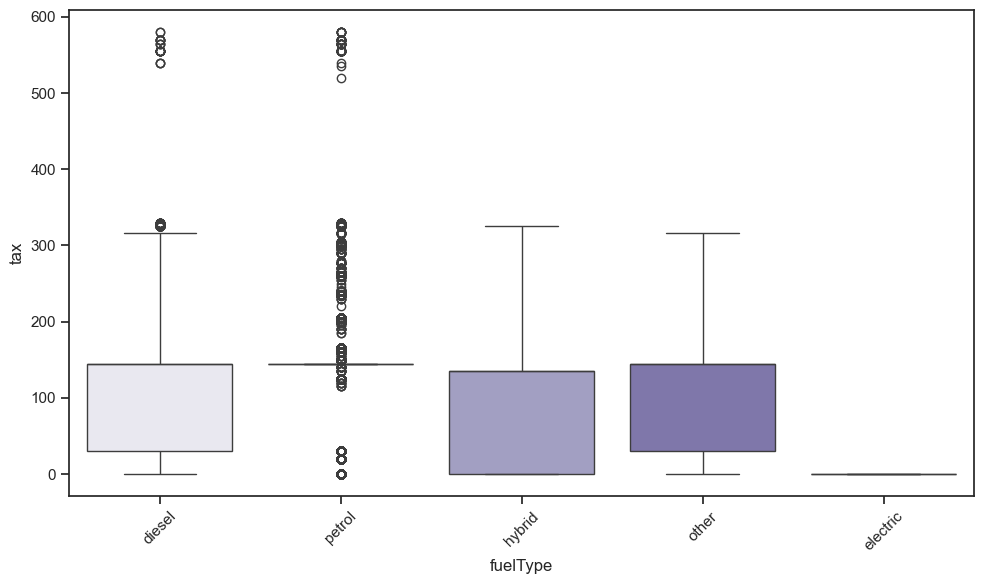

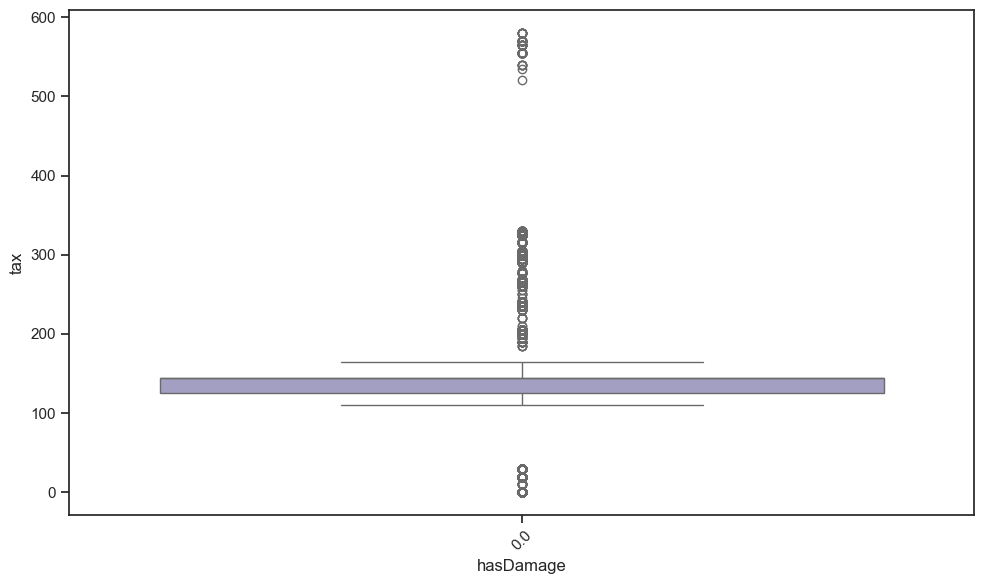

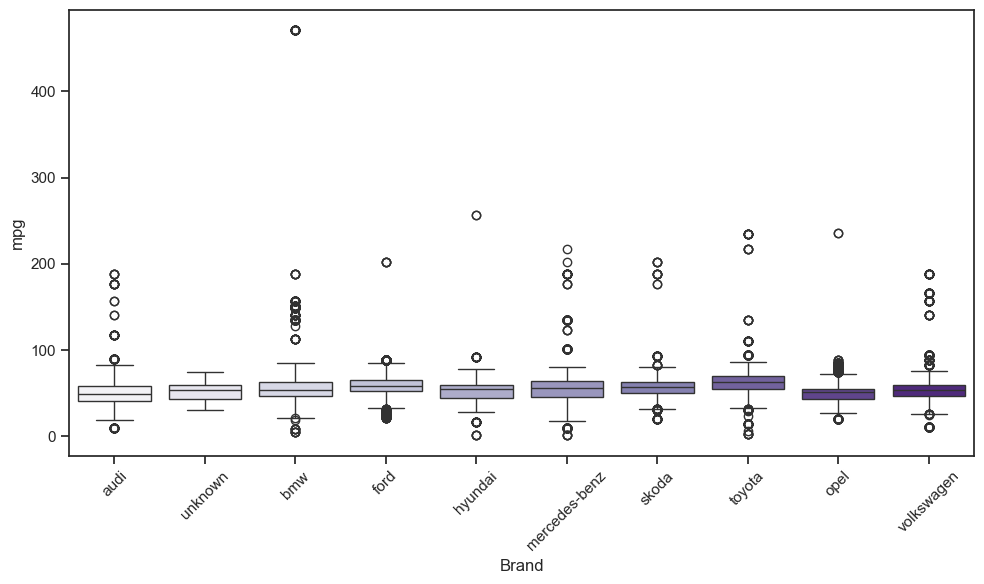

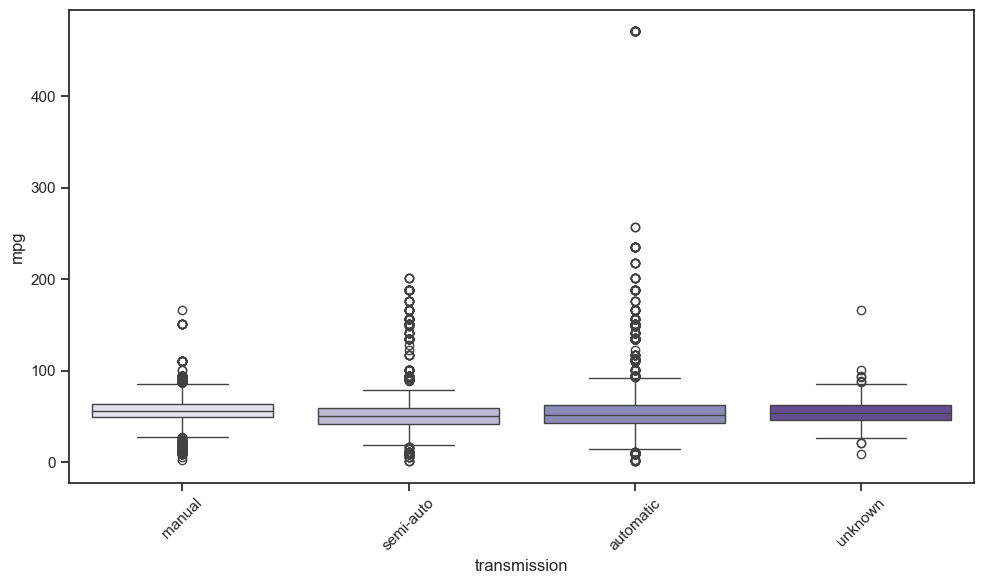

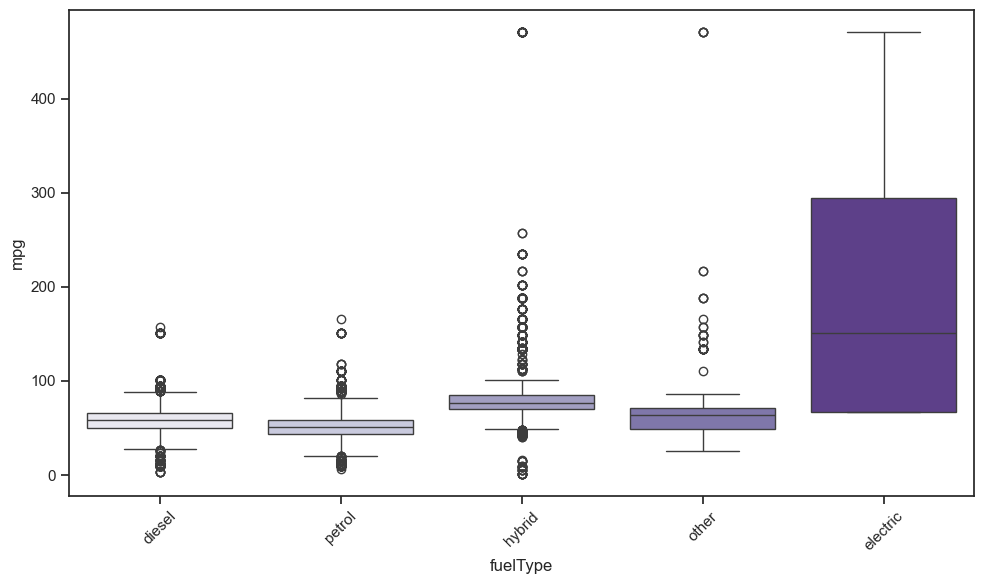

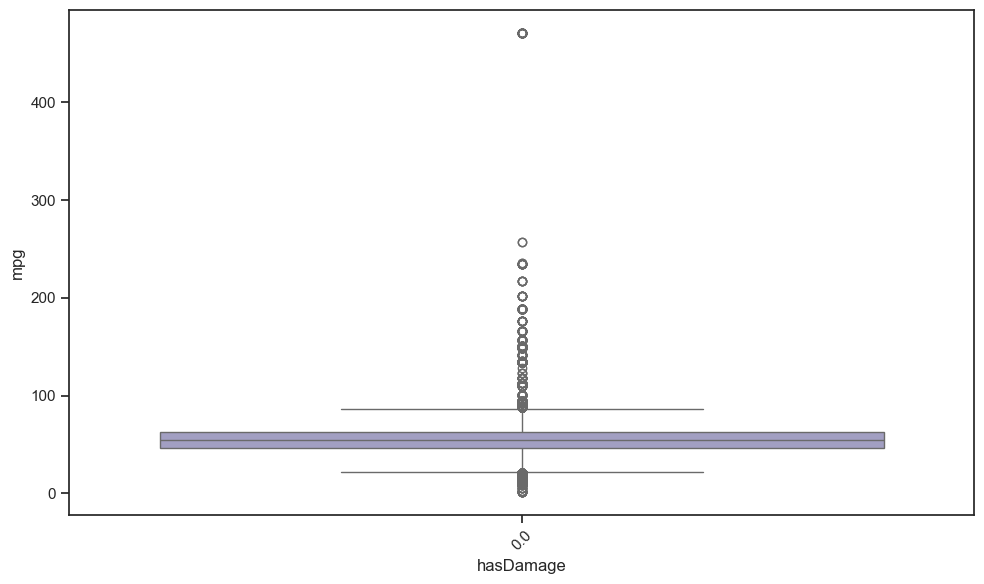

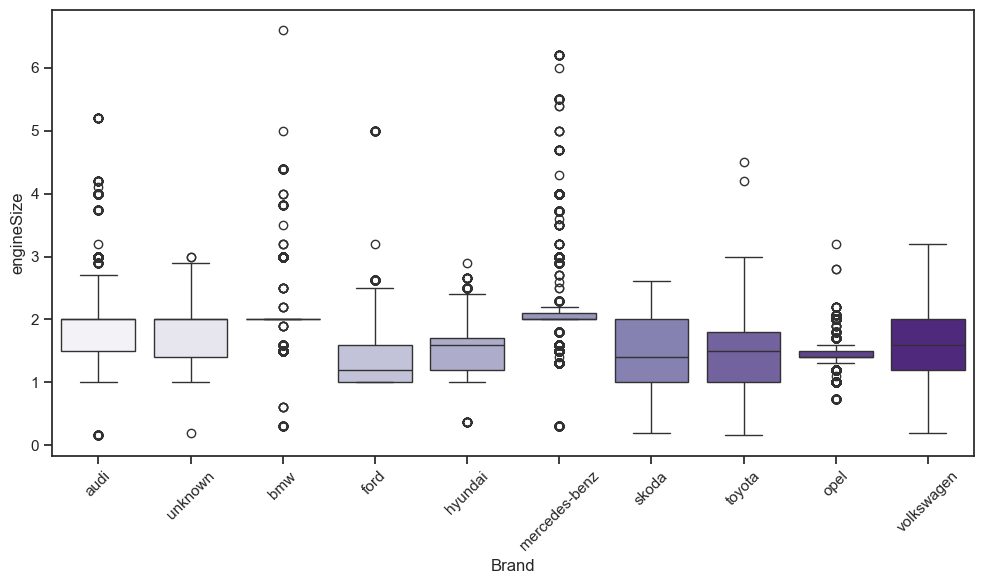

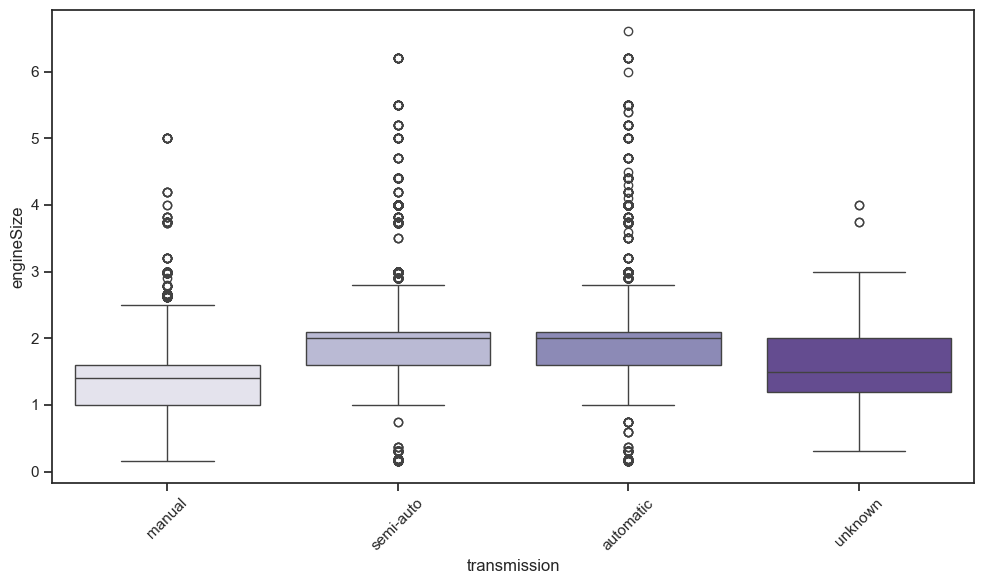

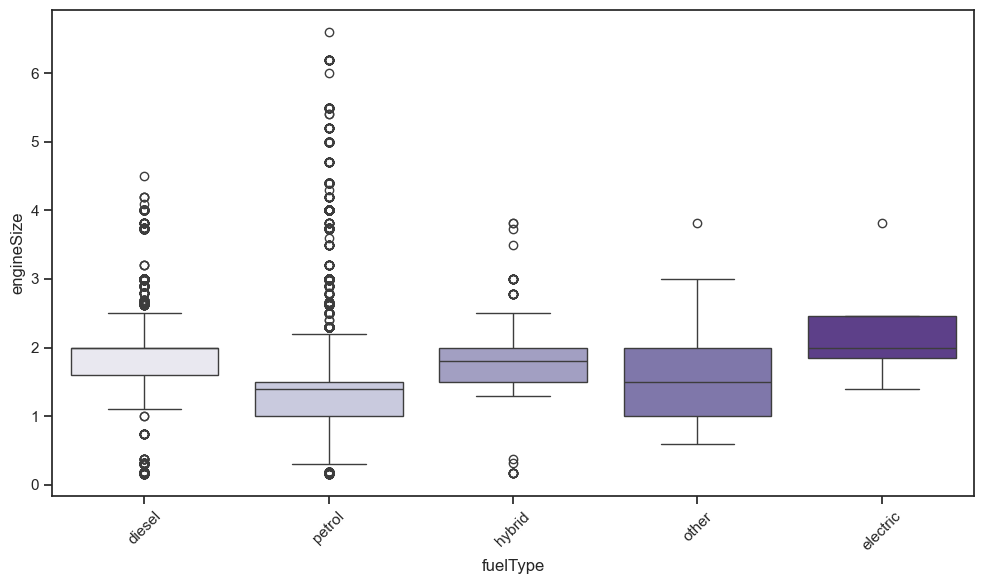

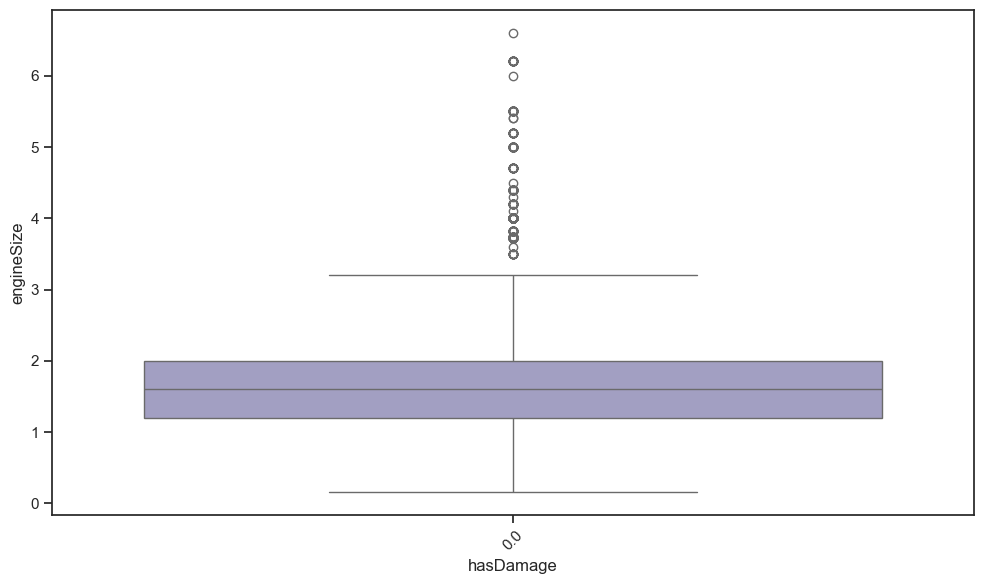

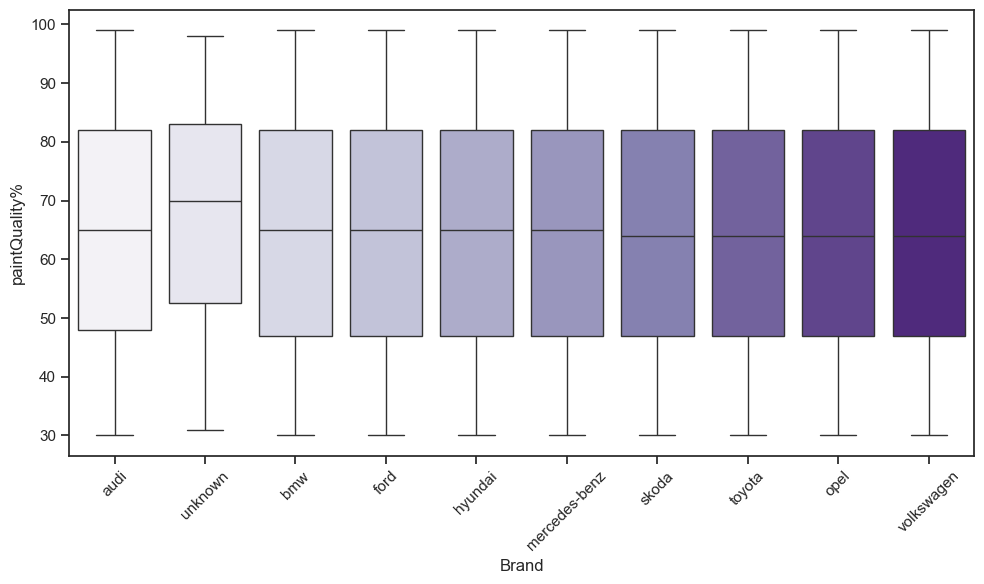

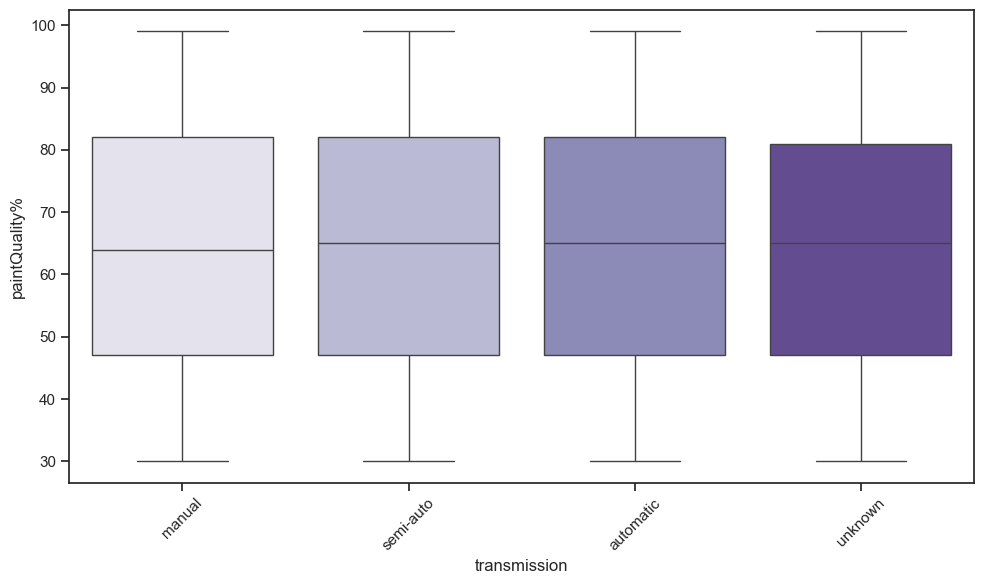

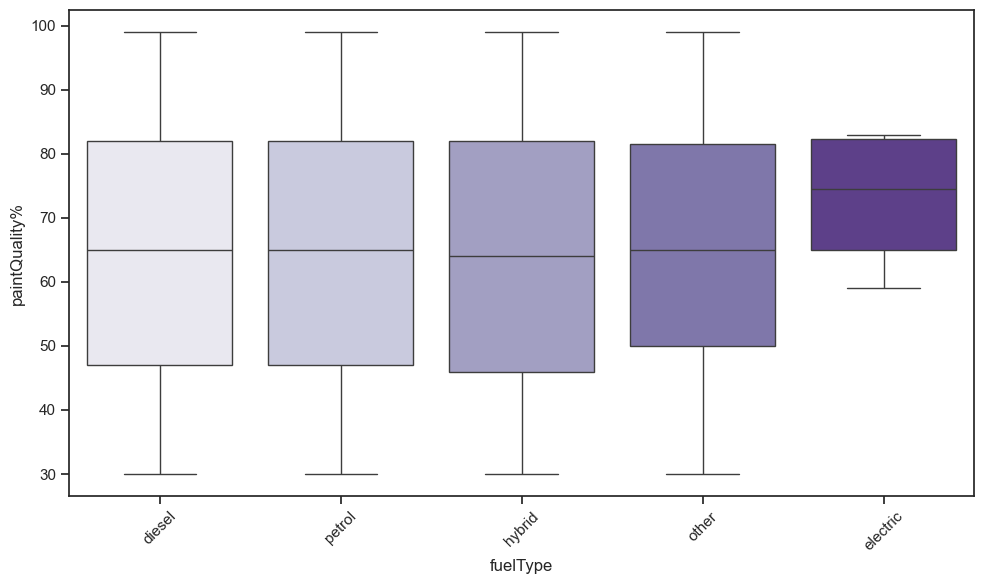

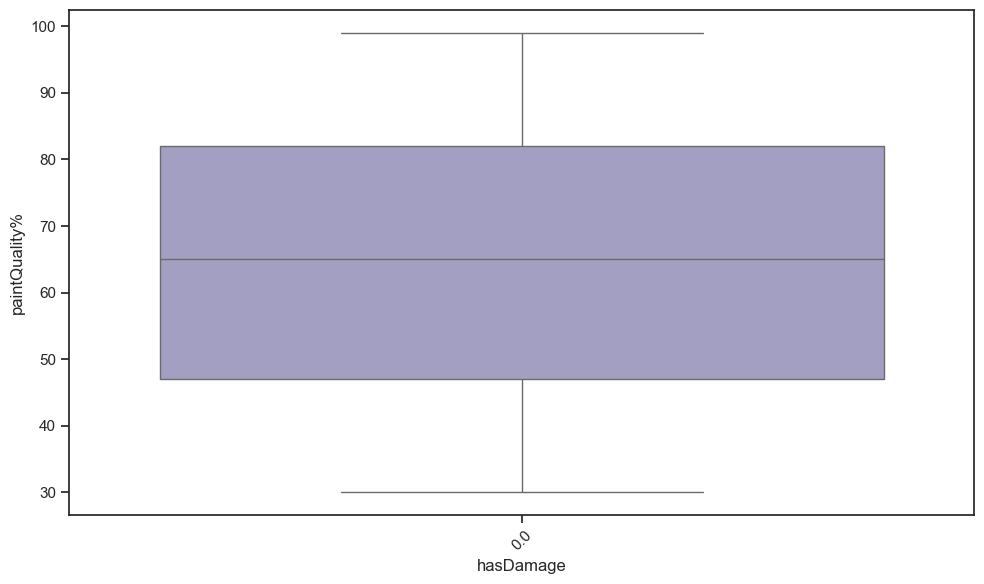

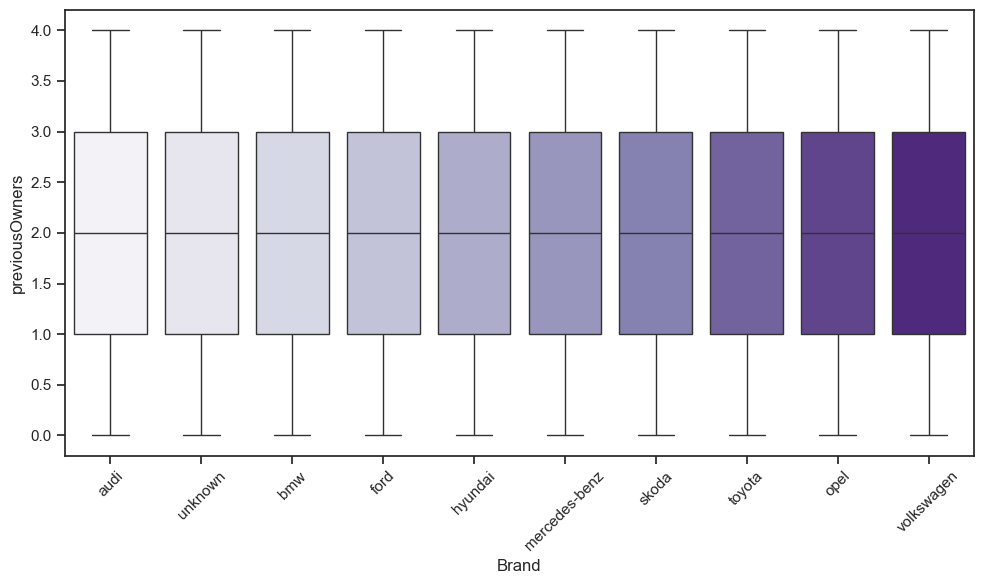

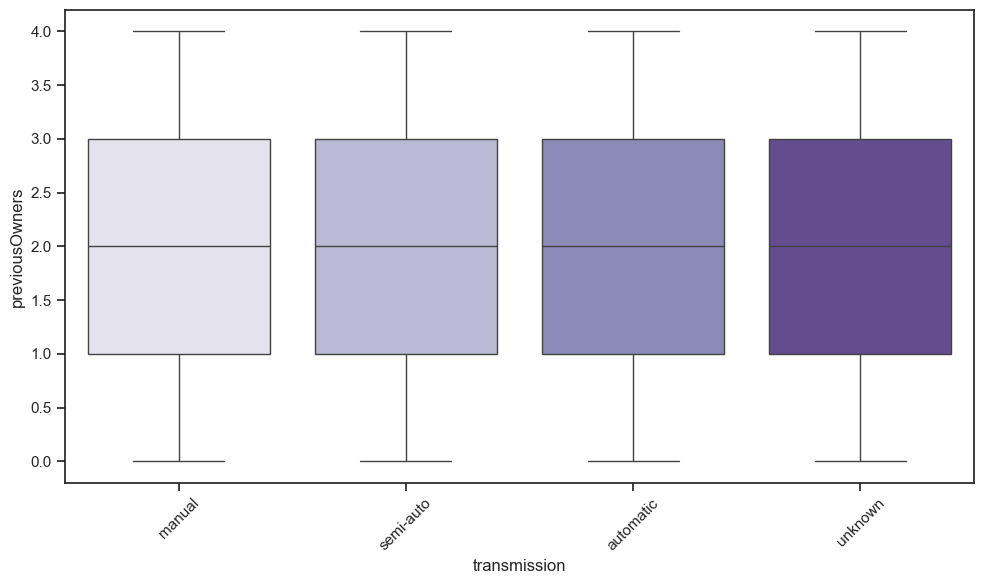

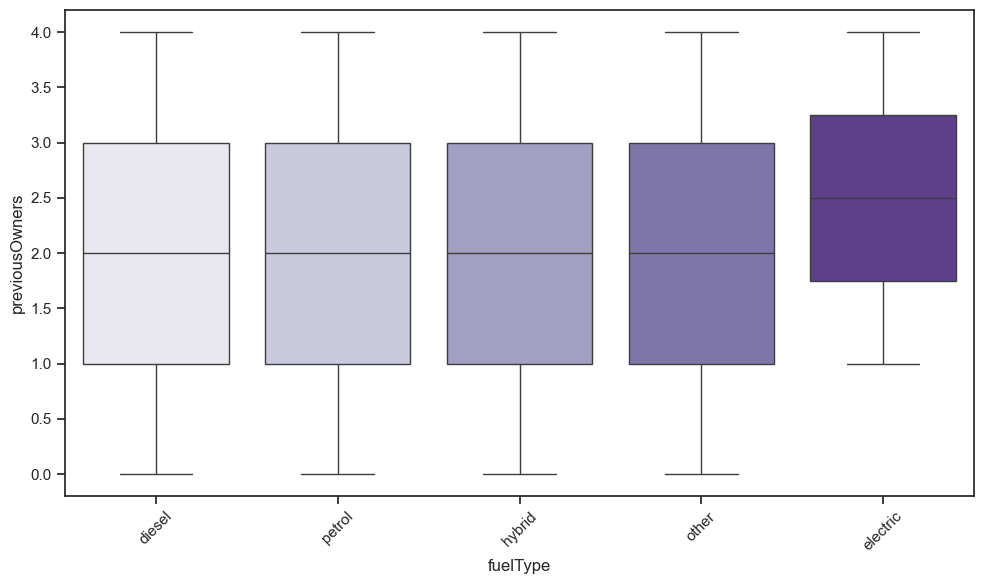

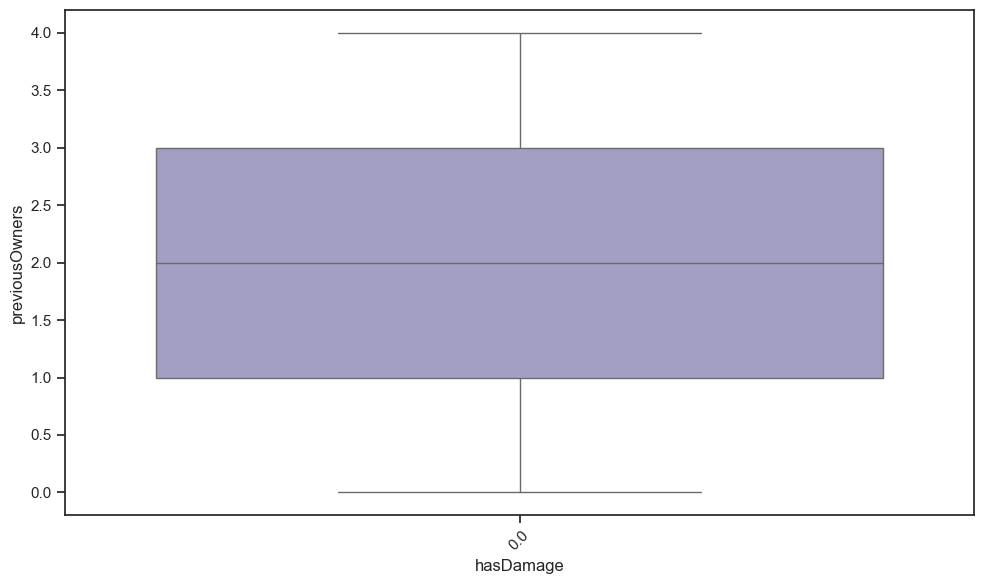

In [912]:
for column in metric_features:
    for x in [f for f in non_metric_features if f != 'model']:
        comparative_boxplot(train, x, column)


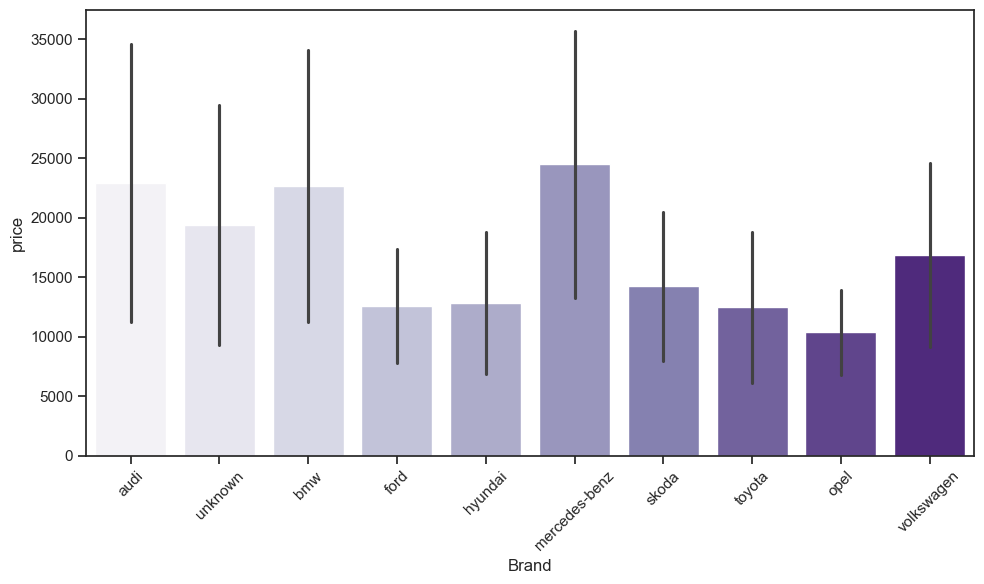

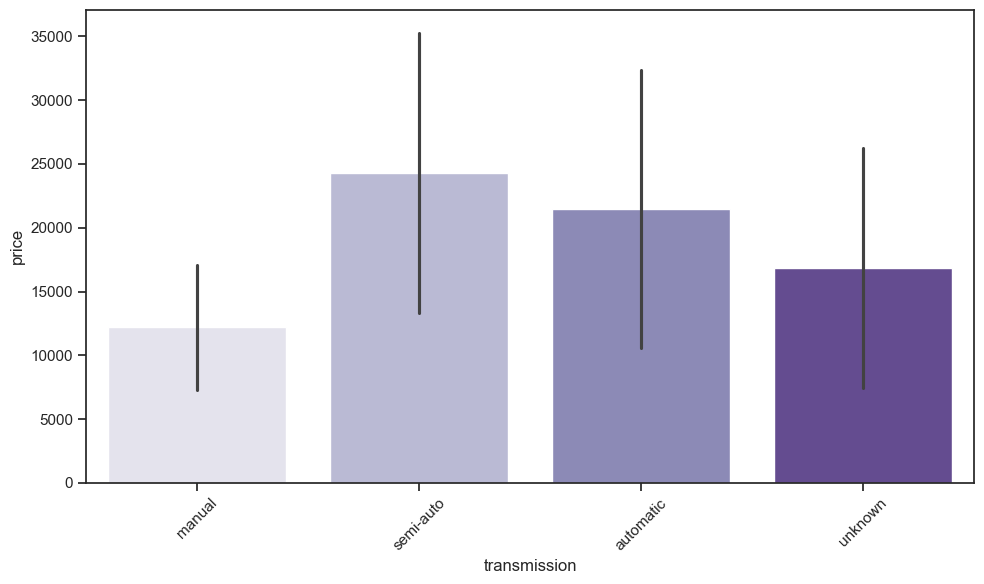

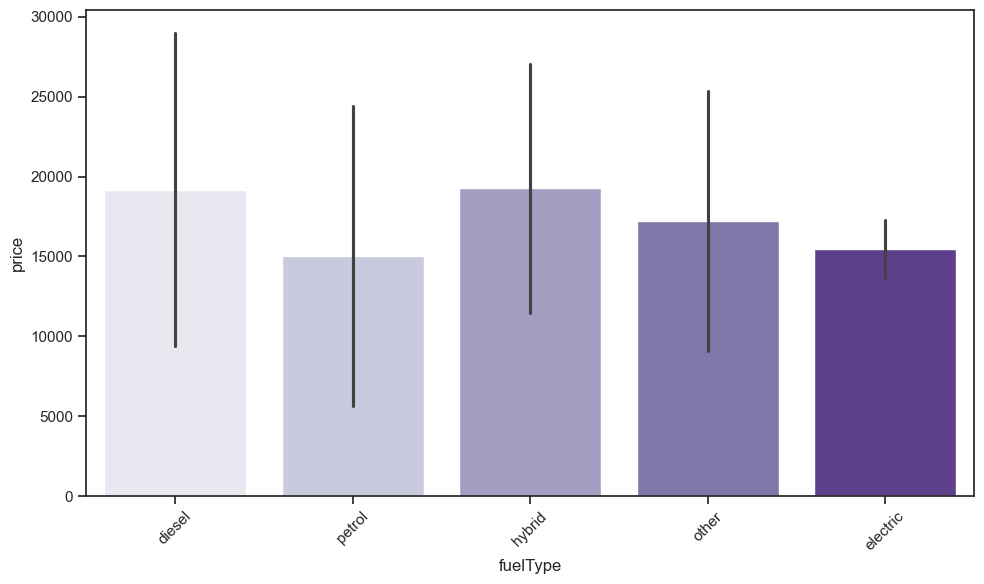

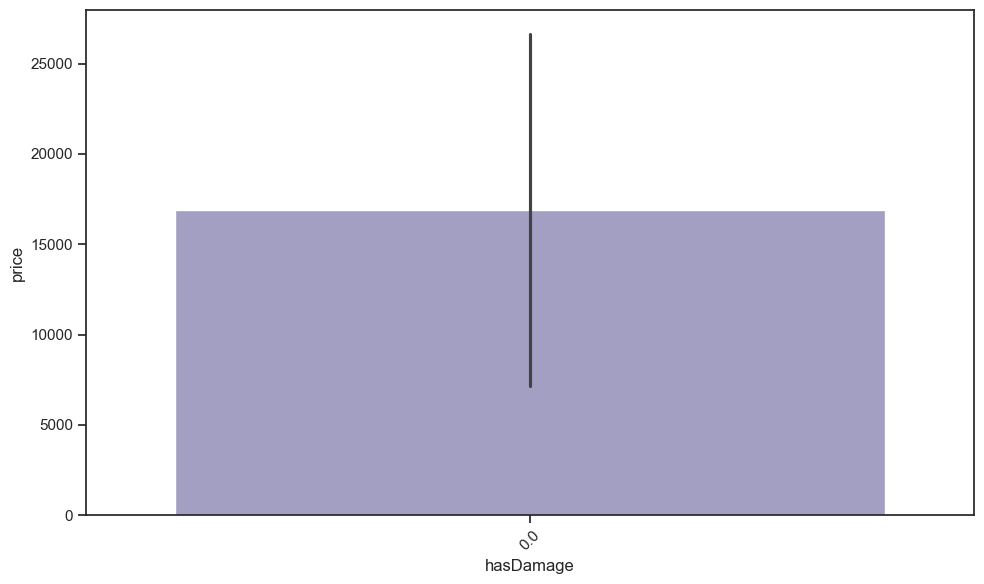

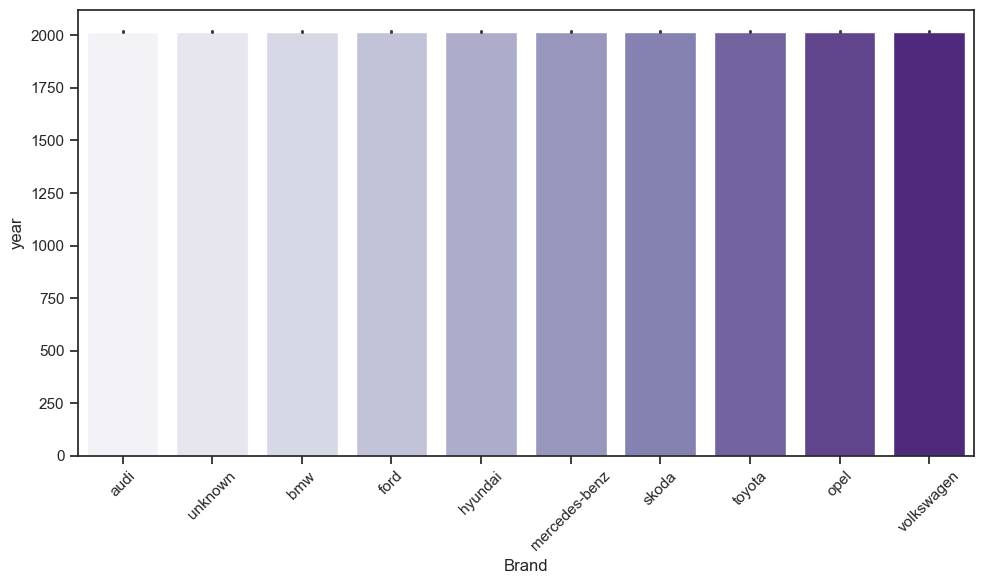

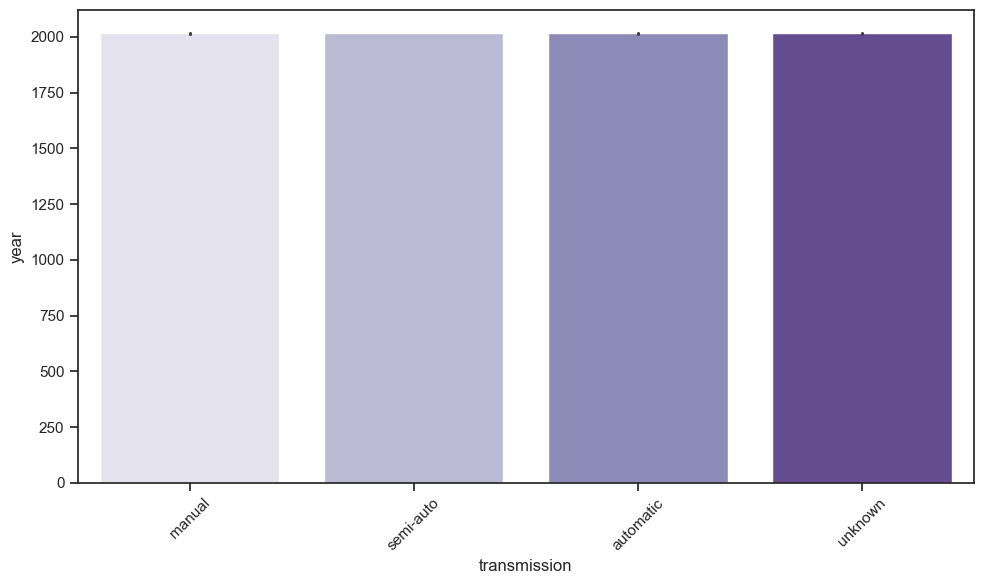

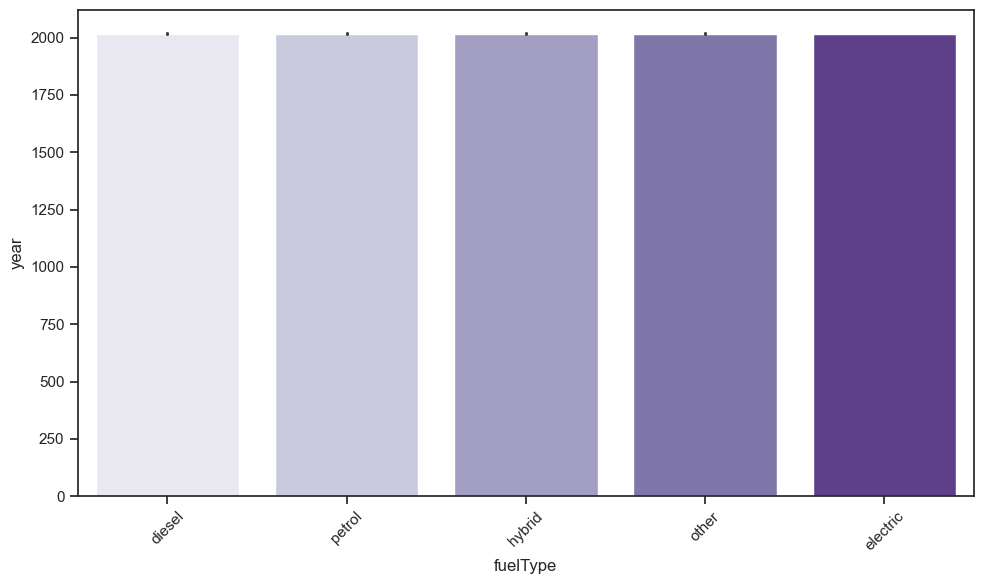

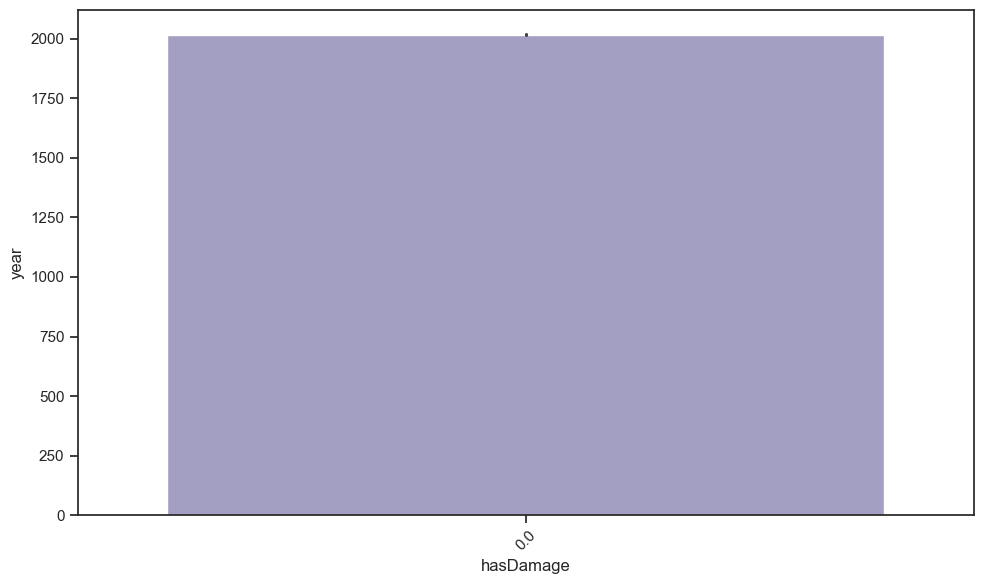

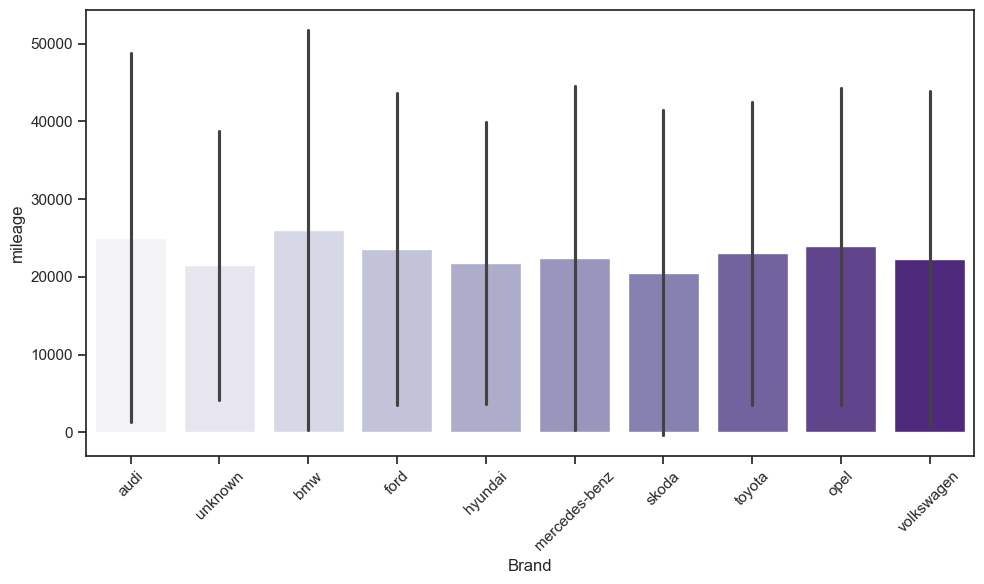

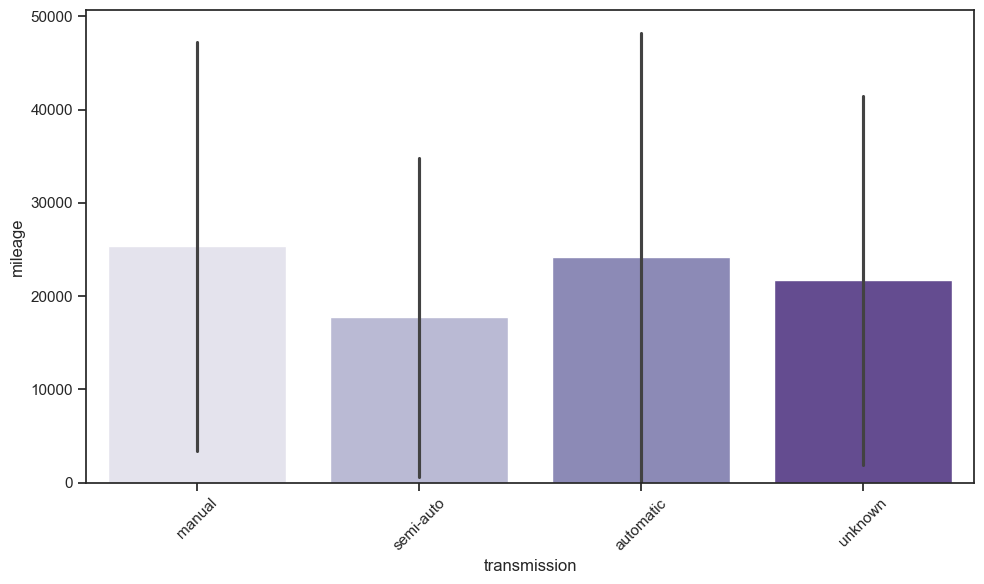

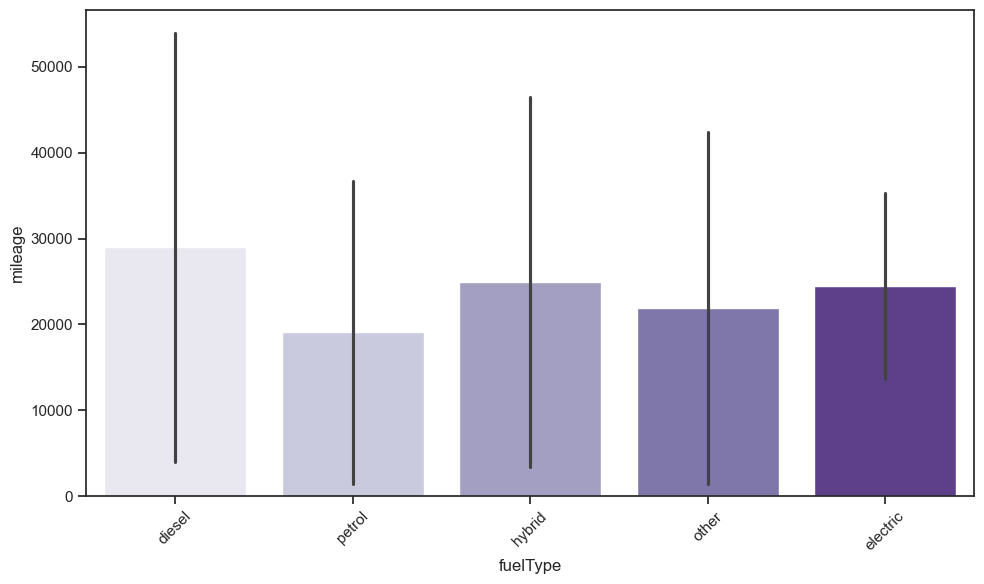

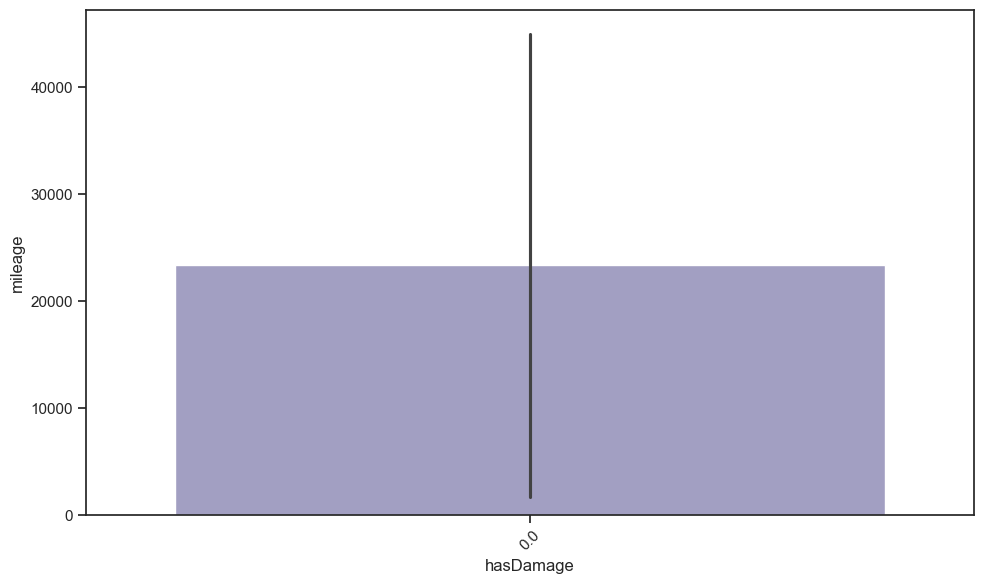

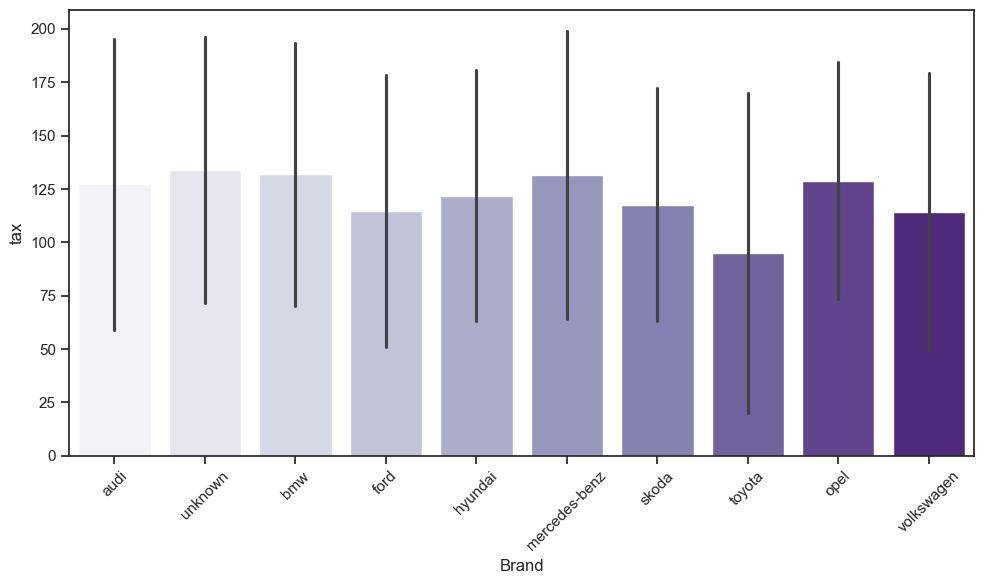

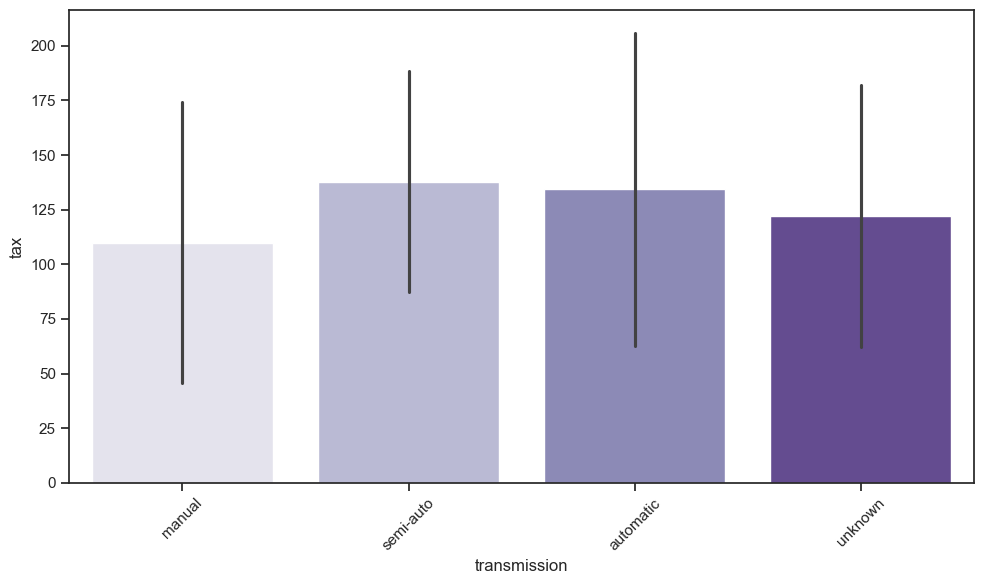

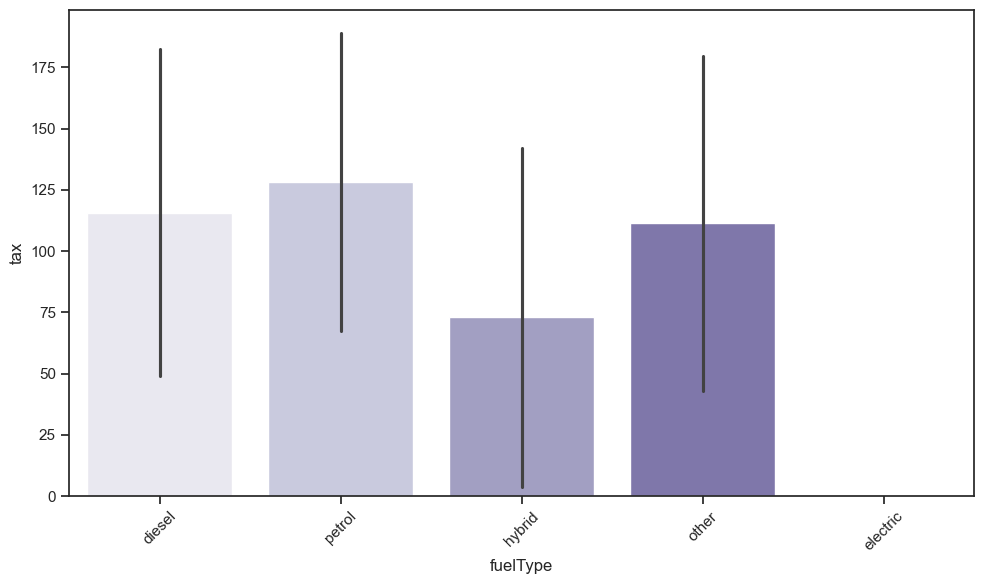

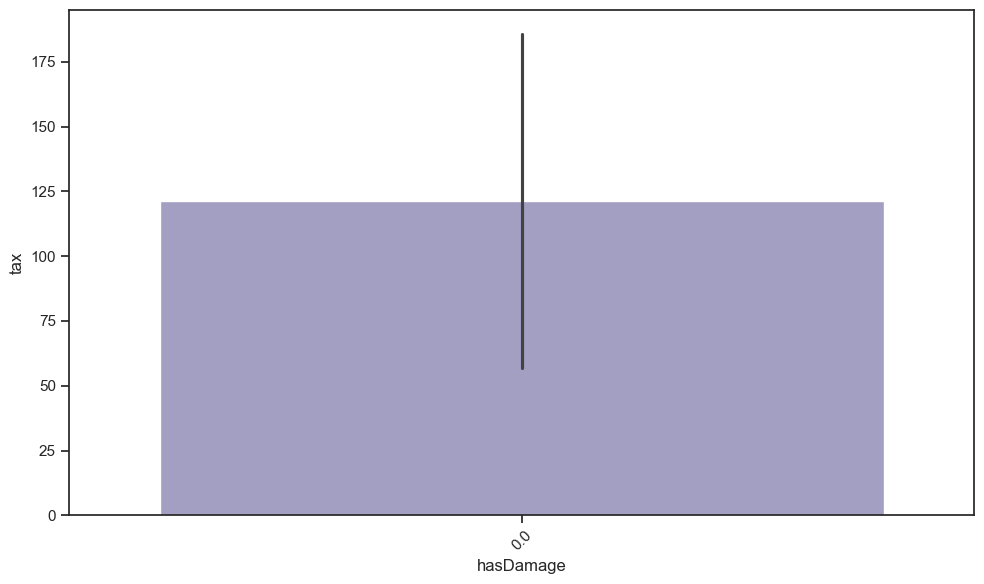

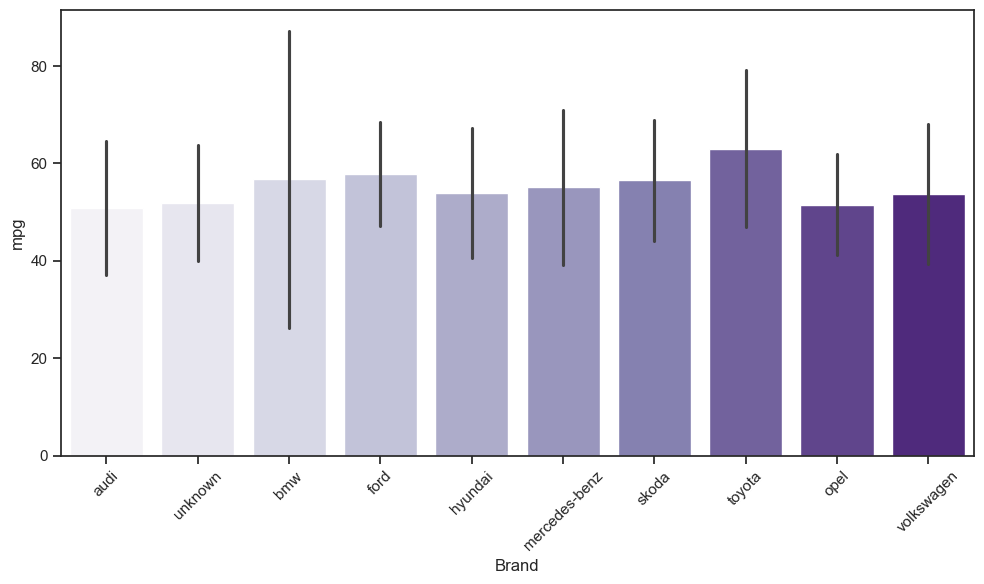

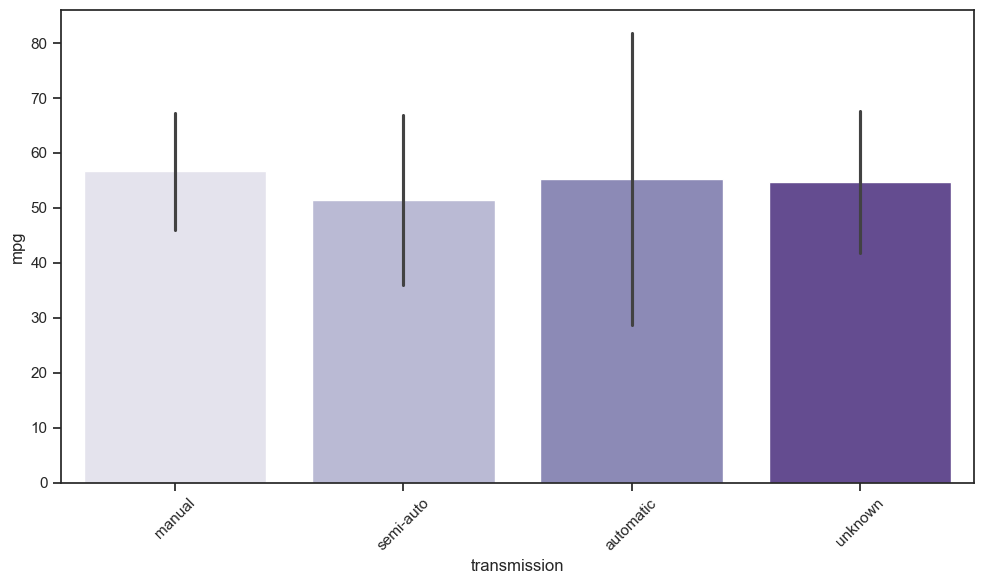

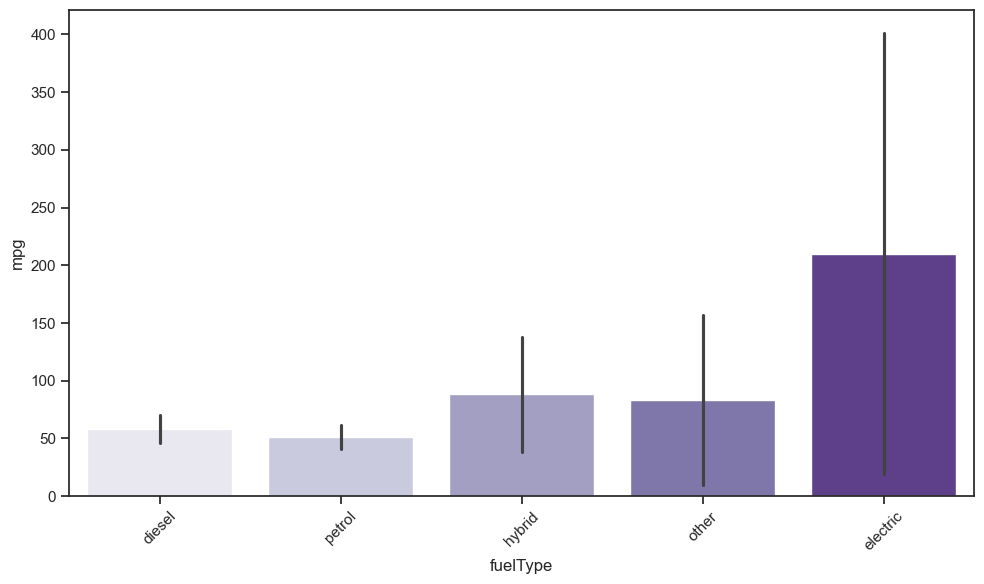

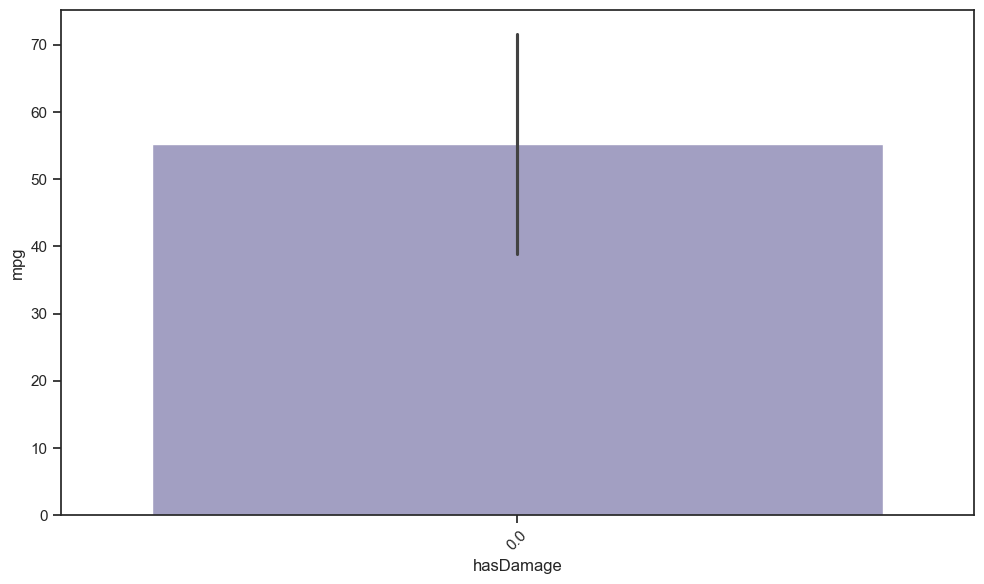

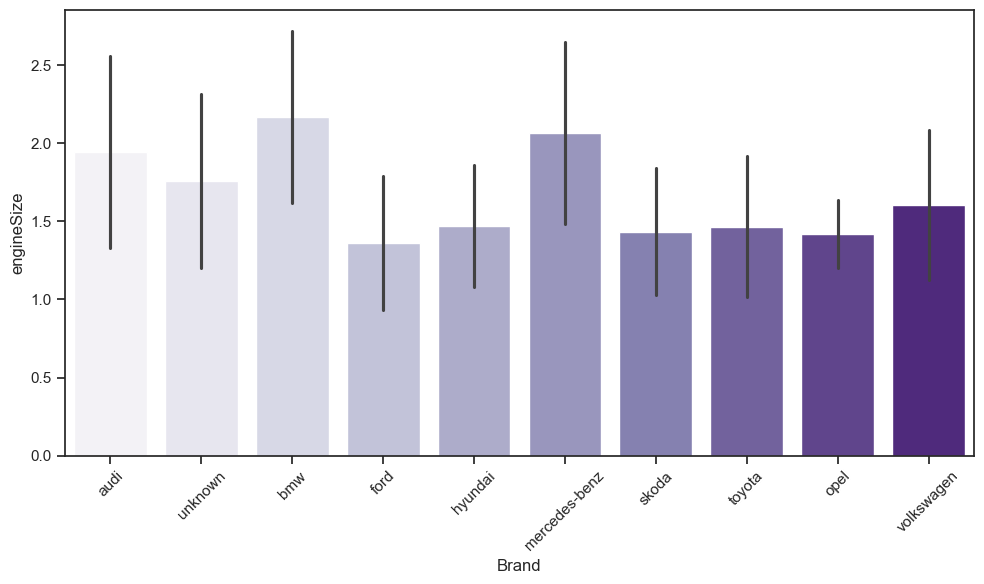

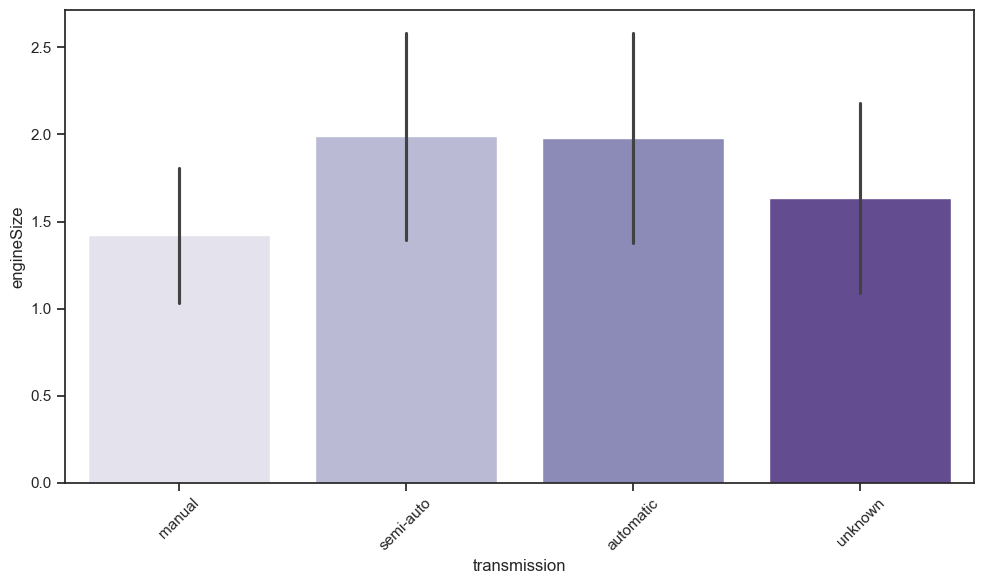

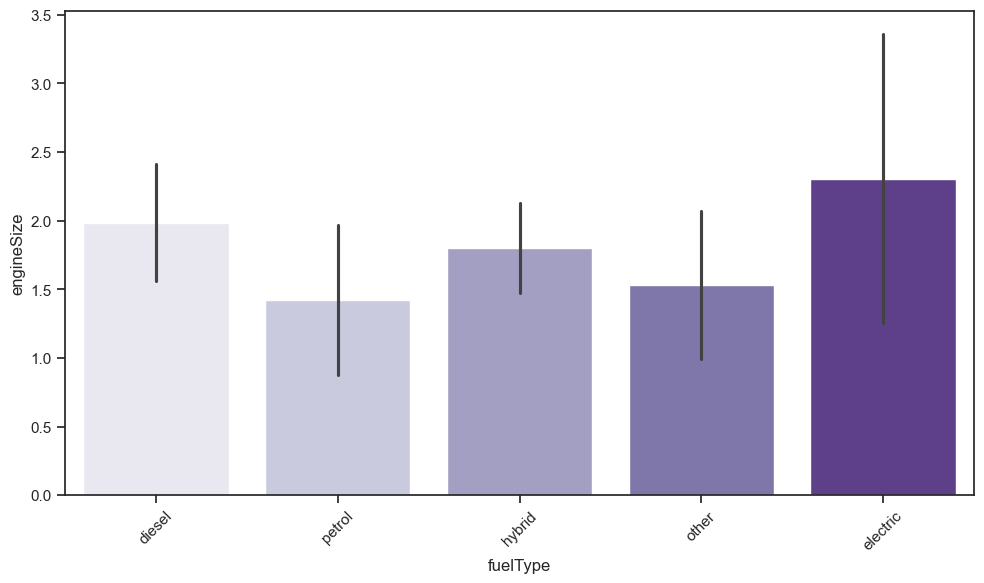

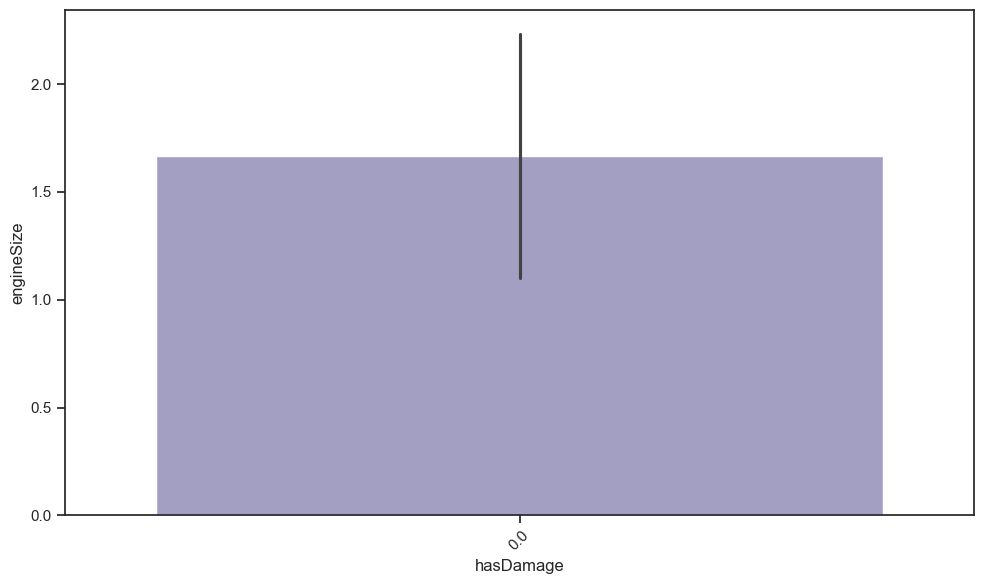

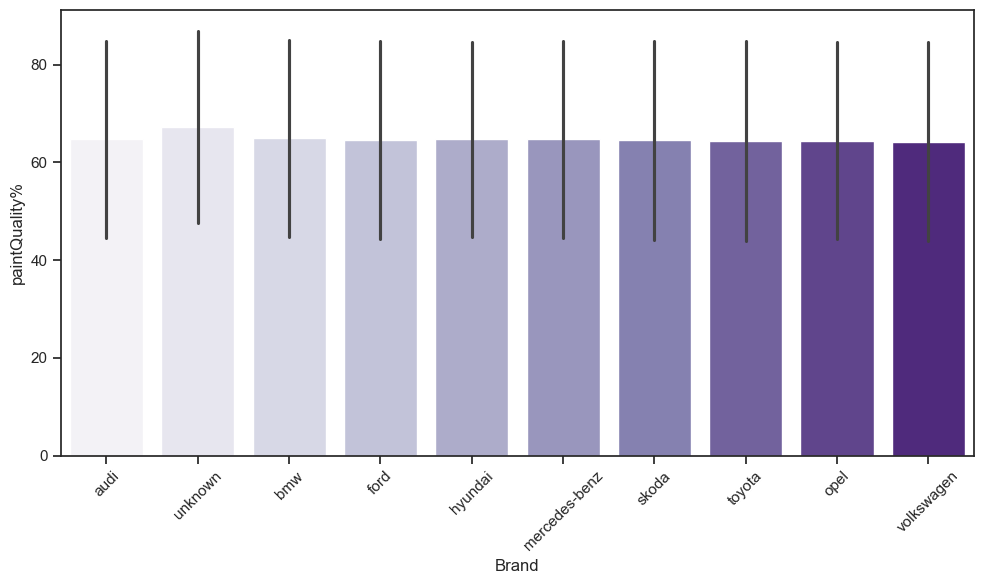

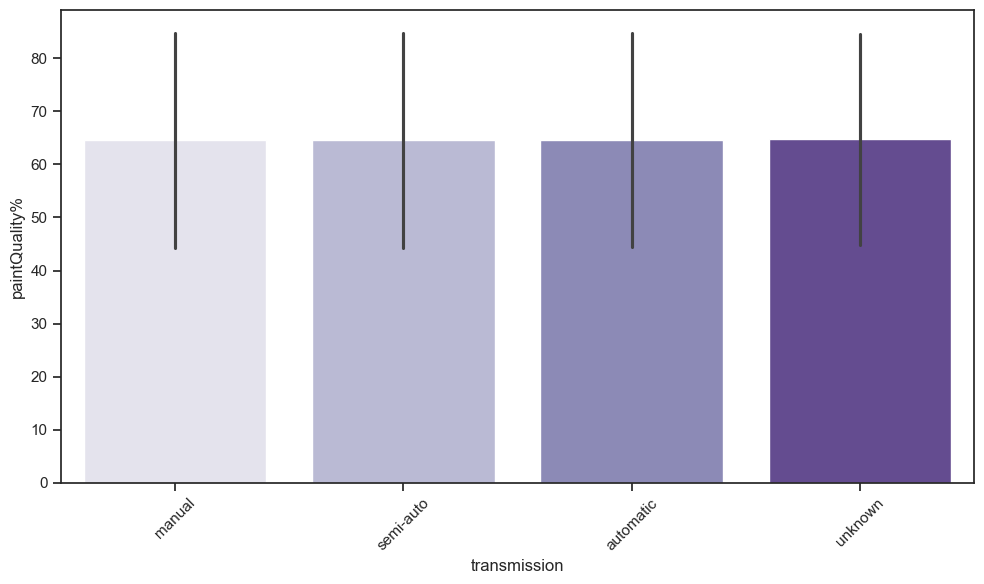

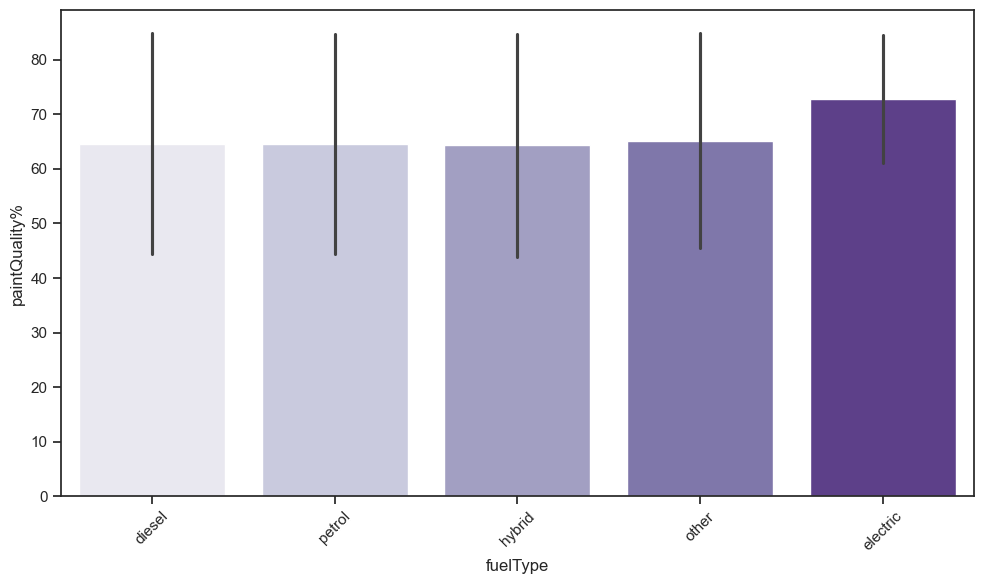

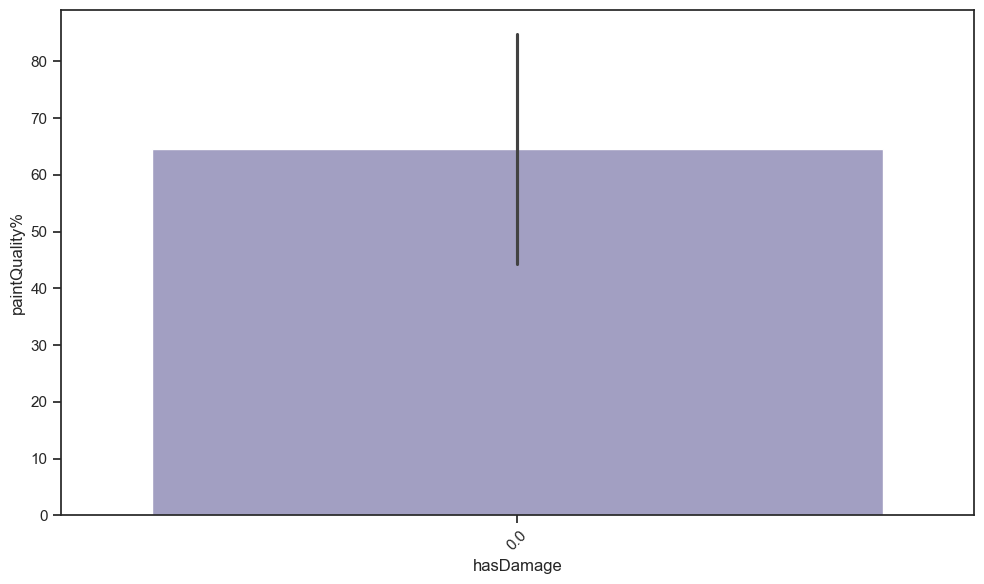

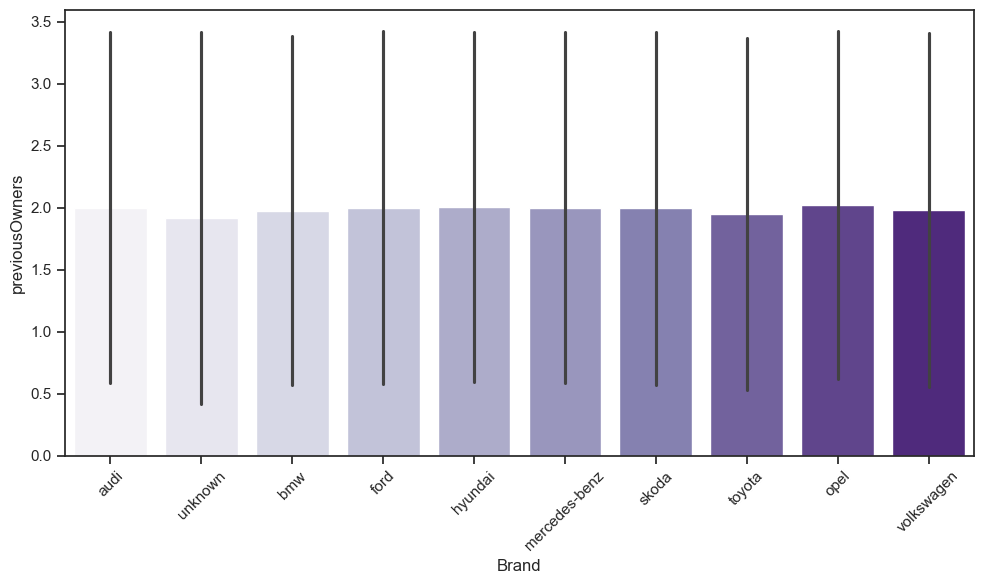

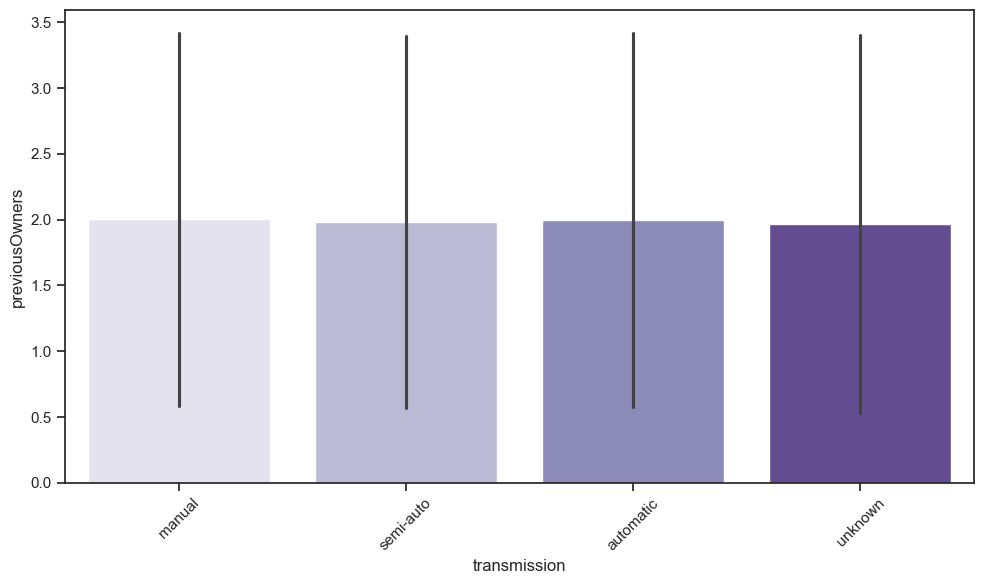

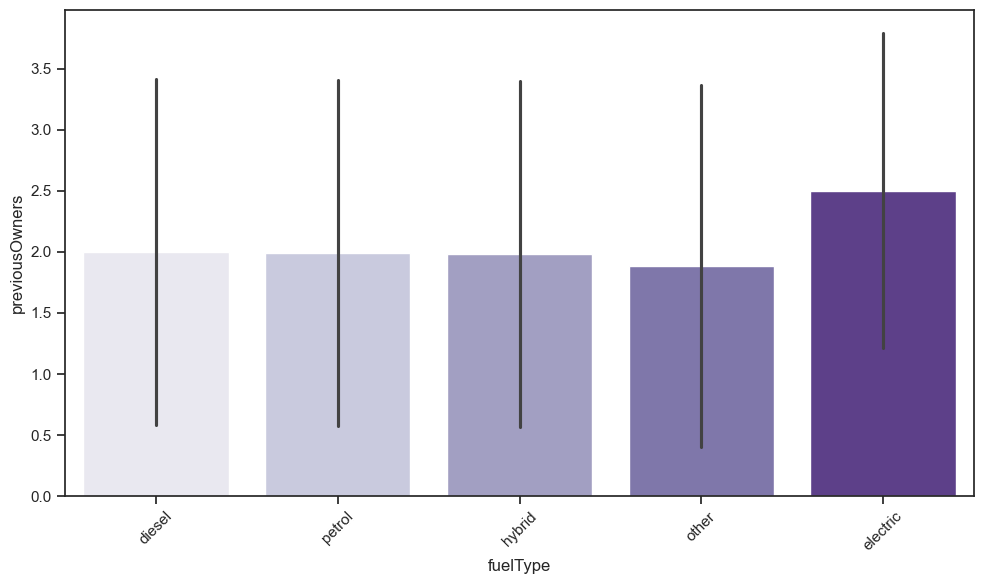

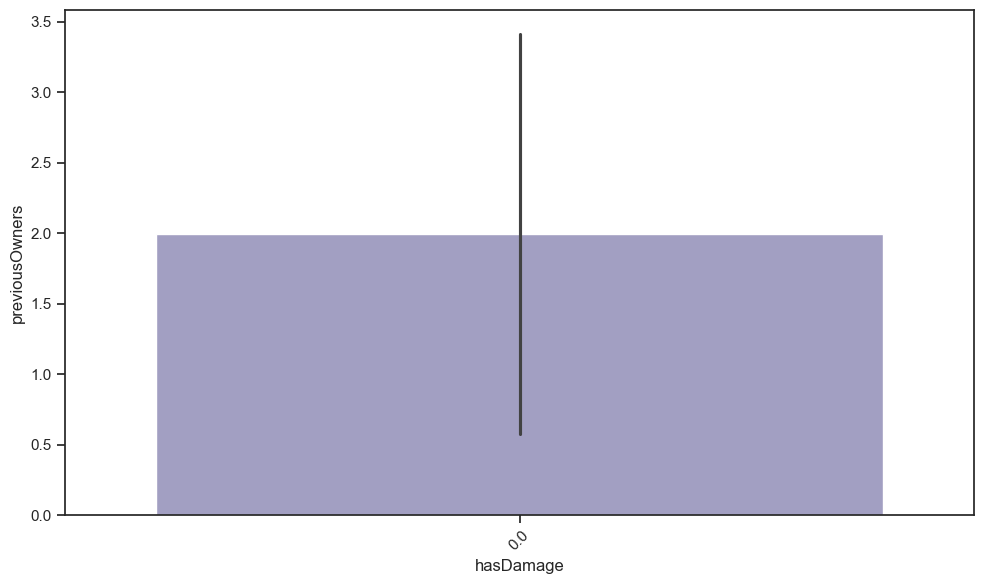

In [913]:
for column in metric_features:
    for x in [f for f in non_metric_features if f != 'model']:
        comparative_barplot(train, x, column)

# 3. Data cleaning and Preprocessing

## 3.1 Duplicates

In [914]:
train.duplicated().sum()

np.int64(7)

In [915]:
train[train.duplicated(keep=False)]

Brand    model    year  price transmission  mileage fuelType  \
carID                                                                         
15152           ford    focus  2018.0  13500       manual  11382.0   petrol   
21404           ford    focus  2018.0  13500       manual  11382.0   petrol   
21775           ford    focus  2019.0  19500       manual   3000.0   diesel   
23477           ford    focus  2017.0  14000    automatic   9137.0   petrol   
25766           ford    focus  2017.0  14000    automatic   9137.0   petrol   
28593           ford    focus  2019.0  19500       manual   3000.0   diesel   
33774        hyundai      i10  2017.0   7500       manual      NaN   petrol   
33890        hyundai    ioniq  2019.0  23991    automatic   5500.0   hybrid   
34128        hyundai      i10  2017.0   7500       manual      NaN   petrol   
34301        hyundai    ioniq  2019.0  23991    automatic   5500.0   hybrid   
37638  mercedes-benz  c class  2014.0  11750    semi-auto  77043.0   diesel   
42198  mercedes-benz  c class  2014.0  11750    semi-auto  77043.0   diesel   
58836           opel    astra  2019.0  14775       manual     10.0   diesel   
59143           opel    astra  2019.0  14775       manual     10.0   diesel   

         tax   mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                                     
15152    NaN   NaN         1.0           57.0             4.0        0.0  
21404    NaN   NaN         1.0           57.0             4.0        0.0  
21775    NaN   NaN         1.5           91.0             4.0        0.0  
23477    NaN   NaN         1.0           48.0             4.0        0.0  
25766    NaN   NaN         1.0           48.0             4.0        0.0  
28593    NaN   NaN         1.5           91.0             4.0        0.0  
33774  145.0  57.7         1.2           32.0             4.0        0.0  
33890  135.0  78.5         1.6           39.0             3.0        0.0  
34128  145.0  57.7         1.2           32.0             4.0        0.0  
34301  135.0  78.5         1.6           39.0             3.0        0.0  
37638    NaN   NaN         2.1           47.0             2.0        0.0  
42198    NaN   NaN         2.1           47.0             2.0        0.0  
58836  145.0  58.9         1.6           76.0             4.0        0.0  
59143  145.0  58.9         1.6           76.0             4.0        0.0

In [916]:
train = train.drop_duplicates(subset=cols, keep='first')

## 3.2 Feature Engeneering

### 3.2.1 Feature Creation

Creating "carAge"

In [917]:
train['carAge'] = 2025 - train['year']

test['carAge'] = 2025 - test['year']

metric_features.append('carAge')
metric_features

['price',
 'year',
 'mileage',
 'tax',
 'mpg',
 'engineSize',
 'paintQuality%',
 'previousOwners',
 'carAge']

In [918]:
print(f'The number of rows with negative carAge values is: {train.loc[train['carAge'] < (0), ['carAge']].size}')
print(f'The number of rows with non-integer carAge values are: {train.loc[(train['carAge'] != round(train['carAge'])) & (train['carAge'].notna()), ['carAge']].size}')

The number of rows with negative carAge values is: 0
The number of rows with non-integer carAge values are: 0


Since we created a new feature called "carAge" which has the "same" meaning as "year", we will drop year column

In [919]:
train.drop(columns=['year'], inplace=True)

test.drop(columns=['year'], inplace=True)

metric_features.remove('year')
train.sample(10)

Brand         model  price transmission  mileage fuelType  \
carID                                                                      
49088          skoda  yeti outdoor  12995    semi-auto  30000.0   petrol   
72252     volkswagen       t-cross  17490       manual   4082.0   petrol   
50982          skoda         kamiq  21995    automatic     45.0   petrol   
47832          skoda      roomster   2495       manual  97000.0   petrol   
50969          skoda         fabia   6495       manual  27625.0   petrol   
54401         toyota         yaris  12495       manual   5931.0   petrol   
38492  mercedes-benz     gla class  23820    semi-auto   3012.0   petrol   
58697           opel         corsa   7900       manual  29280.0   petrol   
4387            audi            q5  28070    semi-auto  13246.0   diesel   
7652             bmw            x3  19490    semi-auto  43688.0   diesel   

         tax   mpg  engineSize  paintQuality%  previousOwners  hasDamage  \
carID                                                                      
49088  125.0  51.4         1.2           72.0             4.0        0.0   
72252  145.0  48.7         1.0           63.0             2.0        0.0   
50982  145.0  43.5         1.5           89.0             2.0        0.0   
47832  190.0  40.9         1.4           41.0             1.0        0.0   
50969  145.0  57.7         1.0           72.0             3.0        0.0   
54401  145.0  47.9         1.5           31.0             3.0        0.0   
38492  145.0  37.2         1.6           59.0             0.0        0.0   
58697   30.0  57.6         1.0           46.0             2.0        0.0   
4387   145.0  39.2         2.0           78.0             1.0        0.0   
7652   145.0  54.3         2.0           95.0             0.0        0.0   

       carAge  
carID          
49088     9.0  
72252     6.0  
50982     6.0  
47832    16.0  
50969     7.0  
54401     6.0  
38492     6.0  
58697     9.0  
4387      6.0  
7652      9.0

### 3.2.2 Data Type Conversions

In [920]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75966 entries, 0 to 75972
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           75966 non-null  string 
 1   model           75966 non-null  string 
 2   price           75966 non-null  int64  
 3   transmission    74444 non-null  object 
 4   mileage         74135 non-null  float64
 5   fuelType        74455 non-null  object 
 6   tax             67688 non-null  float64
 7   mpg             68008 non-null  float64
 8   engineSize      74186 non-null  float64
 9   paintQuality%   73716 non-null  float64
 10  previousOwners  73682 non-null  float64
 11  hasDamage       74418 non-null  float64
 12  carAge          74475 non-null  float64
dtypes: float64(8), int64(1), object(2), string(2)
memory usage: 8.1+ MB


mileage

In [921]:
train['mileage'].sample(20)

carID
24182     3896.0
65300    64250.0
29426    26159.0
7824     30590.0
47168    37047.0
39768     5088.0
1757       500.0
74363    23169.0
52313    18593.0
30658     8970.0
57842    18400.0
8047      6520.0
57769    16409.0
2433      6500.0
55061    19000.0
32686     9676.0
51013    32419.0
70036    41364.0
59995     1336.0
67846    23103.0
Name: mileage, dtype: float64

In [922]:
train.loc[(train['mileage'].notna()) & (train['mileage'] % 1 != 0), 'mileage']

carID
238       95204.181674
275       95204.181674
341       95204.181674
430       95204.181674
471       95204.181674
499       95204.181674
768       95204.181674
813       95204.181674
973       95204.181674
1198      95204.181674
1208      95204.181674
1371      95204.181674
1586      95204.181674
2208      95204.181674
2448      95204.181674
2527      95204.181674
2642      95204.181674
2752      95204.181674
2795      95204.181674
3035      95204.181674
3169      95204.181674
3284      95204.181674
3365      95204.181674
3716      95204.181674
3948      95204.181674
4307      95204.181674
4521      95204.181674
4981      95204.181674
5099      95204.181674
5505      95204.181674
6014      95204.181674
6060      95204.181674
6263      95204.181674
6801      95204.181674
6983      95204.181674
7347      95204.181674
7831     101153.348285
7920     101153.348285
8073     101153.348285
8290     101153.348285
8349     101153.348285
8362     101153.348285
8690     101153.348285
8997 

In [923]:
((train['mileage'].notna()) & (train['mileage'] % 1 != 0)).sum()

np.int64(386)

Since the majority of the values aren't floats, we will convert them to integer

tax

In [924]:
train['tax'].sample(20)

carID
42894    145.0
57029    145.0
49117    150.0
47532    145.0
25274    145.0
50506    125.0
56826     20.0
58609    145.0
30456    145.0
23047    145.0
20335      NaN
63983    165.0
7123     125.0
26108      NaN
16519      NaN
6581      30.0
24557    145.0
22951    125.0
3696     145.0
59499    145.0
Name: tax, dtype: float64

In [925]:
train.loc[(train['tax'].notna()) & (train['tax'] % 1 != 0), 'tax']

carID
174      327.915778
298      327.915778
509      327.915778
870      327.915778
1008     327.915778
1206     327.915778
1292     327.915778
2134     327.915778
2183     327.915778
2714     327.915778
3243     327.915778
3292     327.915778
3370     327.915778
3448     327.915778
3568     327.915778
3640     327.915778
4001     327.915778
4053     327.915778
4242     327.915778
4289     327.915778
4513     327.915778
4667     327.915778
5008     327.915778
5644     327.915778
5970     327.915778
5971     327.915778
6096     327.915778
6240     327.915778
6256     327.915778
6260     327.915778
6577     327.915778
6955     327.915778
7044     327.915778
7288     327.915778
7604     316.487189
7748     316.487189
8063     316.487189
8161     316.487189
9227     316.487189
9304     316.487189
9474     316.487189
9733     316.487189
9810     316.487189
9916     316.487189
10000    316.487189
10253    316.487189
10276    316.487189
10518    316.487189
10578    316.487189
11266    316.4

In [926]:
((train['tax'].notna()) & (train['tax'] % 1 != 0)).sum()

np.int64(381)

Since the majority of the values aren't floats, we will convert them to integer

mpg

In [927]:
train['mpg'].sample(20)

carID
43646    46.3
42137    55.4
70970    50.4
26528    65.7
44529    57.7
22031    57.7
4404     32.8
58392    44.1
7294     56.5
48355    60.1
69837    44.1
48283    67.3
26762     NaN
45588    64.2
22348     NaN
5528     56.5
73942    74.3
68170    48.7
20403    76.4
13681    65.7
Name: mpg, dtype: float64

In [928]:
train.loc[(train['mpg'].notna()) & (train['mpg'] % 1 != 0), 'mpg']

carID
0        83.1
1        55.4
2        53.3
3        51.4
4        47.9
         ... 
75967    40.9
75968    53.3
75969    32.8
75970    43.5
75971    49.6
Name: mpg, Length: 66367, dtype: float64

We should leave it as a float

engineSize

In [929]:
train['engineSize'].sample(20)

carID
51819    1.8
71152    2.0
66040    1.4
59360    1.0
75556    1.0
12554    2.0
34713    2.0
102      1.6
11574    2.0
73407    1.2
10918    3.0
65218    1.4
14650    1.5
45916    2.0
52710    1.8
25536    1.0
5082     NaN
55271    1.0
56129    1.6
28986    1.0
Name: engineSize, dtype: float64

In [930]:
train.loc[(train['engineSize'].notna()) & (train['engineSize'] % 1 != 0), 'engineSize']

carID
0        1.6
2        1.4
3        1.4
7        1.8
10       1.4
        ... 
75963    1.5
75964    1.6
75968    1.4
75970    1.5
75972    1.6
Name: engineSize, Length: 36328, dtype: float64

We should leave it as a float

paintQuality%

In [931]:
train['paintQuality%'].sample(20)

carID
30334    79.0
40606    64.0
45227    43.0
7843     74.0
63683    59.0
19446    40.0
6859     31.0
37438    73.0
16355    47.0
6232     38.0
17197    72.0
9075     32.0
17507    79.0
64663    68.0
1056     62.0
45516    36.0
40777    35.0
9814     60.0
33810    60.0
37960    83.0
Name: paintQuality%, dtype: float64

In [932]:
train.loc[(train['paintQuality%'].notna()) & (train['paintQuality%'] % 1 != 0), 'paintQuality%']

Series([], Name: paintQuality%, dtype: float64)

Since there are no paintQuality% values whith decimal places, let's convert it into integer

previousOwners  

In [933]:
train['previousOwners'].sample(20)

carID
26777    4.0
1874     0.0
492      2.0
41359    4.0
1232     3.0
6909     2.0
2236     1.0
9050     1.0
54132    4.0
7038     4.0
50435    3.0
9812     3.0
65863    1.0
14271    0.0
3694     0.0
49851    4.0
43498    NaN
41100    3.0
24443    0.0
40210    2.0
Name: previousOwners, dtype: float64

In [934]:
train.loc[(train['previousOwners'].notna()) & (train['previousOwners'] % 1 != 0), 'previousOwners']

Series([], Name: previousOwners, dtype: float64)

Since there are no previousOwners values whith decimal places, let's convert it into integer

carAge

In [935]:
train['carAge'].sample(20)

carID
43867     9.0
54402     7.0
30747    14.0
54603     6.0
59956     9.0
46544     8.0
35424     7.0
15151     7.0
34565     6.0
49010     6.0
20097     8.0
32939     9.0
69098     8.0
5705      9.0
63091     6.0
63738    10.0
23807     7.0
25027     2.0
35520    10.0
28953     8.0
Name: carAge, dtype: float64

In [936]:
train.loc[(train['carAge'].notna()) & (train['carAge'] % 1 != 0), 'carAge']

Series([], Name: carAge, dtype: float64)

Since there are no carAge values whith decimal places, let's convert it into integer

In [937]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75966 entries, 0 to 75972
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           75966 non-null  string 
 1   model           75966 non-null  string 
 2   price           75966 non-null  int64  
 3   transmission    74444 non-null  object 
 4   mileage         74135 non-null  float64
 5   fuelType        74455 non-null  object 
 6   tax             67688 non-null  float64
 7   mpg             68008 non-null  float64
 8   engineSize      74186 non-null  float64
 9   paintQuality%   73716 non-null  float64
 10  previousOwners  73682 non-null  float64
 11  hasDamage       74418 non-null  float64
 12  carAge          74475 non-null  float64
dtypes: float64(8), int64(1), object(2), string(2)
memory usage: 8.1+ MB


In [938]:
def data_type_convert(input_df):

    #Data type conversions
    #mileage
    input_df['mileage'] = input_df['mileage'].round().astype('Int64')
    #tax
    input_df['tax'] = input_df['tax'].round().astype('Int64')
    #paintQuality%
    input_df['paintQuality%'] = input_df['paintQuality%'].round().astype('Int64')
    #previousOwners
    input_df['previousOwners'] = input_df['previousOwners'].round().astype('Int64')
    #carAge
    input_df['carAge'] = input_df['carAge'].round().astype('Int64')

    return input_df

In [939]:
train = data_type_convert(train)

test = data_type_convert(test)

Now everything is in the right Dtype

# -------------

# Train-Test Split

Let's deal with the missing vales (nan/unknown/other) on transmission and fuelType

In [940]:
train['Brand'].isna().sum()

np.int64(0)

In [941]:
train['model'].isna().sum()

np.int64(0)

In [942]:
train['transmission'].isna().sum()

np.int64(1522)

In [943]:
train['fuelType'].isna().sum()

np.int64(1511)

In [944]:
train[['transmission', 'fuelType', 'Brand', 'model']].nunique()


transmission      4
fuelType          5
Brand            10
model           204
dtype: int64

transmission

In [945]:
len(train.loc[train['transmission'] == 'unknown'])

741

In [946]:
train['transmission'].isna().sum()

np.int64(1522)

We should consider those values as an error

In [947]:
def transmission_unkown_nan_fix(input_df):
    
    # 1) Per-model most frequent transmission (exclude 'unknown' and NaN)
    valid_tx = train['transmission'].notna() & (train['transmission'] != 'unknown')
    tx_mode_by_model = (
        train.loc[valid_tx]
            .groupby('model')['transmission']
            .agg(lambda s: s.mode().iat[0] if not s.mode().empty else np.nan)
    )

    # 2) Replace 'unknown' OR NaN with the per-model mode
    tx_mask = input_df['transmission'].isna() | (input_df['transmission'] == 'unknown')
    input_df.loc[tx_mask, 'transmission'] = input_df.loc[tx_mask, 'model'].map(tx_mode_by_model)

    # 3) Global mode fallback (exclude 'unknown' and NaN)
    tx_global_mode = train.loc[valid_tx, 'transmission'].mode().iat[0]

    # 4) Any leftovers -> fill with global mode (covers unmapped models)
    input_df['transmission'] = (
        input_df['transmission']
            .fillna(tx_global_mode)               
            .replace('unknown', tx_global_mode)   )
    
    return input_df 

In [948]:
train = transmission_unkown_nan_fix(train)

test = transmission_unkown_nan_fix(test)

In [949]:
train['transmission'].unique()

array(['manual', 'semi-auto', 'automatic'], dtype=object)

fuelType

In [950]:
len(train.loc[train['fuelType'] == 'other'])

167

In [951]:
train['fuelType'].isna().sum()

np.int64(1511)

In [952]:
def fuelType_other_nan_fix(input_df):

    # 1) Get per-model most frequent fuel type (excluding 'other' and NaN)
    valid_ft = train['fuelType'].notna() & (train['fuelType'] != 'other')
    ft_mode_by_model = (
        train.loc[valid_ft]
             .groupby('model')['fuelType']
             .agg(lambda s: s.mode().iat[0] if not s.mode().empty else np.nan)
    )

    # 2) Replace 'other' or NaN with the per-model mode
    ft_mask = input_df['fuelType'].isna() | (input_df['fuelType'] == 'other')
    input_df.loc[ft_mask, 'fuelType'] = input_df.loc[ft_mask, 'model'].map(ft_mode_by_model)

    # 3) Global mode fallback (in case some models have no valid entries)
    ft_global_mode = train.loc[valid_ft, 'fuelType'].mode().iat[0]

    # 4) Fill remaining missing or 'other' with global mode
    input_df['fuelType'] = (
        input_df['fuelType']
        .fillna(ft_global_mode)
        .replace('other', ft_global_mode))
    
    return input_df

In [953]:
train = fuelType_other_nan_fix(train)

test = fuelType_other_nan_fix(test)

In [954]:
test['fuelType'].unique()

array(['petrol', 'diesel', 'hybrid', 'electric'], dtype=object)

### Encoding

**We can apply OHE to the entire dataset before splitting because it's deterministic - it just creates binary columns based on the categories present in the data. It doesn't learn statistics like means, frequencies, or anything from the target. If we were using CountEncoder or TargetEncoder, we'd need to fit only on training data because those encoders learn from the target variable or value frequencies, which would leak information from validation/test sets.**

In [955]:
non_metric_features

['Brand', 'model', 'transmission', 'fuelType', 'hasDamage']

In [956]:
train['model'].nunique()

204

We will only use OHE for Brand, transmission and fueltype. Since model has a lot more unique values, we will use

In [957]:
categorical_cols = non_metric_features.copy()

In [958]:
categorical_cols.remove('model')

In [959]:
categorical_cols.remove('hasDamage')

In [960]:
categorical_cols

['Brand', 'transmission', 'fuelType']

In [961]:
non_metric_features

['Brand', 'model', 'transmission', 'fuelType', 'hasDamage']

In [962]:
def OneHotEncoder_catcols(input_df):
    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

    # OHE
    encoded_array = ohe.fit_transform(input_df[categorical_cols])
    encoded_cols  = ohe.get_feature_names_out(categorical_cols)
    encoded_df    = pd.DataFrame(encoded_array, columns=encoded_cols, index=input_df.index)

    # choose metrics based on existing or not column price
    has_price = 'price' in input_df.columns
    metrics   = metric_features if has_price else [c for c in metric_features if c != 'price']

    parts = [input_df[metrics], encoded_df]
    for extra in ['model', 'hasDamage']:
        if extra in input_df.columns:
            parts.append(input_df[[extra]])

    input_df_encoded = pd.concat(parts, axis=1)
    return input_df_encoded

In [963]:
test

carID          Brand        model transmission  mileage fuelType  tax  \
0       89856        hyundai          i30    automatic    30700   petrol  205   
1      106581     volkswagen       tiguan    semi-auto     <NA>   petrol  150   
2       80886            bmw     2 series    automatic    36792   petrol  125   
3      100174           opel  grandland x       manual     5533   petrol  145   
4       81376            bmw     1 series    semi-auto     9058   diesel  150   
...       ...            ...          ...          ...      ...      ...  ...   
32562  105775     volkswagen       tiguan       manual    27575   petrol  145   
32563   81363            bmw           x2    automatic     1980   petrol  145   
32564   76833           audi           q5    semi-auto     8297   diesel  145   
32565   91768  mercedes-benz      a class       manual     <NA>   petrol  145   
32566   99627         toyota        yaris    automatic    11071   petrol   30   

        mpg  engineSize  paintQuality%  previousOwners  hasDamage  carAge  
0      41.5         1.6             61               3        0.0       2  
1      38.2         2.0             60               2        0.0       8  
2      51.4         1.5             94               2        0.0       9  
3      44.1         1.2             77               1        0.0       6  
4      51.4         2.0             45               4        0.0       6  
...     ...         ...            ...             ...        ...     ...  
32562  46.3         1.4             94               1        0.0       8  
32563  34.0         2.0             39               3        0.0       5  
32564  38.2         2.0             88               4        0.0       6  
32565  28.5         1.3             81               1        0.0       6  
32566  58.0         1.3             98               4        0.0       8  

[32567 rows x 13 columns]

In [964]:
train_encoded = OneHotEncoder_catcols(train)

test_encoded = OneHotEncoder_catcols(test)

In [965]:
test_encoded['carID'] = test['carID'].values

In [966]:
train_encoded.sample(10)

price  mileage   tax   mpg  engineSize  paintQuality%  previousOwners  \
carID                                                                          
28468  18000    30591  <NA>   NaN         2.0             31               2   
40959  16820     <NA>   125  58.9         2.1             32               2   
23312   9420    40792     0  57.7         1.0           <NA>               1   
21593  21000       52  <NA>   NaN         1.0             97               3   
67656  10390    23000    20  60.1         1.2             82               3   
30427  11300     7834   145  74.3         1.5             79               1   
21374   6700    47000     0  65.7         1.0             53               4   
19967   9189    12444     0   NaN         1.5             49               2   
16186   8999    32332   125  54.3         1.2             75               0   
10195   5290    80000   165  44.8         2.0             82               2   

       carAge  Brand_audi  Brand_bmw  ...  Brand_volkswagen  \
carID                                 ...                     
28468       8         0.0        0.0  ...               0.0   
40959       9         0.0        0.0  ...               0.0   
23312       8         0.0        0.0  ...               0.0   
21593       5         0.0        0.0  ...               0.0   
67656       9         0.0        0.0  ...               1.0   
30427       7         0.0        0.0  ...               0.0   
21374      11         0.0        0.0  ...               0.0   
19967       9         0.0        0.0  ...               0.0   
16186       9         0.0        0.0  ...               0.0   
10195      15         0.0        1.0  ...               0.0   

       transmission_automatic  transmission_manual  transmission_semi-auto  \
carID                                                                        
28468                     0.0                  0.0                     1.0   
40959                     0.0                  0.0                     1.0   
23312                     0.0                  0.0                     1.0   
21593                     0.0                  1.0                     0.0   
67656                     0.0                  0.0                     1.0   
30427                     0.0                  1.0                     0.0   
21374                     0.0                  1.0                     0.0   
19967                     0.0                  1.0                     0.0   
16186                     0.0                  1.0                     0.0   
10195                     0.0                  1.0                     0.0   

       fuelType_diesel  fuelType_electric  fuelType_hybrid  fuelType_petrol  \
carID                                                                         
28468              1.0                0.0              0.0              0.0   
40959              1.0                0.0              0.0              0.0   
23312              0.0                0.0              0.0              1.0   
21593              0.0                0.0              0.0              1.0   
67656              0.0                0.0              0.0              1.0   
30427              1.0                0.0              0.0              0.0   
21374              0.0                0.0              0.0              1.0   
19967              1.0                0.0              0.0              0.0   
16186              0.0                0.0              0.0              1.0   
10195              0.0                0.0              0.0              1.0   

          model  hasDamage  
carID                       
28468     focus        0.0  
40959   e class        0.0  
23312    fiesta        0.0  
21593     focus        0.0  
67656      polo        0.0  
30427     b-max        0.0  
21374    fiesta        0.0  
19967     b-max        0.0  
16186    fiesta        0.0  
10195  3 series        0.0  

[10 rows x 27 columns]

In [967]:
train_encoded.columns

Index(['price', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners', 'carAge', 'Brand_audi', 'Brand_bmw', 'Brand_ford',
       'Brand_hyundai', 'Brand_mercedes-benz', 'Brand_opel', 'Brand_skoda',
       'Brand_toyota', 'Brand_unknown', 'Brand_volkswagen',
       'transmission_automatic', 'transmission_manual',
       'transmission_semi-auto', 'fuelType_diesel', 'fuelType_electric',
       'fuelType_hybrid', 'fuelType_petrol', 'model', 'hasDamage'],
      dtype='object')

## **Holdout Method**

In [968]:
# Split the DataFrame into features (X) and target variable (y)
X = train_encoded.drop('price', axis=1) 
y = train_encoded['price']  

In [969]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0) 

## 1.Encoding

Categorical Variables = "Brand","model","transmission","fuelType", but since we have already encoded "Brand", "transmission" and "fueltype", only "model" lefts

***model***

In [970]:
X_train['model'].value_counts()

model
focus                    5549
c class                  4212
fiesta                   3613
golf                     2650
corsa                    1868
polo                     1781
astra                    1501
a class                  1385
3 series                 1377
unknown                  1208
kuga                     1190
yaris                    1145
mokka x                  1130
aygo                     1104
1 series                 1102
e class                  1063
a3                       1023
tiguan                    983
fabia                     857
octavia                   813
q3                        788
a4                        744
a1                        727
tucson                    722
2 series                  672
ecosport                  647
insignia                  585
i10                       579
5 series                  568
4 series                  529
glc class                 526
passat                    513
up                        488
a5  

In [971]:
# Compute mean engineSize per model
tmp = X_train[['model', 'engineSize']].copy()
model_mean_engine = tmp.groupby('model')['engineSize'].mean()

# Compute global mean (fallback for unseen models)
global_mean_engine = X_train['engineSize'].mean()

def encoding_model(input_df):

    # Apply encoding
    input_df['model_te'] = input_df['model'].map(model_mean_engine).fillna(global_mean_engine)

    # Drop the original 'model' column to avoid redundancy
    input_df.drop(columns=['model'], inplace=True)

    return input_df


In [972]:
X_train = encoding_model(X_train)

X_val = encoding_model(X_val)

test_encoded = encoding_model(test_encoded)

In [973]:
X_train.sample(10)

mileage   tax   mpg  engineSize  paintQuality%  previousOwners  carAge  \
carID                                                                           
20503    22704   200  44.8         2.0             81               0       9   
56992    13525  <NA>  39.2         1.4             96               2       6   
30832   100000    20  70.6         2.0             32               0       9   
51796     5810   135  74.3         1.8             84               0       7   
16933    13718   145  35.3         1.5             83               3       6   
44304       40   145  65.7         2.0             96               1       6   
35134     9762   145  67.3         1.5             73               0       6   
41353    27993   145  65.7         2.0             31               4       8   
10274    72910    20  68.9         2.0             63               2      11   
12997    27201   145  64.2         2.0             91               3       8   

       Brand_audi  Brand_bmw  Brand_ford  ...  Brand_volkswagen  \
carID                                     ...                     
20503         0.0        0.0         1.0  ...               0.0   
56992         0.0        0.0         0.0  ...               0.0   
30832         0.0        0.0         1.0  ...               0.0   
51796         0.0        0.0         0.0  ...               0.0   
16933         0.0        0.0         1.0  ...               0.0   
44304         0.0        0.0         0.0  ...               0.0   
35134         0.0        0.0         0.0  ...               0.0   
41353         0.0        0.0         0.0  ...               0.0   
10274         0.0        1.0         0.0  ...               0.0   
12997         0.0        1.0         0.0  ...               0.0   

       transmission_automatic  transmission_manual  transmission_semi-auto  \
carID                                                                        
20503                     0.0                  1.0                     0.0   
56992                     0.0                  1.0                     0.0   
30832                     0.0                  1.0                     0.0   
51796                     1.0                  0.0                     0.0   
16933                     0.0                  1.0                     0.0   
44304                     0.0                  0.0                     1.0   
35134                     0.0                  0.0                     1.0   
41353                     0.0                  0.0                     1.0   
10274                     0.0                  1.0                     0.0   
12997                     1.0                  0.0                     0.0   

       fuelType_diesel  fuelType_electric  fuelType_hybrid  fuelType_petrol  \
carID                                                                         
20503              1.0                0.0              0.0              0.0   
56992              0.0                0.0              0.0              1.0   
30832              1.0                0.0              0.0              0.0   
51796              0.0                0.0              1.0              0.0   
16933              0.0                0.0              0.0              1.0   
44304              1.0                0.0              0.0              0.0   
35134              1.0                0.0              0.0              0.0   
41353              1.0                0.0              0.0              0.0   
10274              1.0                0.0              0.0              0.0   
12997              1.0                0.0              0.0              0.0   

       hasDamage  model_te  
carID                       
20503        0.0  2.010256  
56992        0.0  1.444476  
30832        0.0  1.374155  
51796        0.0  1.665406  
16933        0.0  1.819975  
44304        0.0  2.268558  
35134        0.0  1.659220  
41353        0.0  2.268558  
10274        0.0  1.890085  
12997        0.0  1.8668

In [974]:
X_val.sample(10)

mileage  tax   mpg  engineSize  paintQuality%  previousOwners  carAge  \
carID                                                                          
51458    34885    0  85.6         1.8           <NA>               0       8   
46418       50  145  47.1         2.0             88               0       6   
52716    21755  135  74.3         1.8             45               3       7   
15058     7380  145  55.4         1.0             90               2       7   
71577    22981  145  60.1         2.0             44               4       8   
70023    42727   20  58.9         1.0             97               3       8   
58737    12388  145  50.4         1.5             77               3       6   
69044    14708  150  48.7         1.0             76               4       6   
29894    44000  299  50.4         1.2             84               3      14   
75130    66509    0  65.7         1.0             70               4       9   

       Brand_audi  Brand_bmw  Brand_ford  ...  Brand_volkswagen  \
carID                                     ...                     
51458         0.0        0.0         0.0  ...               0.0   
46418         0.0        0.0         0.0  ...               0.0   
52716         0.0        0.0         0.0  ...               0.0   
15058         0.0        0.0         1.0  ...               0.0   
71577         0.0        0.0         0.0  ...               1.0   
70023         0.0        0.0         0.0  ...               1.0   
58737         0.0        0.0         0.0  ...               0.0   
69044         0.0        0.0         0.0  ...               1.0   
29894         0.0        0.0         1.0  ...               0.0   
75130         0.0        0.0         0.0  ...               1.0   

       transmission_automatic  transmission_manual  transmission_semi-auto  \
carID                                                                        
51458                     1.0                  0.0                     0.0   
46418                     0.0                  0.0                     1.0   
52716                     1.0                  0.0                     0.0   
15058                     0.0                  1.0                     0.0   
71577                     0.0                  1.0                     0.0   
70023                     0.0                  1.0                     0.0   
58737                     0.0                  1.0                     0.0   
69044                     0.0                  1.0                     0.0   
29894                     0.0                  1.0                     0.0   
75130                     1.0                  0.0                     0.0   

       fuelType_diesel  fuelType_electric  fuelType_hybrid  fuelType_petrol  \
carID                                                                         
51458              0.0                0.0              1.0              0.0   
46418              0.0                0.0              0.0              1.0   
52716              0.0                0.0              1.0              0.0   
15058              0.0                0.0              0.0              1.0   
71577              1.0                0.0              0.0              0.0   
70023              0.0                0.0              0.0              1.0   
58737              0.0                0.0              0.0              1.0   
69044              0.0                0.0              0.0              1.0   
29894              0.0                0.0              0.0              1.0   
75130              0.0                0.0              0.0              1.0   

       hasDamage  model_te  
carID                       
51458        0.0  1.777402  
46418        0.0  2.636582  
52716        0.0  1.665406  
15058        0.0  1.106611  
71577        0.0  1.672114  
70023        0.0  1.162495  
58737        0.0  1.741489  
69044        0.0  1.162495  
29894        0.0  1.106611  
75130        0.0  1.672114  

[10 ro

## 2. Missing Values

In [975]:
X_train.isna().sum()

mileage                   1455
tax                       6647
mpg                       6400
engineSize                1438
paintQuality%             1794
previousOwners            1826
carAge                    1191
Brand_audi                   0
Brand_bmw                    0
Brand_ford                   0
Brand_hyundai                0
Brand_mercedes-benz          0
Brand_opel                   0
Brand_skoda                  0
Brand_toyota                 0
Brand_unknown                0
Brand_volkswagen             0
transmission_automatic       0
transmission_manual          0
transmission_semi-auto       0
fuelType_diesel              0
fuelType_electric            0
fuelType_hybrid              0
fuelType_petrol              0
hasDamage                 1233
model_te                     0
dtype: int64

### 2.1 Dealing with Missing Values

previousOwners

In [976]:
X_train['previousOwners'] = X_train['previousOwners'].fillna(0)
X_val['previousOwners'] = X_val['previousOwners'].fillna(0)
test_encoded['previousOwners'] = test_encoded['previousOwners'].fillna(0)

In [977]:
X_train['previousOwners'].unique()

<IntegerArray>
[4, 2, 0, 1, 3]
Length: 5, dtype: Int64

hasDamage

In [978]:
X_train['hasDamage']=X_train['hasDamage'].fillna(0)
X_val['hasDamage'] = X_val['hasDamage'].fillna(0)
test_encoded['hasDamage'] = test_encoded['hasDamage'].fillna(0)

In [979]:
X_train['hasDamage'].unique()

array([0.])

engineSize

In [980]:
X_train['engineSize'].unique()

array([1.        , 1.2       , 1.5       , 1.6       , 2.        ,
       2.1       , 1.4       , 1.8       ,        nan, 4.4       ,
       3.        , 1.7       , 1.3       , 2.2       , 0.16286595,
       2.3       , 4.        , 0.7395339 , 0.19146242, 3.72371217,
       0.37112737, 1.1       , 6.2       , 2.5       , 2.61964142,
       2.63120047, 0.30707394, 4.3       , 4.2       , 0.18642488,
       2.06411863, 2.6631132 , 1.9       , 2.9       , 5.5       ,
       2.98579344, 5.        , 0.15452932, 2.4       , 3.82275785,
       2.8       , 5.2       , 3.73923548, 3.2       , 4.7       ,
       0.31340658, 2.78177621, 3.5       , 0.6       , 6.6       ,
       2.7       , 2.6       , 4.5       , 6.        , 3.6       ,
       5.4       ])

In [981]:
# Compute median engineSize per model 
engine_median_by_model = (
    X_train.groupby('model_te')['engineSize']
           .median()
)

global_median_engine = X_train['engineSize'].median() 

def impute_engine_size(df, per_model_median, global_median_engine):
    df['engineSize'] = (
        df['engineSize']
          .fillna(df['model_te'].map(per_model_median))
          .fillna(global_median_engine)
    )
    return df


In [982]:
# Fill NaN values in TRAIN using the per-model median
X_train  = impute_engine_size(X_train,  engine_median_by_model, global_median_engine)
# Fill NaN values in VAL using the same medians learned from TRAIN
X_val = impute_engine_size(X_val, engine_median_by_model, global_median_engine)

test_encoded = impute_engine_size(test_encoded, engine_median_by_model, global_median_engine)

In [983]:
X_train.isna().sum()

mileage                   1455
tax                       6647
mpg                       6400
engineSize                   0
paintQuality%             1794
previousOwners               0
carAge                    1191
Brand_audi                   0
Brand_bmw                    0
Brand_ford                   0
Brand_hyundai                0
Brand_mercedes-benz          0
Brand_opel                   0
Brand_skoda                  0
Brand_toyota                 0
Brand_unknown                0
Brand_volkswagen             0
transmission_automatic       0
transmission_manual          0
transmission_semi-auto       0
fuelType_diesel              0
fuelType_electric            0
fuelType_hybrid              0
fuelType_petrol              0
hasDamage                    0
model_te                     0
dtype: int64

carAge

In [984]:
# Compute median carAge per model (using TRAIN only)
carAge_median_by_model = (
    X_train.groupby('model_te')['carAge']
    .median()
)

global_median_carAge = X_train['carAge'].median() 

def impute_carAge(df, per_model_median, global_median_carAge):
    
    df['carAge'] = df.apply(
    lambda row: carAge_median_by_model[row['model_te']]
    if pd.isna(row['carAge']) and row['model_te'] in carAge_median_by_model
    else row['carAge'],
    axis=1)

    return df


In [985]:
# Fill NaN values in TRAIN using the per-model median
X_train  = impute_carAge(X_train, carAge_median_by_model, global_median_carAge)
# Fill NaN values in VAL using the same medians learned from TRAIN
X_val = impute_carAge(X_val, carAge_median_by_model, global_median_carAge)

test_encoded = impute_carAge(test_encoded, carAge_median_by_model, global_median_carAge)

mileage

In [986]:
mileage_median_by_age = (
    X_train.groupby('carAge')['mileage']
    .median()
)

def impute_mileage(df, per_model_median):

    df['mileage'] = df.apply(
        lambda row: mileage_median_by_age[row['carAge']]
        if pd.isna(row['mileage']) and row['carAge'] in mileage_median_by_age
        else row['mileage'],
        axis=1)
    
    return df


In [987]:
X_train  = impute_mileage(X_train, mileage_median_by_age)
# Fill NaN values in VAL using the same medians learned from TRAIN
X_val = impute_mileage(X_val, mileage_median_by_age)

test_encoded = impute_mileage(test_encoded, mileage_median_by_age)

In [988]:
X_train.isna().sum()

mileage                      0
tax                       6647
mpg                       6400
engineSize                   0
paintQuality%             1794
previousOwners               0
carAge                       0
Brand_audi                   0
Brand_bmw                    0
Brand_ford                   0
Brand_hyundai                0
Brand_mercedes-benz          0
Brand_opel                   0
Brand_skoda                  0
Brand_toyota                 0
Brand_unknown                0
Brand_volkswagen             0
transmission_automatic       0
transmission_manual          0
transmission_semi-auto       0
fuelType_diesel              0
fuelType_electric            0
fuelType_hybrid              0
fuelType_petrol              0
hasDamage                    0
model_te                     0
dtype: int64

paintQuality%

In [989]:
# Compute median paintQuality% per carAge (using TRAIN only)
paintQuality_median_by_age = (
    X_train.groupby('carAge')['paintQuality%']
    .median()
)

def impute_paintQuality(df, per_model_median):

    df['paintQuality%'] = df.apply(
    lambda row: paintQuality_median_by_age[row['carAge']]
    if pd.isna(row['paintQuality%']) and row['carAge'] in paintQuality_median_by_age
    else row['paintQuality%'],
    axis=1)
    
    return df

In [990]:
X_train  = impute_paintQuality(X_train, paintQuality_median_by_age)
# Fill NaN values in VAL using the same medians learned from TRAIN
X_val = impute_paintQuality(X_val, paintQuality_median_by_age)

test_encoded = impute_paintQuality(test_encoded, paintQuality_median_by_age)

In [991]:
X_train.isna().sum()

mileage                      0
tax                       6647
mpg                       6400
engineSize                   0
paintQuality%                0
previousOwners               0
carAge                       0
Brand_audi                   0
Brand_bmw                    0
Brand_ford                   0
Brand_hyundai                0
Brand_mercedes-benz          0
Brand_opel                   0
Brand_skoda                  0
Brand_toyota                 0
Brand_unknown                0
Brand_volkswagen             0
transmission_automatic       0
transmission_manual          0
transmission_semi-auto       0
fuelType_diesel              0
fuelType_electric            0
fuelType_hybrid              0
fuelType_petrol              0
hasDamage                    0
model_te                     0
dtype: int64

tax

In [992]:
# Compute median tax per model (using TRAIN only)
tax_median_by_model = (
    X_train.groupby('model_te')['tax']
    .median()
)

def impute_tax(df, per_model_median):
   
   df['tax'] = df.apply(
    lambda row: tax_median_by_model[row['model_te']]
    if pd.isna(row['tax']) and row['model_te'] in tax_median_by_model
    else row['tax'],
    axis=1)
    
   return df

In [993]:
X_train  = impute_tax(X_train, tax_median_by_model)
# Fill NaN values in VAL using the same medians learned from TRAIN
X_val = impute_tax(X_val, tax_median_by_model)

test_encoded = impute_tax(test_encoded, tax_median_by_model)

In [994]:
X_train.isna().sum()

mileage                      0
tax                          0
mpg                       6400
engineSize                   0
paintQuality%                0
previousOwners               0
carAge                       0
Brand_audi                   0
Brand_bmw                    0
Brand_ford                   0
Brand_hyundai                0
Brand_mercedes-benz          0
Brand_opel                   0
Brand_skoda                  0
Brand_toyota                 0
Brand_unknown                0
Brand_volkswagen             0
transmission_automatic       0
transmission_manual          0
transmission_semi-auto       0
fuelType_diesel              0
fuelType_electric            0
fuelType_hybrid              0
fuelType_petrol              0
hasDamage                    0
model_te                     0
dtype: int64

mpg

In [995]:
# Compute median mpg per model (using TRAIN only)
mpg_median_by_model = (
    X_train.groupby('model_te')['mpg']
    .median()
)

def impute_mpg(df, per_model_median):
   
   df['mpg'] = df.apply(
    lambda row: mpg_median_by_model[row['model_te']]
    if pd.isna(row['mpg']) and row['model_te'] in mpg_median_by_model
    else row['mpg'],
    axis=1)
    
   return df

In [996]:
X_train  = impute_mpg(X_train, mpg_median_by_model)
# Fill NaN values in VAL using the same medians learned from TRAIN
X_val = impute_mpg(X_val, mpg_median_by_model)

test_encoded = impute_mpg(test_encoded, mpg_median_by_model)

In [997]:
X_train.isna().sum()

mileage                   0
tax                       0
mpg                       0
engineSize                0
paintQuality%             0
previousOwners            0
carAge                    0
Brand_audi                0
Brand_bmw                 0
Brand_ford                0
Brand_hyundai             0
Brand_mercedes-benz       0
Brand_opel                0
Brand_skoda               0
Brand_toyota              0
Brand_unknown             0
Brand_volkswagen          0
transmission_automatic    0
transmission_manual       0
transmission_semi-auto    0
fuelType_diesel           0
fuelType_electric         0
fuelType_hybrid           0
fuelType_petrol           0
hasDamage                 0
model_te                  0
dtype: int64

## 3.Outliers

### Outlier detection

Column: mileage - Number of Outliers: 2627
Column: mileage - % of Outliers: 4.32%



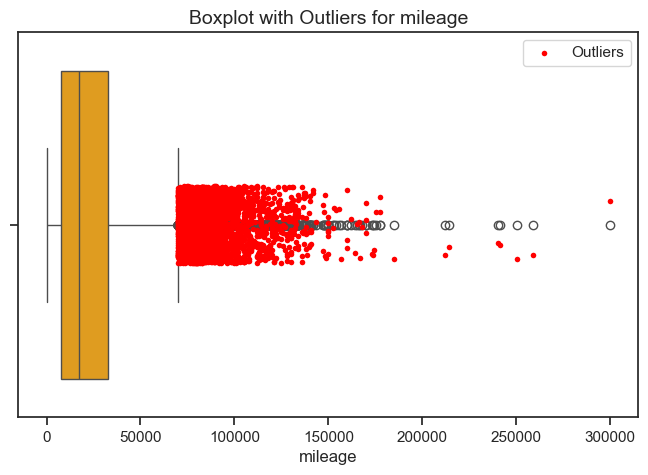

Column: tax - Number of Outliers: 15988
Column: tax - % of Outliers: 26.31%



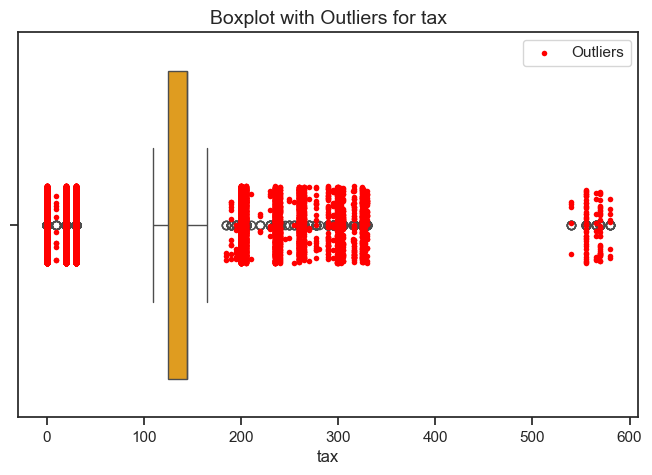

Column: mpg - Number of Outliers: 1351
Column: mpg - % of Outliers: 2.22%



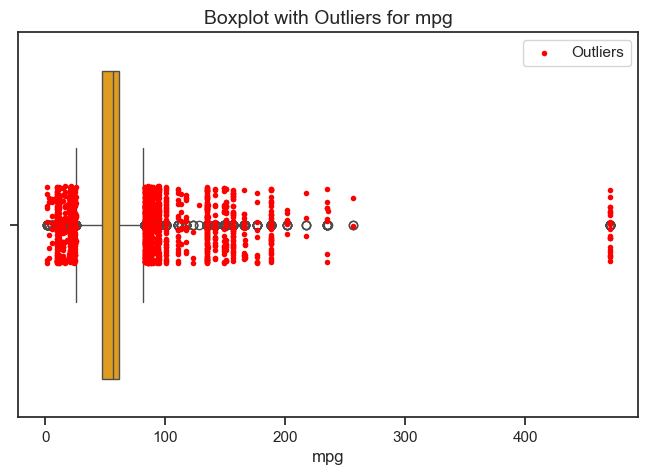

Column: engineSize - Number of Outliers: 521
Column: engineSize - % of Outliers: 0.86%



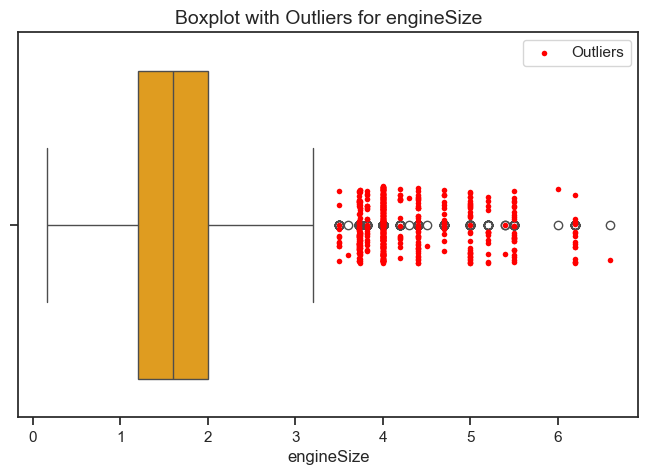

Column: paintQuality% - Number of Outliers: 0
Column: paintQuality% - % of Outliers: 0.00%



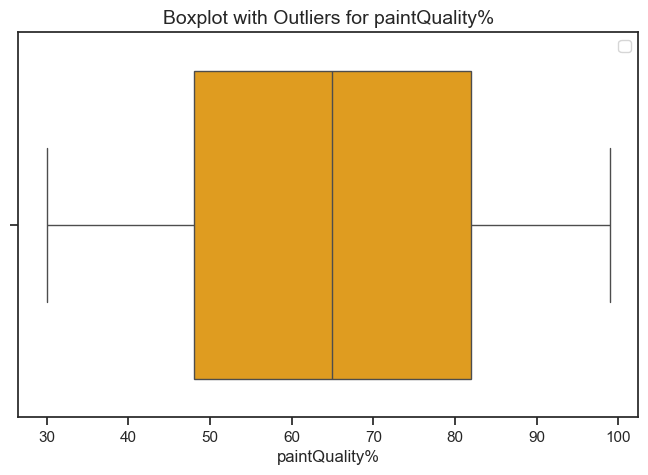

Column: previousOwners - Number of Outliers: 0
Column: previousOwners - % of Outliers: 0.00%



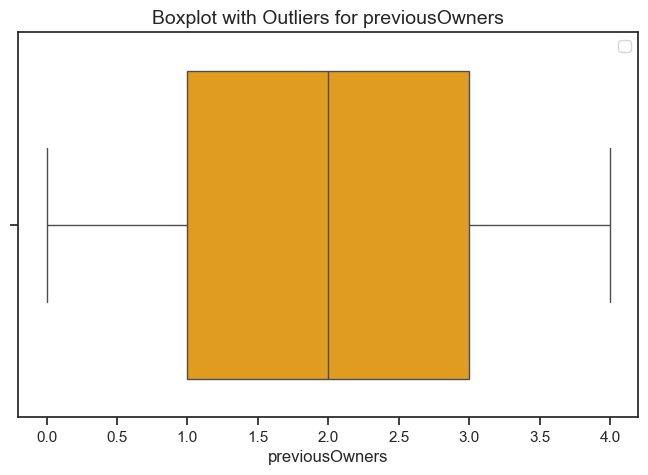

Column: carAge - Number of Outliers: 1436
Column: carAge - % of Outliers: 2.36%



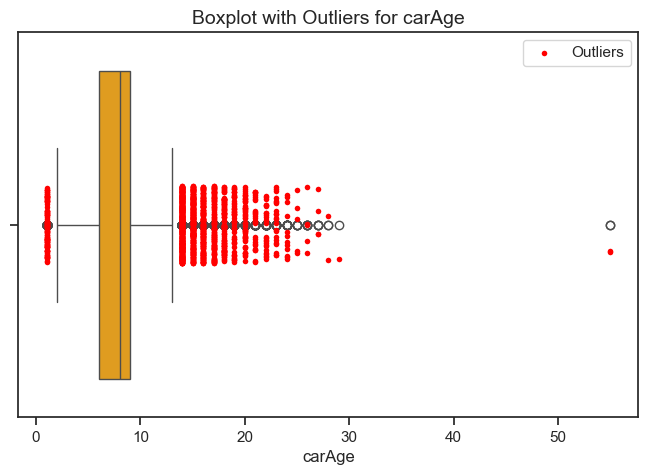

Column  Num_Outliers  Pct_Outliers
0     mileage          2627      4.322714
1         tax         15988     26.308168
2         mpg          1351      2.223063
3  engineSize           521      0.857303
4      carAge          1436      2.362930

In [998]:
detect_outliers_iqr(X_train[['mileage','tax','mpg','engineSize','paintQuality%','previousOwners','carAge']], threshold=0.001)

### Dealing with outliers

***mileage***

In [999]:
X_train[X_train['mileage'] > 250000]

mileage    tax   mpg  engineSize  paintQuality%  previousOwners  \
carID                                                                     
45370  259000.0  540.0  30.7         3.0           54.0               1   
48382  300000.0  125.0  57.6         1.9           79.0               2   
48042  250650.0  125.0  57.6         1.9           62.0               1   

       carAge  Brand_audi  Brand_bmw  Brand_ford  ...  Brand_volkswagen  \
carID                                             ...                     
45370    15.0         0.0        0.0         0.0  ...               0.0   
48382    15.0         0.0        0.0         0.0  ...               0.0   
48042    15.0         0.0        0.0         0.0  ...               0.0   

       transmission_automatic  transmission_manual  transmission_semi-auto  \
carID                                                                        
45370                     1.0                  0.0                     0.0   
48382                     0.0                  1.0                     0.0   
48042                     0.0                  1.0                     0.0   

       fuelType_diesel  fuelType_electric  fuelType_hybrid  fuelType_petrol  \
carID                                                                         
45370              1.0                0.0              0.0              0.0   
48382              1.0                0.0              0.0              0.0   
48042              1.0                0.0              0.0              0.0   

       hasDamage  model_te  
carID                       
45370        0.0  2.102941  
48382        0.0  1.638523  
48042        0.0  1.638523  

[3 rows x 26 columns]

Since having more than 250000 miles in 15+ years is completely possible, we will not treat them as wrong values

***tax***

In [1000]:
X_train[X_train['tax'] == 0]

mileage  tax        mpg  engineSize  paintQuality%  previousOwners  \
carID                                                                       
52410  17186.0  0.0  68.900000         1.0           65.0               4   
65772  29892.0  0.0  74.300000         1.6           86.0               0   
55655  24023.0  0.0  78.500000         1.8           39.0               2   
53602  47141.0  0.0  78.500000         1.8           67.0               0   
66007  15500.0  0.0  65.700000         1.0           83.0               2   
...        ...  ...        ...         ...            ...             ...   
48688  36941.0  0.0  78.600000         1.4           62.0               4   
55159  21145.0  0.0  68.900000         1.0           88.0               1   
4420   45644.0  0.0  80.700000         1.6           63.0               2   
51817  39000.0  0.0  65.700000         1.0           73.0               0   
68275  20658.0  0.0  11.417268         1.6           38.0               2   

       carAge  Brand_audi  Brand_bmw  Brand_ford  ...  Brand_volkswagen  \
carID                                             ...                     
52410     8.0         0.0        0.0         0.0  ...               0.0   
65772     9.0         0.0        0.0         0.0  ...               1.0   
55655     9.0         0.0        0.0         0.0  ...               0.0   
53602     8.0         0.0        0.0         0.0  ...               0.0   
66007     9.0         0.0        0.0         0.0  ...               1.0   
...       ...         ...        ...         ...  ...               ...   
48688    10.0         0.0        0.0         0.0  ...               0.0   
55159     8.0         0.0        0.0         0.0  ...               0.0   
4420      9.0         1.0        0.0         0.0  ...               0.0   
51817    12.0         0.0        0.0         0.0  ...               0.0   
68275     9.0         0.0        0.0         0.0  ...               1.0   

       transmission_automatic  transmission_manual  transmission_semi-auto  \
carID                                                                        
52410                     0.0                  1.0                     0.0   
65772                     0.0                  1.0                     0.0   
55655                     1.0                  0.0                     0.0   
53602                     1.0                  0.0                     0.0   
66007                     0.0                  0.0                     1.0   
...                       ...                  ...                     ...   
48688                     0.0                  1.0                     0.0   
55159                     0.0                  1.0                     0.0   
4420                      0.0                  1.0                     0.0   
51817                     0.0                  1.0                     0.0   
68275                     0.0                  0.0                     1.0   

       fuelType_diesel  fuelType_electric  fuelType_hybrid  fuelType_petrol  \
carID                                                                         
52410              0.0                0.0              0.0              1.0   
65772              1.0                0.0              0.0              0.0   
55655              0.0                0.0              1.0              0.0   
53602              0.0                0.0              1.0              0.0   
66007              0.0                0.0              0.0              1.0   
...                ...                ...              ...              ...   
48688              1.0                0.0              0.0              0.0   
55159              0.0                0.0              0.0              1.0   
4420               1.0                0.0              0.0              0.0   
51817              0.0                0.0              0.0              1.0   
68275              1.0                0.0              0.0        

In [1001]:
X_train.loc[(X_train['tax'] == 0) & (X_train['fuelType_electric'] == 1)].shape[0]

4

Since we have a lot of tax values (3371) = 0 and we do not know the specific laws of the country about the car taxes, we can't assume that those values are incorrect.

In [1002]:
X_train[X_train['tax'] > 500].sample(20)

mileage    tax   mpg  engineSize  paintQuality%  previousOwners  \
carID                                                                     
35117   39000.0  570.0  23.5         6.2           36.0               1   
46012    3000.0  570.0  21.4         6.2           78.0               4   
43212   52438.0  580.0  25.2         3.0           84.0               4   
18162   18500.0  570.0  23.5         5.0           98.0               4   
13819   49000.0  570.0  25.4         3.0           98.0               4   
2522   136000.0  540.0  31.0         3.0           66.0               1   
13600  126054.0  555.0  29.7         3.0           80.0               2   
68949   38511.0  555.0  29.1         2.0           39.0               1   
8641    46180.0  570.0  37.7         4.4           91.0               1   
40664   83079.0  555.0  28.8         5.5           58.0               1   
715     68000.0  555.0  26.4         4.2           63.0               2   
37494  128000.0  555.0  32.5         3.0           64.0               1   
13594   63000.0  565.0  29.7         3.0           94.0               2   
21006   69382.0  555.0  27.4         2.5           52.0               1   
45503  104000.0  570.0  28.8         3.0           92.0               2   
36      49989.0  555.0  26.4         4.2           99.0               3   
30357   12000.0  570.0  20.9         5.0           98.0               3   
73980  119000.0  570.0  28.5         3.0           77.0               2   
41842   92000.0  555.0  32.5         3.0           45.0               2   
41417   34400.0  570.0  25.2         3.0           90.0               2   

       carAge  Brand_audi  Brand_bmw  Brand_ford  ...  Brand_volkswagen  \
carID                                             ...                     
35117    12.0         0.0        0.0         0.0  ...               0.0   
46012    14.0         0.0        0.0         0.0  ...               0.0   
43212    12.0         0.0        0.0         0.0  ...               0.0   
18162     9.0         0.0        0.0         1.0  ...               0.0   
13819     9.0         0.0        1.0         0.0  ...               0.0   
2522     16.0         1.0        0.0         0.0  ...               0.0   
13600    19.0         0.0        1.0         0.0  ...               0.0   
68949    19.0         0.0        0.0         0.0  ...               1.0   
8641      9.0         0.0        1.0         0.0  ...               0.0   
40664    10.0         0.0        0.0         0.0  ...               0.0   
715      12.0         1.0        0.0         0.0  ...               0.0   
37494    15.0         0.0        0.0         0.0  ...               0.0   
13594    18.0         0.0        1.0         0.0  ...               0.0   
21006    13.0         0.0        0.0         1.0  ...               0.0   
45503    18.0         0.0        0.0         0.0  ...               0.0   
36       11.0         1.0        0.0         0.0  ...               0.0   
30357     9.0         0.0        0.0         1.0  ...               0.0   
73980     7.0         0.0        0.0         0.0  ...               1.0   
41842    15.0         0.0        0.0         0.0  ...               0.0   
41417    10.0         0.0        0.0         0.0  ...               0.0   

       transmission_automatic  transmission_manual  transmission_semi-auto  \
carID                                                                        
35117                     1.0                  0.0                     0.0   
46012                     1.0                  0.0                     0.0   
43212                     1.0                  0.0                     0.0   
18162                     1.0                  0.0                     0.0   
13819                     1.0                  0.0                     0.0   
2522                      1.0                  0.0                     0.0   
13600                     1.0                  0.0                     0.0   
6894

Since all cars with tax values higher than 500 either have "large" engine sizes, are "old," or are combustion-engine, which are usually factors that contribute to a higher tax values for cars, we will not consider these values ​​as outliers.

***mpg***

In [1003]:
X_train[X_train['mpg']>400]

mileage    tax    mpg  engineSize  paintQuality%  previousOwners  \
carID                                                                     
10327  42479.0    0.0  470.8    0.600000           79.0               2   
12269  26965.0  140.0  470.8    0.600000           81.0               3   
10653  29851.0    0.0  470.8    0.600000           40.0               0   
13378   9886.0    0.0  470.8    0.600000           44.0               0   
9196   19995.0    0.0  470.8    0.600000           79.0               3   
12786  29465.0    0.0  470.8    3.822758           67.0               2   
10133  22200.0    0.0  470.8    0.600000           95.0               4   
11962  21025.0    0.0  470.8    0.600000           66.0               0   
10695  22200.0  135.0  470.8    0.600000           54.0               1   
13430  41146.0    0.0  470.8    0.600000           69.0               1   
12090   8421.0    0.0  470.8    0.600000           31.0               4   
12640  23956.0  135.0  470.8    0.600000           53.0               1   
12332  65800.0    0.0  470.8    0.600000           50.0               3   
14531  36429.0    0.0  470.8    0.600000           30.0               2   
9643   20929.0  135.0  470.8    0.600000           71.0               2   
8497   24041.0    0.0  470.8    0.600000           46.0               3   
12853  10839.0    0.0  470.8    0.600000           31.0               4   
14512  23983.0    0.0  470.8    1.600000           95.0               4   
13075  33931.0    0.0  470.8    0.600000           31.0               4   
10967  41063.0    0.0  470.8    0.600000           34.0               0   
11532  35446.0    0.0  470.8    0.600000           59.0               3   
8993    9990.0    0.0  470.8    0.600000           44.0               0   
9815   20013.0    0.0  470.8    0.600000           30.0               0   

       carAge  Brand_audi  Brand_bmw  Brand_ford  ...  Brand_volkswagen  \
carID                                             ...                     
10327    11.0         0.0        1.0         0.0  ...               0.0   
12269     8.0         0.0        1.0         0.0  ...               0.0   
10653     8.0         0.0        1.0         0.0  ...               0.0   
13378    10.0         0.0        1.0         0.0  ...               0.0   
9196      9.0         0.0        1.0         0.0  ...               0.0   
12786    10.0         0.0        1.0         0.0  ...               0.0   
10133     8.0         0.0        1.0         0.0  ...               0.0   
11962     8.0         0.0        1.0         0.0  ...               0.0   
10695     8.0         0.0        1.0         0.0  ...               0.0   
13430     8.0         0.0        1.0         0.0  ...               0.0   
12090     9.0         0.0        1.0         0.0  ...               0.0   
12640     8.0         0.0        1.0         0.0  ...               0.0   
12332    10.0         0.0        1.0         0.0  ...               0.0   
14531     8.0         0.0        1.0         0.0  ...               0.0   
9643      8.0         0.0        1.0         0.0  ...               0.0   
8497      8.0         0.0        1.0         0.0  ...               0.0   
12853     8.0         0.0        1.0         0.0  ...               0.0   
14512     8.0         0.0        1.0         0.0  ...               0.0   
13075    10.0         0.0        1.0         0.0  ...               0.0   
10967     9.0         0.0        1.0         0.0  ...               0.0   
11532     9.0         0.0        1.0         0.0  ...               0.0   
8993      9.0         0.0        1.0         0.0  ...               0.0   
9815      9.0         0.0        1.0         0.0  ...               0.0   

       transmission_automatic  transmission_manual  transmission_semi-auto  \
carID                                                                        
10327                     1.0                  0.0                     0.0   
12269                

Since every car with > 400 mpg have the same brand and model, we do not consider those values as wrong values

***engineSize***

In [1004]:
X_train[X_train['engineSize']>6]

mileage    tax   mpg  engineSize  paintQuality%  previousOwners  \
carID                                                                    
38980  43442.0  145.0  58.9         6.2           76.0               0   
35538  49964.0  326.0  58.9         6.2           58.0               3   
35290  56444.0  580.0  23.5         6.2           65.0               0   
37825  55000.0  570.0  19.8         6.2           70.0               1   
39900  19562.0  145.0  58.9         6.2           83.0               0   
36196  86706.0  145.0  58.9         6.2           31.0               0   
39852  38000.0  570.0  19.5         6.2           76.0               4   
44794  37000.0  570.0  23.5         6.2           92.0               2   
9197   11297.0  145.0  22.1         6.6           68.0               1   
46536  44000.0  145.0  58.9         6.2           88.0               2   
39752  56444.0  145.0  58.9         6.2           52.0               3   
42286  24175.0  145.0  58.9         6.2           93.0               2   
40094  39000.0  145.0  58.9         6.2           89.0               1   
46012   3000.0  570.0  21.4         6.2           78.0               4   
45321  19562.0  570.0  58.9         6.2           57.0               4   
35117  39000.0  570.0  23.5         6.2           36.0               1   

       carAge  Brand_audi  Brand_bmw  Brand_ford  ...  Brand_volkswagen  \
carID                                             ...                     
38980    12.0         0.0        0.0         0.0  ...               0.0   
35538     7.0         0.0        0.0         0.0  ...               0.0   
35290    11.0         0.0        0.0         0.0  ...               0.0   
37825    17.0         0.0        0.0         0.0  ...               0.0   
39900    11.0         0.0        0.0         0.0  ...               0.0   
36196    11.0         0.0        0.0         0.0  ...               0.0   
39852    15.0         0.0        0.0         0.0  ...               0.0   
44794    11.0         0.0        0.0         0.0  ...               0.0   
9197      8.0         0.0        1.0         0.0  ...               0.0   
46536    12.0         0.0        0.0         0.0  ...               0.0   
39752    11.0         0.0        0.0         0.0  ...               0.0   
42286    11.0         0.0        0.0         0.0  ...               0.0   
40094    12.0         0.0        0.0         0.0  ...               0.0   
46012    14.0         0.0        0.0         0.0  ...               0.0   
45321    11.0         0.0        0.0         0.0  ...               0.0   
35117    12.0         0.0        0.0         0.0  ...               0.0   

       transmission_automatic  transmission_manual  transmission_semi-auto  \
carID                                                                        
38980                     0.0                  0.0                     1.0   
35538                     0.0                  0.0                     1.0   
35290                     1.0                  0.0                     0.0   
37825                     0.0                  0.0                     1.0   
39900                     0.0                  0.0                     1.0   
36196                     0.0                  0.0                     1.0   
39852                     1.0                  0.0                     0.0   
44794                     0.0                  0.0                     1.0   
9197                      1.0                  0.0                     0.0   
46536                     1.0                  0.0                     0.0   
39752                     1.0                  0.0                     0.0   
42286                     0.0                  0.0                     1.0   
40094                     1.0                  0.0                     0.0   
46012                     1.0                  0.0                     0.0   
45321                     0.0                  0.0                     1.0 

Since all the cars with engineSize > 6 are all from the same brand (almost all from the same model) we will not considerer those values as wrong values

***carAge***

In [1005]:
X_train[X_train['carAge']>50]

mileage    tax   mpg  engineSize  paintQuality%  previousOwners  \
carID                                                                    
62732  37357.0  200.0  42.2         1.4           60.0               2   
35769  14000.0  305.0  39.2         3.0           44.0               3   

       carAge  Brand_audi  Brand_bmw  Brand_ford  ...  Brand_volkswagen  \
carID                                             ...                     
62732    55.0         0.0        0.0         0.0  ...               0.0   
35769    55.0         0.0        0.0         0.0  ...               0.0   

       transmission_automatic  transmission_manual  transmission_semi-auto  \
carID                                                                        
62732                     0.0                  1.0                     0.0   
35769                     1.0                  0.0                     0.0   

       fuelType_diesel  fuelType_electric  fuelType_hybrid  fuelType_petrol  \
carID                                                                         
62732              0.0                0.0              0.0              1.0   
35769              1.0                0.0              0.0              0.0   

       hasDamage  model_te  
carID                       
62732        0.0  1.499320  
35769        0.0  2.716186  

[2 rows x 26 columns]

In [1006]:
# --- aprender no TRAIN ---
carAge_median_by_model = X_train.groupby('model_te')['carAge'].median()
global_median_carAge   = float(X_train['carAge'].median())  # fallback

def replace_carAge_outliers(df, per_model_median, thr=50, global_med=None, to_int=True):
    out = df.copy()
    s = pd.to_numeric(out['carAge'], errors='coerce').astype('Float64')
    mask = s > thr

    # replace median by model
    repl = out.loc[mask, 'model_te'].map(per_model_median)
    if global_med is not None:
        repl = repl.fillna(global_med)

    s.loc[mask] = repl
    if to_int:
        s = s.round().astype('Int64') 
    out['carAge'] = s
    return out



In [1007]:
X_train      = replace_carAge_outliers(X_train,      carAge_median_by_model, thr=50, global_med=global_median_carAge)
X_val        = replace_carAge_outliers(X_val,        carAge_median_by_model, thr=50, global_med=global_median_carAge)
test_encoded = replace_carAge_outliers(test_encoded, carAge_median_by_model, thr=50, global_med=global_median_carAge)

## 4. Scaling

We are going to use the "RobustScaler"

In [1008]:
# Initialize the scaler
scaler = RobustScaler()

In [1009]:
num = ['mileage', 'engineSize', 'tax', 'mpg', 'carAge', 'paintQuality%','previousOwners','model_te']

In [1010]:
# Fit the scaler only on TRAIN data
scaler.fit(X_train[num])

# Transform both TRAIN and VALIDATION sets
X_train[num] = scaler.transform(X_train[num])
X_val[num] = scaler.transform(X_val[num])
test_encoded[num] = scaler.transform(test_encoded[num])

In [1011]:
print(X_train[num].describe())

            mileage    engineSize           tax           mpg        carAge  \
count  60772.000000  60772.000000  60772.000000  60772.000000  60772.000000   
mean       0.235176      0.080995     -1.066329     -0.064014     -0.033552   
std        0.862497      0.704833      3.069969      1.106343      0.726288   
min       -0.698983     -1.806838     -7.250000     -3.874126     -2.333333   
25%       -0.398807     -0.500000     -1.000000     -0.657343     -0.666667   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.601193      0.500000      0.000000      0.342657      0.333333   
max       11.309623      6.250000     21.750000     28.972028      7.000000   

       paintQuality%  previousOwners      model_te  
count   60772.000000    60772.000000  60772.000000  
mean       -0.011459       -0.034243      0.012805  
std         0.585751        0.717981      0.742464  
min        -1.029412       -1.000000     -1.108717  
25%        -0.500000   

## 5.Feature Selection

In [1012]:
X_train.columns

Index(['mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners', 'carAge', 'Brand_audi', 'Brand_bmw', 'Brand_ford',
       'Brand_hyundai', 'Brand_mercedes-benz', 'Brand_opel', 'Brand_skoda',
       'Brand_toyota', 'Brand_unknown', 'Brand_volkswagen',
       'transmission_automatic', 'transmission_manual',
       'transmission_semi-auto', 'fuelType_diesel', 'fuelType_electric',
       'fuelType_hybrid', 'fuelType_petrol', 'hasDamage', 'model_te'],
      dtype='object')

In [1013]:
numeric = [
    'mileage',
    'tax',
    'mpg',
    'engineSize',
    'paintQuality%',
    'previousOwners',
    'carAge',
    'model_te'
]


In [1014]:
encoded_features = [
    'Brand_audi',
    'Brand_bmw',
    'Brand_ford',
    'Brand_hyundai',
    'Brand_mercedes-benz',
    'Brand_opel',
    'Brand_skoda',
    'Brand_toyota',
    'Brand_volkswagen',
    'transmission_automatic',
    'transmission_manual',
    'transmission_semi-auto',
    'fuelType_diesel',
    'fuelType_electric',
    'fuelType_hybrid',
    'fuelType_petrol'
]


In [1015]:
binary_features = ['hasDamage']

In [1016]:
categ_features = encoded_features + binary_features 

all_features = numeric + categ_features

### 5.1 Filter-Based Methods

In [1017]:
X_train[numeric].var()

mileage           0.743902
tax               9.424712
mpg               1.223995
engineSize        0.496789
paintQuality%     0.343104
previousOwners    0.515497
carAge            0.527494
model_te          0.551254
dtype: float64

**Spearman Correlation Matrix**

In [1018]:
cor_spearman = X_train[numeric].corr(method ='spearman')
cor_spearman

mileage       tax       mpg  engineSize  paintQuality%  \
mileage         1.000000 -0.247562  0.305354    0.094701      -0.002042   
tax            -0.247562  1.000000 -0.522405    0.149773       0.000260   
mpg             0.305354 -0.522405  1.000000   -0.187120       0.002747   
engineSize      0.094701  0.149773 -0.187120    1.000000       0.000781   
paintQuality%  -0.002042  0.000260  0.002747    0.000781       1.000000   
previousOwners  0.003960  0.001285  0.001295    0.006292      -0.002935   
carAge          0.785702 -0.304596  0.288538    0.031412      -0.005037   
model_te        0.028258  0.164102 -0.232445    0.809405      -0.001773   

                previousOwners    carAge  model_te  
mileage               0.003960  0.785702  0.028258  
tax                   0.001285 -0.304596  0.164102  
mpg                   0.001295  0.288538 -0.232445  
engineSize            0.006292  0.031412  0.809405  
paintQuality%        -0.002935 -0.005037 -0.001773  
previousOwners        1.000000  0.000608  0.002389  
carAge                0.000608  1.000000 -0.054012  
model_te              0.002389 -0.054012  1.000000

In [1019]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = 'PiYG', fmt='.1')
    plt.show()

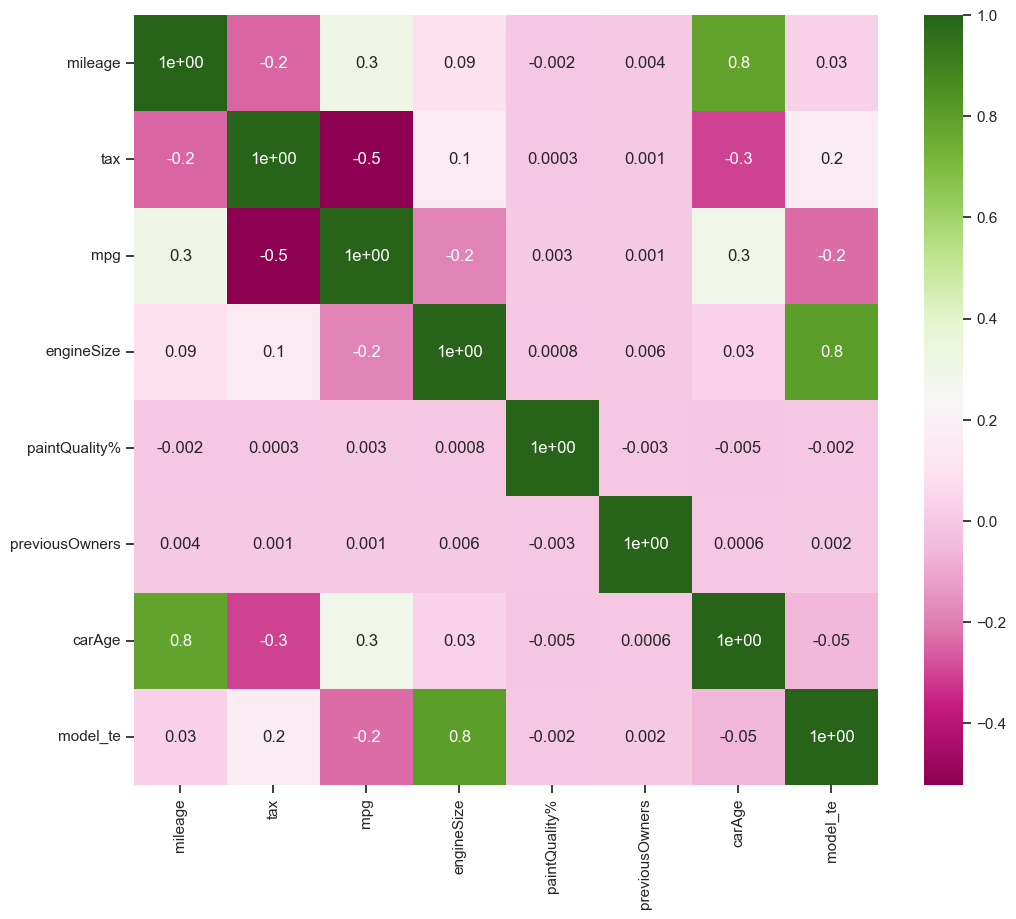

In [1020]:
cor_heatmap(cor_spearman)

**Chi Squared Test**

In [1021]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [1022]:
for var in encoded_features:
    TestIndependence(X_train[var], y_train, var)

Brand_audi is IMPORTANT for Prediction
Brand_bmw is IMPORTANT for Prediction
Brand_ford is IMPORTANT for Prediction
Brand_hyundai is NOT an important predictor. (Discard Brand_hyundai from model)
Brand_mercedes-benz is IMPORTANT for Prediction
Brand_opel is IMPORTANT for Prediction
Brand_skoda is NOT an important predictor. (Discard Brand_skoda from model)
Brand_toyota is IMPORTANT for Prediction
Brand_volkswagen is IMPORTANT for Prediction
transmission_automatic is IMPORTANT for Prediction
transmission_manual is IMPORTANT for Prediction
transmission_semi-auto is IMPORTANT for Prediction
fuelType_diesel is IMPORTANT for Prediction
fuelType_electric is NOT an important predictor. (Discard fuelType_electric from model)
fuelType_hybrid is IMPORTANT for Prediction
fuelType_petrol is IMPORTANT for Prediction


In [1023]:
X_train[X_train['Brand_hyundai'] == 1]

mileage   tax       mpg  engineSize  paintQuality%  previousOwners  \
carID                                                                        
33569 -0.261268  0.00  0.251748       -0.75       0.676471            -0.5   
33499 -0.414979  0.00  0.083916       -0.50       0.558824            -0.5   
32026  2.283964 -0.50  1.538462        0.00      -0.764706             1.0   
33027 -0.026939 -0.50  1.538462        0.00       0.705882            -0.5   
32539 -0.096710  0.00 -0.601399       -0.50       0.117647            -0.5   
...         ...   ...       ...         ...            ...             ...   
33541  0.237651  0.00 -0.293706       -0.75      -0.970588            -0.5   
33923 -0.603354  0.00 -1.209790        0.75       0.441176            -0.5   
31788  1.435674 -5.75  0.076923       -0.50      -0.058824             0.0   
31924 -0.558922  0.00 -0.482517       -0.75      -0.235294            -1.0   
32233 -0.498879  0.00 -1.510490        0.00      -0.647059             1.0   

         carAge  Brand_audi  Brand_bmw  Brand_ford  ...  Brand_volkswagen  \
carID                                               ...                     
33569 -0.333333         0.0        0.0         0.0  ...               0.0   
33499 -0.333333         0.0        0.0         0.0  ...               0.0   
32026 -0.666667         0.0        0.0         0.0  ...               0.0   
33027 -0.333333         0.0        0.0         0.0  ...               0.0   
32539  0.333333         0.0        0.0         0.0  ...               0.0   
...         ...         ...        ...         ...  ...               ...   
33541 -0.333333         0.0        0.0         0.0  ...               0.0   
33923 -0.666667         0.0        0.0         0.0  ...               0.0   
31788  0.000000         0.0        0.0         0.0  ...               0.0   
31924 -0.666667         0.0        0.0         0.0  ...               0.0   
32233 -0.666667         0.0        0.0         0.0  ...               0.0   

       transmission_automatic  transmission_manual  transmission_semi-auto  \
carID                                                                        
33569                     0.0                  1.0                     0.0   
33499                     0.0                  1.0                     0.0   
32026                     1.0                  0.0                     0.0   
33027                     1.0                  0.0                     0.0   
32539                     0.0                  0.0                     1.0   
...                       ...                  ...                     ...   
33541                     0.0                  1.0                     0.0   
33923                     0.0                  0.0                     1.0   
31788                     0.0                  1.0                     0.0   
31924                     0.0                  1.0                     0.0   
32233                     0.0                  1.0                     0.0   

       fuelType_diesel  fuelType_electric  fuelType_hybrid  fuelType_petrol  \
carID                                                                         
33569              0.0                0.0              0.0              1.0   
33499              0.0                0.0              0.0              1.0   
32026              0.0                0.0              1.0              0.0   
33027              0.0                0.0              1.0              0.0   
32539              0.0                0.0              0.0              1.0   
...                ...                ...              ...              ...   
33541              0.0                0.0              0.0              1.0   
33923              1.0                0.0              0.0              0.0   
31788              0.0                0.0              0.0              1.0   
31924              0.0                0.0              0.0              1.0   
32233              0.0      

In [1024]:
X_train[X_train['Brand_skoda'] == 1]

mileage   tax       mpg  engineSize  paintQuality%  previousOwners  \
carID                                                                        
47316 -0.549316  0.00 -1.384615      -0.125      -0.235294            -1.0   
48295  0.051237  0.00  0.251748      -0.500       0.235294             0.0   
50025 -0.096469  0.25  0.538462       0.500      -0.617647            -0.5   
49036 -0.551797  0.25 -1.510490       0.500      -0.235294            -1.0   
46937  0.155312  0.00  0.000000       0.500      -1.029412            -0.5   
...         ...   ...       ...         ...            ...             ...   
47889  1.766552  0.00  0.251748       0.500       0.323529            -1.0   
49872  2.197502  3.00 -0.818182       0.500       0.323529            -0.5   
49817  0.184012  0.00  0.440559       0.500      -0.794118             0.5   
47960  0.210832  0.00  0.342657      -0.750       0.235294            -0.5   
48606  0.104555 -6.25  0.251748      -0.500      -0.588235            -0.5   

         carAge  Brand_audi  Brand_bmw  Brand_ford  ...  Brand_volkswagen  \
carID                                               ...                     
47316 -0.666667         0.0        0.0         0.0  ...               0.0   
48295  0.000000         0.0        0.0         0.0  ...               0.0   
50025 -0.333333         0.0        0.0         0.0  ...               0.0   
49036 -1.000000         0.0        0.0         0.0  ...               0.0   
46937 -0.333333         0.0        0.0         0.0  ...               0.0   
...         ...         ...        ...         ...  ...               ...   
47889  0.000000         0.0        0.0         0.0  ...               0.0   
49872  0.666667         0.0        0.0         0.0  ...               0.0   
49817  0.000000         0.0        0.0         0.0  ...               0.0   
47960  0.000000         0.0        0.0         0.0  ...               0.0   
48606  0.000000         0.0        0.0         0.0  ...               0.0   

       transmission_automatic  transmission_manual  transmission_semi-auto  \
carID                                                                        
47316                     1.0                  0.0                     0.0   
48295                     0.0                  1.0                     0.0   
50025                     0.0                  1.0                     0.0   
49036                     1.0                  0.0                     0.0   
46937                     1.0                  0.0                     0.0   
...                       ...                  ...                     ...   
47889                     0.0                  0.0                     1.0   
49872                     0.0                  0.0                     1.0   
49817                     1.0                  0.0                     0.0   
47960                     1.0                  0.0                     0.0   
48606                     0.0                  1.0                     0.0   

       fuelType_diesel  fuelType_electric  fuelType_hybrid  fuelType_petrol  \
carID                                                                         
47316              0.0                0.0              0.0              1.0   
48295              0.0                0.0              0.0              1.0   
50025              1.0                0.0              0.0              0.0   
49036              1.0                0.0              0.0              0.0   
46937              1.0                0.0              0.0              0.0   
...                ...                ...              ...              ...   
47889              1.0                0.0              0.0              0.0   
49872              1.0                0.0              0.0              0.0   
49817              1.0                0.0              0.0              0.0   
47960              0.0                0.0              0.0              1.0   
48606              0.0      

In [1025]:
X_train[X_train['fuelType_electric'] == 1]

mileage   tax        mpg  engineSize  paintQuality%  previousOwners  \
carID                                                                         
12786  0.480426 -7.25  28.972028    2.778447       0.058824             0.0   
64169  0.680410 -7.25  12.510490   -0.250000       0.529412            -0.5   
16306 -0.322912 -7.25   0.755245    0.500000      -0.176471             0.5   
21931  0.282924 -7.25   0.755245    0.500000       0.500000             1.0   

         carAge  Brand_audi  Brand_bmw  Brand_ford  ...  Brand_volkswagen  \
carID                                               ...                     
12786  0.666667         0.0        1.0         0.0  ...               0.0   
64169  0.666667         0.0        0.0         0.0  ...               0.0   
16306  0.333333         0.0        0.0         1.0  ...               0.0   
21931  0.333333         0.0        0.0         1.0  ...               0.0   

       transmission_automatic  transmission_manual  transmission_semi-auto  \
carID                                                                        
12786                     1.0                  0.0                     0.0   
64169                     1.0                  0.0                     0.0   
16306                     1.0                  0.0                     0.0   
21931                     1.0                  0.0                     0.0   

       fuelType_diesel  fuelType_electric  fuelType_hybrid  fuelType_petrol  \
carID                                                                         
12786              0.0                1.0              0.0              0.0   
64169              0.0                1.0              0.0              0.0   
16306              0.0                1.0              0.0              0.0   
21931              0.0                1.0              0.0              0.0   

       hasDamage  model_te  
carID                       
12786        0.0 -0.418928  
64169        0.0 -0.428386  
16306        0.0  0.405701  
21931        0.0  0.405701  

[4 rows x 26 columns]

### 5.2 Wrapper Methods

**RFE**

In [1026]:
estimator = RandomForestRegressor(n_estimators=200, random_state=0, n_jobs=-1)


selector = RFE(
    estimator=estimator,
    n_features_to_select=12,   
    step=1,
    verbose=1
)


selector.fit(X_train, y_train)


selected_features = X_train.columns[selector.support_]
print("Selected features:", selected_features)


y_pred = estimator.fit(X_train[selected_features], y_train).predict(X_val[selected_features])
print("Validation MAE:", mean_absolute_error(y_val, y_pred))

Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Selected features: Index(['mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners', 'carAge', 'Brand_audi', 'Brand_mercedes-benz',
       'transmission_manual', 'fuelType_petrol', 'model_te'],
      dtype='object')
Validation MAE: 1368.6603176637707


Best k = 24 with Validation MAE = 1346.329
Selected features: ['transmission_manual', 'carAge', 'engineSize', 'model_te', 'mileage', 'mpg', 'paintQuality%', 'tax', 'Brand_audi', 'previousOwners', 'Brand_ford', 'Brand_mercedes-benz', 'Brand_bmw', 'fuelType_petrol', 'fuelType_diesel', 'Brand_volkswagen', 'Brand_opel', 'transmission_automatic', 'transmission_semi-auto', 'Brand_skoda', 'Brand_toyota', 'fuelType_hybrid', 'Brand_hyundai', 'Brand_unknown']


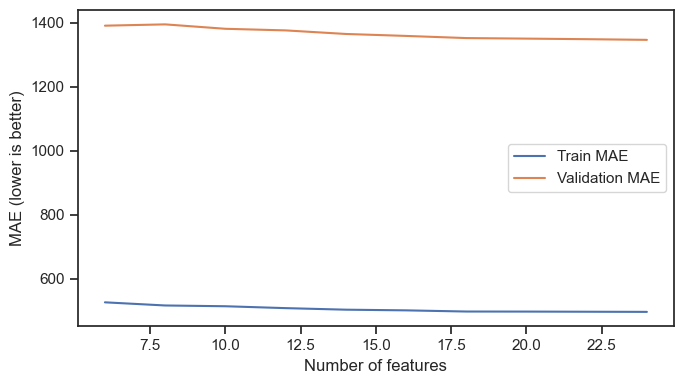

In [1027]:
# Base model (smaller n_estimators during selection to be fast)
ranker = RandomForestRegressor(
    n_estimators=150,      # smaller for speed; increase later for final model
    random_state=42,
    n_jobs=-1
)
ranker.fit(X_train, y_train)

# Feature ranking by impurity-based importance (fast)
importances = ranker.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
sorted_feats = X_train.columns[sorted_idx]

# 2) Sweep top-k subsets (10–15 fits only)
k_grid = list(range(6, min(26, X_train.shape[1] + 1), 2))  # e.g., 6,8,...,24
train_mae, val_mae = [], []
best_k, best_mae, best_feats = None, np.inf, None

for k in k_grid:
    feats_k = list(sorted_feats[:k])
    model_k = RandomForestRegressor(
        n_estimators=150,   # keep it light for the sweep
        random_state=42,
        n_jobs=-1
    )
    model_k.fit(X_train[feats_k], y_train)
    y_tr = model_k.predict(X_train[feats_k])
    y_va = model_k.predict(X_val[feats_k])

    tr_mae = mean_absolute_error(y_train, y_tr)
    va_mae = mean_absolute_error(y_val, y_va)
    train_mae.append(tr_mae)
    val_mae.append(va_mae)

    if va_mae < best_mae:
        best_mae = va_mae
        best_k = k
        best_feats = feats_k

print(f"Best k = {best_k} with Validation MAE = {best_mae:.3f}")
print("Selected features:", best_feats)

# 3) Retrain a stronger final model on the chosen features
final_model = RandomForestRegressor(
    n_estimators=400,  # now you can increase for accuracy
    random_state=42,
    n_jobs=-1
)
final_model.fit(X_train[best_feats], y_train)




plt.figure(figsize=(7,4))
plt.plot(k_grid, train_mae, label="Train MAE")
plt.plot(k_grid, val_mae, label="Validation MAE")
plt.xlabel("Number of features")
plt.ylabel("MAE (lower is better)")
plt.legend()
plt.tight_layout()
plt.show()

### 5.3 Embedded Methods

In [1028]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [1029]:
reg = LassoCV()

In [1030]:
reg.fit(X_train[all_features], y_train)

LassoCV()

In [1031]:
coef = pd.Series(reg.coef_, index = X_train[all_features].columns)
coef

mileage                  -2753.268112
tax                        -71.208647
mpg                       -541.995595
engineSize                4635.753900
paintQuality%              -48.491061
previousOwners               0.000000
carAge                   -3758.632669
model_te                  4259.063678
Brand_audi                2727.214737
Brand_bmw                   -0.000000
Brand_ford                 805.175339
Brand_hyundai            -1094.260457
Brand_mercedes-benz       2069.175368
Brand_opel               -2412.249093
Brand_skoda                 -0.000000
Brand_toyota             -1694.597980
Brand_volkswagen           851.386669
transmission_automatic      -0.000000
transmission_manual      -1685.398407
transmission_semi-auto     555.565676
fuelType_diesel          -1670.401347
fuelType_electric            0.000000
fuelType_hybrid           1906.809194
fuelType_petrol             -0.000000
hasDamage                    0.000000
dtype: float64

In [1032]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 18 variables and eliminated the other 7 variables


In [1033]:
coef.sort_values()

carAge                   -3758.632669
mileage                  -2753.268112
Brand_opel               -2412.249093
Brand_toyota             -1694.597980
transmission_manual      -1685.398407
fuelType_diesel          -1670.401347
Brand_hyundai            -1094.260457
mpg                       -541.995595
tax                        -71.208647
paintQuality%              -48.491061
Brand_skoda                 -0.000000
Brand_bmw                   -0.000000
transmission_automatic      -0.000000
fuelType_electric            0.000000
previousOwners               0.000000
fuelType_petrol             -0.000000
hasDamage                    0.000000
transmission_semi-auto     555.565676
Brand_ford                 805.175339
Brand_volkswagen           851.386669
fuelType_hybrid           1906.809194
Brand_mercedes-benz       2069.175368
Brand_audi                2727.214737
model_te                  4259.063678
engineSize                4635.753900
dtype: float64

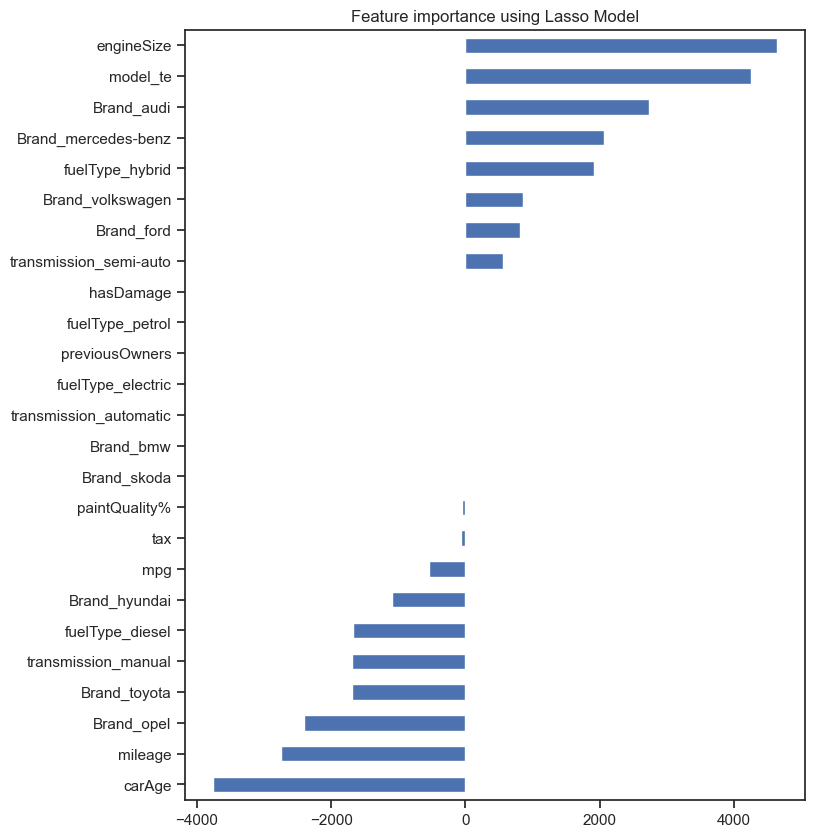

In [1034]:
plot_importance(coef,'Lasso')

In [1035]:
print(numeric, categ_features)

['mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'carAge', 'model_te'] ['Brand_audi', 'Brand_bmw', 'Brand_ford', 'Brand_hyundai', 'Brand_mercedes-benz', 'Brand_opel', 'Brand_skoda', 'Brand_toyota', 'Brand_volkswagen', 'transmission_automatic', 'transmission_manual', 'transmission_semi-auto', 'fuelType_diesel', 'fuelType_electric', 'fuelType_hybrid', 'fuelType_petrol', 'hasDamage']


### Final Features

| Predictor              | Spearman  | RFE RF | Lasso | Chi-Square | What to do? (One possible way to "solve") |
|-------------------------|-----------------|---------|-------|-------------|--------------------------------------------|
| model_te               | Keep      | Keep    | Keep  | -           | Keep|
| engineSize             | Choose between 'model_te' and 'engineSize'       | Keep    | Keep  | -    | Try with and without                                      |
| Brand_ford             | -      | Keep      | Keep     | Keep           | Keep                                          |
| fuelType_hybrid        | -      | Keep    | Keep  | Keep          | Keep                      |
| Brand_audi             | -          | Keep       | Keep    | Keep           | Keep                                          |
| transmission_semi-auto | -        | Keep    | Keep  | Keep          | Keep                    |
| Brand_volkswagen       | -      | Keep    | Keep  | Keep           | Keep                      |
| Brand_mercedes-benz    | -          | Keep       | Keep     | Keep           | Keep                                          |
| previousOwners         | Discard     | Keep | Discard | -        | Discard                      |
| paintQuality%          | Discard     | Keep   | Discard     | -        | Discard                      |
| hasDamage              | -      | Discard    | Discard     | -        | Discard                      |
| fuelType_electric      | -      | Keep    | Discard     | Discard        | Discard                      |
| transmission_automatic | -      | Keep    | Discard     | Keep        | Try with and without                      |
| fuelType_petrol        | -      | Keep    | Discard     | Keep        | Try with and without                      |
| Brand_hyundai          | -     | Keep       | Keep     | Keep           | Keep                                         |
| Brand_bmw              | -       | Keep       | Discard     | Keep           | Try with and without                                          |
| Brand_skoda            | -       | Keep       | Discard   | Discard           | Discard                                          |
| tax                    | Keep        | Keep    | Keep  | -     | Keep                                      |
| Brand_opel             | -    | Keep       | Keep  | Keep           | Keep                                          |
| Brand_toyota           | -    | Keep       | Keep  | Keep           | Keep                                          |
| mpg                    | Keep     | Keep | Keep  | -       | Keep                      |
| transmission_manual    | -      | Keep    | Keep | Keep        | Keep                      |
| fuelType_diesel        | -     | Keep    | Keep | Keep        | Keep                      |
| mileage                | Keep       | Keep    | Keep | -     | Keep               |
| carAge                 | Choose between 'carAge' and 'mileage'      | Keep    | Keep | -       | Try with and without                      |


Let's create a new list with the selected features

In [1036]:
cols_selected = ['mileage', 'tax', 'mpg', 'engineSize' , 'carAge', 'model_te','Brand_audi', 'Brand_bmw', 'Brand_ford', 'Brand_hyundai', 'Brand_mercedes-benz', 'Brand_opel',  'Brand_toyota', 'Brand_volkswagen', 'transmission_automatic', 'transmission_manual', 'transmission_semi-auto', 'fuelType_diesel',  'fuelType_hybrid', 'fuelType_petrol']

# Modeling

## R**2

In [1037]:
test_encoded

mileage   tax       mpg  engineSize  paintQuality%  previousOwners  \
0      0.529862  3.00 -1.048951       0.000      -0.117647             0.5   
1      0.189617  0.25 -1.279720       0.500      -0.147059             0.0   
2      0.773717 -1.00 -0.356643      -0.125       0.852941             0.0   
3     -0.477544  0.00 -0.867133      -0.500       0.352941            -0.5   
4     -0.336442  0.25 -0.356643       0.500      -0.588235             1.0   
...         ...   ...       ...         ...            ...             ...   
32562  0.404771  0.00 -0.713287      -0.250       0.852941            -0.5   
32563 -0.619766  0.00 -1.573427       0.500      -0.764706             0.5   
32564 -0.366904  0.00 -1.279720       0.500       0.676471             1.0   
32565 -0.471239  0.00 -1.958042      -0.375       0.470588            -0.5   
32566 -0.255864 -5.75  0.104895      -0.375       0.970588             1.0   

         carAge  Brand_audi  Brand_bmw  Brand_ford  ...  \
0     -2.000000         0.0        0.0         0.0  ...   
1      0.000000         0.0        0.0         0.0  ...   
2      0.333333         0.0        1.0         0.0  ...   
3     -0.666667         0.0        0.0         0.0  ...   
4     -0.666667         0.0        1.0         0.0  ...   
...         ...         ...        ...         ...  ...   
32562  0.000000         0.0        0.0         0.0  ...   
32563 -1.000000         0.0        1.0         0.0  ...   
32564 -0.666667         1.0        0.0         0.0  ...   
32565 -0.666667         0.0        0.0         0.0  ...   
32566  0.000000         0.0        0.0         0.0  ...   

       transmission_automatic  transmission_manual  transmission_semi-auto  \
0                         1.0                  0.0                     0.0   
1                         0.0                  0.0                     1.0   
2                         1.0                  0.0                     0.0   
3                         0.0                  1.0                     0.0   
4                         0.0                  0.0                     1.0   
...                       ...                  ...                     ...   
32562                     0.0                  1.0                     0.0   
32563                     1.0                  0.0                     0.0   
32564                     0.0                  0.0                     1.0   
32565                     0.0                  1.0                     0.0   
32566                     1.0                  0.0                     0.0   

       fuelType_diesel  fuelType_electric  fuelType_hybrid  fuelType_petrol  \
0                  0.0                0.0              0.0              1.0   
1                  0.0                0.0              0.0              1.0   
2                  0.0                0.0              0.0              1.0   
3                  0.0                0.0              0.0              1.0   
4                  1.0                0.0              0.0              0.0   
...                ...                ...              ...              ...   
32562              0.0                0.0              0.0              1.0   
32563              0.0                0.0              0.0              1.0   
32564              1.0                0.0              0.0              0.0   
32565              0.0                0.0              0.0              1.0   
32566              0.0                0.0              0.0              1.0   

       hasDamage   carID  model_te  
0            0.0   89856 -0.298456  
1            0.0  106581  0.394323  
2            0.0   80886  0.347736  
3            0.0  100174 -0.514390  
4            0.0   81376  0.386308  
...          ...     ...       ...  
32562        0.0  105775  0.394323  
32563        0.0   81363  0.529976  
32564        0.0   76833  0.920873  
32565        0.0   91768  0.002528  
32566        0.0   99627 -0.390270  

[32567 rows x 29 columns]

In [1038]:
X_train_filtered = X_train[cols_selected]
X_val_filtered = X_val[cols_selected]
test_filtered = test_encoded[['carID'] + cols_selected]

In [1039]:
lr = LinearRegression().fit(X_train_filtered,y_train)

In [1040]:
#rfr = RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1).fit(X_train_filtered, y_train)

In [1041]:

#lasso = Lasso(alpha=0.001, random_state=42)
#lasso.fit(X_train_filtered, y_train)

In [1042]:
y_pred_train = lr.predict(X_train_filtered)
y_pred_val = lr.predict(X_val_filtered)

In [1043]:
r2_t = r2_score(y_train, y_pred_train)
r2_t

0.7725096923026004

In [1044]:
r2_v = r2_score(y_val, y_pred_val)
r2_v

0.7811908589059579

In [1045]:
r2 = r2_score(y_train, y_pred_train)
n = len(y_train)
p = len(X_train_filtered.columns)

def adj_r2 (r2,n,p):
    return 1-(1-r2)*(n-1)/(n-p-1)

ar2_t = adj_r2(r2,n,p)
ar2_t 

0.7724347996069418

In [1046]:
r2 = r2_score(y_val, y_pred_val)
n = len(y_val)
p = len(X_val_filtered.columns)

ar2_v = adj_r2(r2,n,p)
ar2_v

0.7809024398179805

## MAE


In [1047]:
mae_t = mean_absolute_error(y_train, y_pred_train)
mae_t

2916.942140512077

In [1048]:
mae_v = mean_absolute_error(y_val, y_pred_val)
mae_v

2911.878799498728

## MSE

In [1049]:
mse_t = mean_squared_error(y_train, y_pred_train)
mse_t

21778938.762738917

In [1050]:
mse_v = mean_squared_error(y_val, y_pred_val)
mse_v

19938007.608925194

## RMSE

In [1051]:
rmse_t = root_mean_squared_error(y_train, y_pred_train)
rmse_t

4666.791056254706

In [1052]:
rmse_v = root_mean_squared_error(y_val, y_pred_val)
rmse_v

4465.199615798289

## MedAE

In [1053]:
medae_t = median_absolute_error(y_train, y_pred_train)
medae_t

2010.9428182317897

In [1054]:
medae_v =median_absolute_error(y_val, y_pred_val)
medae_v

2025.9859899758821

## MAPE

In [1055]:
mape_t = mean_absolute_percentage_error(y_train, y_pred_train)
mape_t

0.219295427450258

In [1056]:
mape_v = mean_absolute_percentage_error(y_val, y_pred_val)
mape_v

0.21978454137060335

## Comparing differences

In [1057]:
regression_metrics = pd.DataFrame({
    'Metric': ['R2', 'Adjusted R2', 'MAE', 'MSE', 'RMSE', 'MedAE', 'MAPE'],
    'Train': [r2_t, ar2_t, mae_t, mse_t, rmse_t, medae_t, mape_t],
    'Validation': [r2_v, ar2_v, mae_v, mse_v, rmse_v, medae_v, mape_v],
    }).round(2)

regression_metrics

Metric        Train   Validation
0           R2         0.77         0.78
1  Adjusted R2         0.77         0.78
2          MAE      2916.94      2911.88
3          MSE  21778938.76  19938007.61
4         RMSE      4666.79      4465.20
5        MedAE      2010.94      2025.99
6         MAPE         0.22         0.22

# Final Predictions

In [1075]:
test_filtered

carID   mileage   tax       mpg  engineSize    carAge  model_te  \
0       89856  0.529862  3.00 -1.048951       0.000 -2.000000 -0.298456   
1      106581  0.189617  0.25 -1.279720       0.500  0.000000  0.394323   
2       80886  0.773717 -1.00 -0.356643      -0.125  0.333333  0.347736   
3      100174 -0.477544  0.00 -0.867133      -0.500 -0.666667 -0.514390   
4       81376 -0.336442  0.25 -0.356643       0.500 -0.666667  0.386308   
...       ...       ...   ...       ...         ...       ...       ...   
32562  105775  0.404771  0.00 -0.713287      -0.250  0.000000  0.394323   
32563   81363 -0.619766  0.00 -1.573427       0.500 -1.000000  0.529976   
32564   76833 -0.366904  0.00 -1.279720       0.500 -0.666667  0.920873   
32565   91768 -0.471239  0.00 -1.958042      -0.375 -0.666667  0.002528   
32566   99627 -0.255864 -5.75  0.104895      -0.375  0.000000 -0.390270   

       Brand_audi  Brand_bmw  Brand_ford  ...  Brand_mercedes-benz  \
0             0.0        0.0         0.0  ...                  0.0   
1             0.0        0.0         0.0  ...                  0.0   
2             0.0        1.0         0.0  ...                  0.0   
3             0.0        0.0         0.0  ...                  0.0   
4             0.0        1.0         0.0  ...                  0.0   
...           ...        ...         ...  ...                  ...   
32562         0.0        0.0         0.0  ...                  0.0   
32563         0.0        1.0         0.0  ...                  0.0   
32564         1.0        0.0         0.0  ...                  0.0   
32565         0.0        0.0         0.0  ...                  1.0   
32566         0.0        0.0         0.0  ...                  0.0   

       Brand_opel  Brand_toyota  Brand_volkswagen  transmission_automatic  \
0             0.0           0.0               0.0                     1.0   
1             0.0           0.0               1.0                     0.0   
2             0.0           0.0               0.0                     1.0   
3             1.0           0.0               0.0                     0.0   
4             0.0           0.0               0.0                     0.0   
...           ...           ...               ...                     ...   
32562         0.0           0.0               1.0                     0.0   
32563         0.0           0.0               0.0                     1.0   
32564         0.0           0.0               0.0                     0.0   
32565         0.0           0.0               0.0                     0.0   
32566         0.0           1.0               0.0                     1.0   

       transmission_manual  transmission_semi-auto  fuelType_diesel  \
0                      0.0                     0.0              0.0   
1                      0.0                     1.0              0.0   
2                      0.0                     0.0              0.0   
3                      1.0                     0.0              0.0   
4                      0.0                     1.0              1.0   
...                    ...                     ...              ...   
32562                  1.0                     0.0              0.0   
32563                  0.0                     0.0              0.0   
32564                  0.0                     1.0              1.0   
32565                  1.0                     0.0              0.0   
32566                  0.0                     0.0              0.0   

       fuelType_hybrid  fuelType_petrol  
0                  0.0              1.0  
1                  0.0              1.0  
2                  0.0              1.0  
3                  0.0              1.0  
4                  0.0              0.0  
...                ...              ...  
32562              0.0              1.0  
32563              0.0              1.0  
32564              0.0              0.0  
32565              0.0              1.0  
32566              0.0    

In [1076]:
test_final = test_filtered[['carID'] + cols_selected ].copy()



In [1077]:
test_final

carID   mileage   tax       mpg  engineSize    carAge  model_te  \
0       89856  0.529862  3.00 -1.048951       0.000 -2.000000 -0.298456   
1      106581  0.189617  0.25 -1.279720       0.500  0.000000  0.394323   
2       80886  0.773717 -1.00 -0.356643      -0.125  0.333333  0.347736   
3      100174 -0.477544  0.00 -0.867133      -0.500 -0.666667 -0.514390   
4       81376 -0.336442  0.25 -0.356643       0.500 -0.666667  0.386308   
...       ...       ...   ...       ...         ...       ...       ...   
32562  105775  0.404771  0.00 -0.713287      -0.250  0.000000  0.394323   
32563   81363 -0.619766  0.00 -1.573427       0.500 -1.000000  0.529976   
32564   76833 -0.366904  0.00 -1.279720       0.500 -0.666667  0.920873   
32565   91768 -0.471239  0.00 -1.958042      -0.375 -0.666667  0.002528   
32566   99627 -0.255864 -5.75  0.104895      -0.375  0.000000 -0.390270   

       Brand_audi  Brand_bmw  Brand_ford  ...  Brand_mercedes-benz  \
0             0.0        0.0         0.0  ...                  0.0   
1             0.0        0.0         0.0  ...                  0.0   
2             0.0        1.0         0.0  ...                  0.0   
3             0.0        0.0         0.0  ...                  0.0   
4             0.0        1.0         0.0  ...                  0.0   
...           ...        ...         ...  ...                  ...   
32562         0.0        0.0         0.0  ...                  0.0   
32563         0.0        1.0         0.0  ...                  0.0   
32564         1.0        0.0         0.0  ...                  0.0   
32565         0.0        0.0         0.0  ...                  1.0   
32566         0.0        0.0         0.0  ...                  0.0   

       Brand_opel  Brand_toyota  Brand_volkswagen  transmission_automatic  \
0             0.0           0.0               0.0                     1.0   
1             0.0           0.0               1.0                     0.0   
2             0.0           0.0               0.0                     1.0   
3             1.0           0.0               0.0                     0.0   
4             0.0           0.0               0.0                     0.0   
...           ...           ...               ...                     ...   
32562         0.0           0.0               1.0                     0.0   
32563         0.0           0.0               0.0                     1.0   
32564         0.0           0.0               0.0                     0.0   
32565         0.0           0.0               0.0                     0.0   
32566         0.0           1.0               0.0                     1.0   

       transmission_manual  transmission_semi-auto  fuelType_diesel  \
0                      0.0                     0.0              0.0   
1                      0.0                     1.0              0.0   
2                      0.0                     0.0              0.0   
3                      1.0                     0.0              0.0   
4                      0.0                     1.0              1.0   
...                    ...                     ...              ...   
32562                  1.0                     0.0              0.0   
32563                  0.0                     0.0              0.0   
32564                  0.0                     1.0              1.0   
32565                  1.0                     0.0              0.0   
32566                  0.0                     0.0              0.0   

       fuelType_hybrid  fuelType_petrol  
0                  0.0              1.0  
1                  0.0              1.0  
2                  0.0              1.0  
3                  0.0              1.0  
4                  0.0              0.0  
...                ...              ...  
32562              0.0              1.0  
32563              0.0              1.0  
32564              0.0              0.0  
32565              0.0              1.0  
32566              0.0    

In [1078]:

test_final['price'] = lr.predict(test_final[cols_selected])


test_final['price'] = np.maximum(0, test_final['price'].round(0)).astype(int)

In [1079]:
predictions = test_final[['carID', 'price']]

In [1080]:
predictions.head()

carID  price
0   89856  21691
1  106581  23550
2   80886  15604
3  100174  13542
4   81376  24304

In [1081]:
predictions.to_csv("final_predictions.csv", index=False)


In [1082]:
test_final

carID   mileage   tax       mpg  engineSize    carAge  model_te  \
0       89856  0.529862  3.00 -1.048951       0.000 -2.000000 -0.298456   
1      106581  0.189617  0.25 -1.279720       0.500  0.000000  0.394323   
2       80886  0.773717 -1.00 -0.356643      -0.125  0.333333  0.347736   
3      100174 -0.477544  0.00 -0.867133      -0.500 -0.666667 -0.514390   
4       81376 -0.336442  0.25 -0.356643       0.500 -0.666667  0.386308   
...       ...       ...   ...       ...         ...       ...       ...   
32562  105775  0.404771  0.00 -0.713287      -0.250  0.000000  0.394323   
32563   81363 -0.619766  0.00 -1.573427       0.500 -1.000000  0.529976   
32564   76833 -0.366904  0.00 -1.279720       0.500 -0.666667  0.920873   
32565   91768 -0.471239  0.00 -1.958042      -0.375 -0.666667  0.002528   
32566   99627 -0.255864 -5.75  0.104895      -0.375  0.000000 -0.390270   

       Brand_audi  Brand_bmw  Brand_ford  ...  Brand_opel  Brand_toyota  \
0             0.0        0.0         0.0  ...         0.0           0.0   
1             0.0        0.0         0.0  ...         0.0           0.0   
2             0.0        1.0         0.0  ...         0.0           0.0   
3             0.0        0.0         0.0  ...         1.0           0.0   
4             0.0        1.0         0.0  ...         0.0           0.0   
...           ...        ...         ...  ...         ...           ...   
32562         0.0        0.0         0.0  ...         0.0           0.0   
32563         0.0        1.0         0.0  ...         0.0           0.0   
32564         1.0        0.0         0.0  ...         0.0           0.0   
32565         0.0        0.0         0.0  ...         0.0           0.0   
32566         0.0        0.0         0.0  ...         0.0           1.0   

       Brand_volkswagen  transmission_automatic  transmission_manual  \
0                   0.0                     1.0                  0.0   
1                   1.0                     0.0                  0.0   
2                   0.0                     1.0                  0.0   
3                   0.0                     0.0                  1.0   
4                   0.0                     0.0                  0.0   
...                 ...                     ...                  ...   
32562               1.0                     0.0                  1.0   
32563               0.0                     1.0                  0.0   
32564               0.0                     0.0                  0.0   
32565               0.0                     0.0                  1.0   
32566               0.0                     1.0                  0.0   

       transmission_semi-auto  fuelType_diesel  fuelType_hybrid  \
0                         0.0              0.0              0.0   
1                         1.0              0.0              0.0   
2                         0.0              0.0              0.0   
3                         0.0              0.0              0.0   
4                         1.0              1.0              0.0   
...                       ...              ...              ...   
32562                     0.0              0.0              0.0   
32563                     0.0              0.0              0.0   
32564                     1.0              1.0              0.0   
32565                     0.0              0.0              0.0   
32566                     0.0              0.0              0.0   

       fuelType_petrol  price  
0                  1.0  21691  
1                  1.0  23550  
2                  1.0  15604  
3                  1.0  13542  
4                  0.0  24304  
...                ...    ...  
32562              1.0  16931  
32563              1.0  28770  
32564              0.0  30061  
32565              1.0  21593  
32566              1.0  13521  

[32567 rows x 22 columns]

In [1083]:
predictions

carID  price
0       89856  21691
1      106581  23550
2       80886  15604
3      100174  13542
4       81376  24304
...       ...    ...
32562  105775  16931
32563   81363  28770
32564   76833  30061
32565   91768  21593
32566   99627  13521

[32567 rows x 2 columns]

In [1084]:
with open("final_predictions.csv") as f:
    print(f.readline())


carID,price



In [1074]:
print("Linhas esperadas:", len(pd.read_csv("project_data/test.csv")))
print("Linhas na submissão:", len(predictions))


Linhas esperadas: 32567
Linhas na submissão: 32567
